In [ ]:
####################################################################################
# Title -- Course 5 Task 3 -- 
# Step 1 -- Prepare and Explore the Data
# Step 2 -- Build and Evaluate the Models

# Last Updated -- 10 Dec 19

# File:  
# Step 1 -- Course 5 Task 2
# Step 2 -- Course 5 Task 3 (which will include Step 1)

# Project Name:  Credit One Customer Default Rates Analysis
####################################################################################

In [ ]:
####################################################################################
# Project Notes
####################################################################################

# Summary of Project:  Credit One has seen an increase in the number of custormers that
# default on their credit card payments.  This is bad because Credit One is the company 
# that approves the customer loans for its clients.  This is also bad as it is a loss of 
# revenue for the clients and potentially Credit One, if the clients no longer trust
# Credit One's approval methodology.  The project attempts to identify significant patterns
# in current customers that default on their loans and to build a model to predict if future
# customers are likely to default on their loans.  This analysis should further inform the
# Credit One methodology on approving loans for their clients.

# Summarize the top model and/or filtered dataset

In [ ]:
####################################################################################
# Housekeeping
####################################################################################

In [ ]:
####################################################################################
# Load Packages
####################################################################################

In [697]:
#imports
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd #used for importing data
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)

from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import learning_curve,GridSearchCV

#cross validation
from sklearn.model_selection import train_test_split

# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import os

In [222]:
#from sklearn.naive_bayes import GaussianNB
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
#set working directory as necessary
#os.chdir('')

In [2]:
# Get working directory
os.getcwd()

'/Users/grantwisner/Desktop/UT Austin/Course 5/Task 3'

In [ ]:
####################################################################################
# Import Data
####################################################################################

In [591]:
# Load Raw datasets or Train/Test Dataset -- Dataset 1
#### Datasets for Analysis
#### Datasets for Analysis
credit_OOB = pd.read_csv('credit_OOB.csv', header =0) #out of box with ID removed and Education regrouped (OTHER)
credit_OOB_S = pd.read_csv('Credit_OOB_S.csv', header =0) #out of box scaled
credit_OOB_FS = pd.read_csv('Credit_OOB_FS.csv', header =0) # out of box removed highly correlated
credit_OOB_FS_S = pd.read_csv('Credit_OOB_FS_S.csv', header =0) # out of box FS scaled
credit_OOB_RFE = pd.read_csv('Credit_OOB_RFE.csv', header =0) #OOB using RFE top 10
credit_OOB_RFE_S = pd.read_csv('Credit_OOB_RFE_S.csv', header =0) #OOB RFE scaled
credit_DV = pd.read_csv('Credit_DV.csv', header =0) #All categorical variables turned into Dummy Variables, age / lim binned
credit_DV_S = pd.read_csv('Credit_DV_S.csv', header =0) # DV Scaled
credit_DV_FS = pd.read_csv('Credit_DV_FS.csv', header =0) #DV with removed highly correlated
credit_DV_FS_S = pd.read_csv('Credit_DV_FS_S.csv', header =0) #DV_FS scaled
credit_DV_RFE = pd.read_csv('Credit_DV_RFE.csv', header =0) #DV using RFE top 10
credit_DV_RFE_S = pd.read_csv('Credit_DV_RFE_S.csv', header =0) #DV RFE scaled

In [ ]:
####################################################################################
# Verify data input worked
####################################################################################

In [594]:
credit_OOB.shape, credit_OOB_S.shape, credit_OOB_FS.shape, credit_OOB_FS_S.shape, credit_OOB_RFE.shape, credit_OOB_RFE_S.shape


((30000, 24), (30000, 24), (30000, 21), (30000, 21), (30000, 11), (30000, 11))

In [595]:
credit_DV.shape, credit_DV_S.shape, credit_DV_FS.shape, credit_DV_FS_S.shape, credit_DV_RFE.shape, credit_DV_RFE_S.shape

((30000, 87), (30000, 87), (30000, 81), (30000, 81), (30000, 11), (30000, 11))

In [592]:
# moving dependent variable to the end of the dataframe
credit_OOB = credit_OOB.drop(columns=['dpnm']).assign(dpnm=credit_OOB['dpnm'])
credit_OOB_S = credit_OOB_S.drop(columns=['dpnm']).assign(dpnm=credit_OOB_S['dpnm'])
credit_OOB_FS = credit_OOB_FS.drop(columns=['dpnm']).assign(dpnm=credit_OOB_FS['dpnm'])
credit_OOB_FS_S = credit_OOB_FS_S.drop(columns=['dpnm']).assign(dpnm=credit_OOB_FS_S['dpnm'])
credit_OOB_RFE = credit_OOB_RFE.drop(columns=['dpnm']).assign(dpnm=credit_OOB_RFE['dpnm'])
credit_OOB_RFE_S = credit_OOB_RFE_S.drop(columns=['dpnm']).assign(dpnm=credit_OOB_RFE_S['dpnm'])

credit_DV = credit_DV.drop(columns=['dpnm']).assign(dpnm=credit_DV['dpnm'])
credit_DV_S = credit_DV_S.drop(columns=['dpnm']).assign(dpnm=credit_DV_S['dpnm'])
credit_DV_FS = credit_DV_FS.drop(columns=['dpnm']).assign(dpnm=credit_DV_FS['dpnm'])
credit_DV_FS_S = credit_DV_FS_S.drop(columns=['dpnm']).assign(dpnm=credit_DV_FS_S['dpnm'])
credit_DV_RFE = credit_DV_RFE.drop(columns=['dpnm']).assign(dpnm=credit_DV_RFE['dpnm'])
credit_DV_RFE_S = credit_DV_RFE_S.drop(columns=['dpnm']).assign(dpnm=credit_DV_RFE_S['dpnm'])

In [336]:
####################################################################################
# Select the Features
####################################################################################

In [597]:
features_OOB = credit_OOB.iloc[:,0:23]
features_OOB_S = credit_OOB_S.iloc[:,0:23]
features_OOB_FS = credit_OOB_FS.iloc[:,0:20]
features_OOB_FS_S = credit_OOB_FS_S.iloc[:,0:20]
features_OOB_RFE = credit_OOB_RFE.iloc[:,0:10]
features_OOB_RFE_S = credit_OOB_RFE_S.iloc[:,0:10]

In [596]:
features_DV = credit_DV.iloc[:,0:86]
features_DV_S = credit_DV_S.iloc[:,0:86]
features_DV_FS = credit_DV_FS.iloc[:,0:80]
features_DV_FS_S = credit_DV_FS_S.iloc[:,0:80]
features_DV_RFE = credit_DV_RFE.iloc[:,0:10]
features_DV_RFE_S = credit_DV_RFE_S.iloc[:,0:10]

In [348]:
####################################################################################
# Select the dependent variables
####################################################################################

In [598]:
#dependent variable
depVar_OOB = credit_OOB['dpnm']
depVar_OOB_S = credit_OOB_S['dpnm']
depVar_OOB_FS = credit_OOB_FS['dpnm']
depVar_OOB_FS_S = credit_OOB_FS_S['dpnm']
depVar_OOB_RFE = credit_OOB_RFE['dpnm']
depVar_OOB_RFE_S = credit_OOB_RFE_S['dpnm']
depVar_DV = credit_DV['dpnm']
depVar_DV_S = credit_DV_S['dpnm']
depVar_DV_FS = credit_DV_FS['dpnm']
depVar_DV_FS_S = credit_DV_FS_S['dpnm']
depVar_DV_RFE = credit_DV_RFE['dpnm']
depVar_DV_RFE_S = credit_DV_RFE_S['dpnm']

In [340]:
####################################################################################
# Splitting into train and test sets
####################################################################################

In [350]:
#Out of box dataset
X_train_OOB, X_test_OOB, y_train_OOB, y_test_OOB = train_test_split(features_OOB, 
                                                                    depVar_OOB, test_size=0.30, random_state = 123)
X_train_OOB.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
16395,320000,2,1,2,36,0,0,0,0,0,...,28695,19370,10155,3788,5000,5018,1000,3000,0,7013
21448,440000,2,1,2,30,-1,-1,-1,0,0,...,87426,171244,150897,117870,612,87426,130007,3018,15000,51663
20034,160000,2,3,1,44,-2,-2,-2,-2,-2,...,-18,-18,-18,-18,0,0,0,0,0,0
25755,120000,2,2,1,30,0,0,0,0,0,...,104694,103058,71095,47379,3706,5502,4204,3017,2005,1702
1438,50000,1,2,2,54,1,2,0,0,0,...,27168,27585,27910,27380,0,1400,1200,1500,1000,1500


In [48]:
X_train_OOB.shape, X_test_OOB.shape

((21000, 23), (9000, 23))

In [351]:
#Out of box scaled dataset
X_train_OOB_S, X_test_OOB_S, y_train_OOB_S, y_test_OOB_S = train_test_split(features_OOB_S, 
                                                                    depVar_OOB_S, test_size=0.30, random_state = 123)
X_train_OOB_S.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
16395,1.175499,2,1,2,0.055816,0,0,0,0,0,...,-0.264147,-0.371402,-0.496025,-0.589117,-0.040064,-0.039199,-0.240005,-0.116564,-0.314136,0.101113
21448,2.100386,2,1,2,-0.595102,-1,-1,-1,0,0,...,0.582752,1.989391,1.818957,1.326517,-0.304992,3.537462,7.087163,-0.115415,0.667665,2.612761
20034,-0.057685,2,3,1,0.923707,-2,-2,-2,-2,-2,...,-0.678188,-0.672777,-0.663355,-0.653026,-0.341942,-0.256990,-0.296801,-0.308063,-0.314136,-0.293382
25755,-0.365981,2,2,1,-0.595102,0,0,0,0,0,...,0.831757,0.929479,0.506341,0.142851,-0.118190,-0.018192,-0.058028,-0.115479,-0.182902,-0.197641
1438,-0.905498,1,2,2,2.008570,1,2,0,0,0,...,-0.286167,-0.243705,-0.203983,-0.192967,-0.341942,-0.196227,-0.228645,-0.212313,-0.248683,-0.209004


In [235]:
X_train_OOB_S.shape, X_test_OOB_S.shape

((21000, 23), (9000, 23))

In [352]:
#Out of box Feature Selection dataset
X_train_OOB_FS, X_test_OOB_FS, y_train_OOB_FS, y_test_OOB_FS = train_test_split(features_OOB_FS, 
                                                                    depVar_OOB_FS, test_size=0.30, random_state = 123)
X_train_OOB_FS.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT3,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
16395,320000,2,1,2,36,0,0,0,0,0,0,29026,28695,10155,5000,5018,1000,3000,0,7013
21448,440000,2,1,2,30,-1,-1,-1,0,0,0,777,87426,150897,612,87426,130007,3018,15000,51663
20034,160000,2,3,1,44,-2,-2,-2,-2,-2,-2,-18,-18,-18,0,0,0,0,0,0
25755,120000,2,2,1,30,0,0,0,0,0,0,101596,104694,71095,3706,5502,4204,3017,2005,1702
1438,50000,1,2,2,54,1,2,0,0,0,0,48153,27168,27910,0,1400,1200,1500,1000,1500


In [237]:
X_train_OOB_FS.shape, X_test_OOB_FS.shape

((21000, 20), (9000, 20))

In [601]:
#Out of box FS scaled dataset
X_train_OOB_FS_S, X_test_OOB_FS_S, y_train_OOB_FS_S, y_test_OOB_FS_S = train_test_split(features_OOB_FS_S, 
                                                                    depVar_OOB_FS_S, test_size=0.30, random_state = 123)
X_train_OOB_FS_S.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT3,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
16395,1.175499,2,1,2,0.055816,0,0,0,0,0,0,-0.301452,-0.264147,-0.496025,-0.040064,-0.039199,-0.240005,-0.116564,-0.314136,0.101113
21448,2.100386,2,1,2,-0.595102,-1,-1,-1,0,0,0,-0.685090,0.582752,1.818957,-0.304992,3.537462,7.087163,-0.115415,0.667665,2.612761
20034,-0.057685,2,3,1,0.923707,-2,-2,-2,-2,-2,-2,-0.695886,-0.678188,-0.663355,-0.341942,-0.256990,-0.296801,-0.308063,-0.314136,-0.293382
25755,-0.365981,2,2,1,-0.595102,0,0,0,0,0,0,0.684089,0.831757,0.506341,-0.118190,-0.018192,-0.058028,-0.115479,-0.182902,-0.197641
1438,-0.905498,1,2,2,2.008570,1,2,0,0,0,0,-0.041697,-0.286167,-0.203983,-0.341942,-0.196227,-0.228645,-0.212313,-0.248683,-0.209004


In [602]:
X_train_OOB_FS_S.shape, X_test_OOB_FS_S.shape

((21000, 20), (9000, 20))

In [603]:
#Out of box RFE dataset
X_train_OOB_RFE, X_test_OOB_RFE, y_train_OOB_RFE, y_test_OOB_RFE = train_test_split(features_OOB_RFE, 
                                                                    depVar_OOB_RFE, test_size=0.30, random_state = 123)
X_train_OOB_RFE.head()

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3
16395,320000,0,0,0,0,0,29026,5000,5018,1000
21448,440000,-1,-1,-1,0,0,777,612,87426,130007
20034,160000,-2,-2,-2,-2,-2,-18,0,0,0
25755,120000,0,0,0,0,0,101596,3706,5502,4204
1438,50000,1,2,0,0,0,48153,0,1400,1200


In [604]:
X_train_OOB_RFE.shape, X_test_OOB_RFE.shape

((21000, 10), (9000, 10))

In [637]:
#Out of box RFE dataset scaled
X_train_OOB_RFE_S, X_test_OOB_RFE_S, y_train_OOB_RFE_S, y_test_OOB_RFE_S = train_test_split(features_OOB_RFE_S, 
                                                                    depVar_OOB_RFE_S, test_size=0.30, random_state = 123)
X_train_OOB_RFE_S.head()

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3
16395,1.175499,0,0,0,0,0,-0.301452,-0.040064,-0.039199,-0.240005
21448,2.100386,-1,-1,-1,0,0,-0.685090,-0.304992,3.537462,7.087163
20034,-0.057685,-2,-2,-2,-2,-2,-0.695886,-0.341942,-0.256990,-0.296801
25755,-0.365981,0,0,0,0,0,0.684089,-0.118190,-0.018192,-0.058028
1438,-0.905498,1,2,0,0,0,-0.041697,-0.341942,-0.196227,-0.228645


In [638]:
X_train_OOB_RFE_S.shape, X_test_OOB_RFE_S.shape

((21000, 10), (9000, 10))

In [354]:
#Dummy Variables w/ binning dataset
X_train_DV, X_test_DV, y_train_DV, y_test_DV = train_test_split(features_DV, 
                                                                    depVar_DV, test_size=0.30, random_state = 123)
X_train_DV.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
16395,320000,36,29026,28179,28695,19370,10155,3788,5000,5018,...,0,0,1,0,0,0,0,0,0,0
21448,440000,30,777,612,87426,171244,150897,117870,612,87426,...,0,0,1,0,0,0,0,0,0,0
20034,160000,44,-18,-18,-18,-18,-18,-18,0,0,...,0,1,0,0,0,0,0,0,0,0
25755,120000,30,101596,102860,104694,103058,71095,47379,3706,5502,...,0,0,1,0,0,0,0,0,0,0
1438,50000,54,48153,46885,27168,27585,27910,27380,0,1400,...,0,0,1,0,0,0,0,0,0,0


In [241]:
X_train_DV.shape, X_test_DV.shape

((21000, 86), (9000, 86))

In [355]:
#Dummy Variables scaled dataset
X_train_DV_S, X_test_DV_S, y_train_DV_S, y_test_DV_S = train_test_split(features_DV_S, 
                                                                    depVar_DV_S, test_size=0.30, random_state = 123)
X_train_DV_S.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
16395,1.175499,0.055816,-0.301452,-0.295058,-0.264147,-0.371402,-0.496025,-0.589117,-0.040064,-0.039199,...,0,0,1,0,0,0,0,0,0,0
21448,2.100386,-0.595102,-0.685090,-0.682385,0.582752,1.989391,1.818957,1.326517,-0.304992,3.537462,...,0,0,1,0,0,0,0,0,0,0
20034,-0.057685,0.923707,-0.695886,-0.691236,-0.678188,-0.672777,-0.663355,-0.653026,-0.341942,-0.256990,...,0,1,0,0,0,0,0,0,0,0
25755,-0.365981,-0.595102,0.684089,0.754236,0.831757,0.929479,0.506341,0.142851,-0.118190,-0.018192,...,0,0,1,0,0,0,0,0,0,0
1438,-0.905498,2.008570,-0.041697,-0.032233,-0.286167,-0.243705,-0.203983,-0.192967,-0.341942,-0.196227,...,0,0,1,0,0,0,0,0,0,0


In [243]:
X_train_DV_S.shape, X_test_DV_S.shape

((21000, 86), (9000, 86))

In [356]:
#Dummy Variables Feature Selection dataset
X_train_DV_FS, X_test_DV_FS, y_train_DV_FS, y_test_DV_FS = train_test_split(features_DV_FS, 
                                                                    depVar_DV_FS, test_size=0.30, random_state = 123)
X_train_DV_FS.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT3,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,...,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
16395,320000,36,29026,28695,10155,5000,5018,1000,3000,0,...,0,0,1,0,0,0,0,0,0,0
21448,440000,30,777,87426,150897,612,87426,130007,3018,15000,...,0,0,1,0,0,0,0,0,0,0
20034,160000,44,-18,-18,-18,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
25755,120000,30,101596,104694,71095,3706,5502,4204,3017,2005,...,0,0,1,0,0,0,0,0,0,0
1438,50000,54,48153,27168,27910,0,1400,1200,1500,1000,...,0,0,1,0,0,0,0,0,0,0


In [245]:
X_train_DV_FS.shape, X_test_DV_FS.shape

((21000, 80), (9000, 80))

In [357]:
#Dummy Variables FS scaled dataset
X_train_DV_FS_S, X_test_DV_FS_S, y_train_DV_FS_S, y_test_DV_FS_S = train_test_split(features_DV_FS_S, 
                                                                    depVar_DV_FS_S, test_size=0.30, random_state = 123)
X_train_DV_FS_S.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT3,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,...,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
16395,1.175499,0.055816,-0.301452,-0.264147,-0.496025,-0.040064,-0.039199,-0.240005,-0.116564,-0.314136,...,0,0,1,0,0,0,0,0,0,0
21448,2.100386,-0.595102,-0.685090,0.582752,1.818957,-0.304992,3.537462,7.087163,-0.115415,0.667665,...,0,0,1,0,0,0,0,0,0,0
20034,-0.057685,0.923707,-0.695886,-0.678188,-0.663355,-0.341942,-0.256990,-0.296801,-0.308063,-0.314136,...,0,1,0,0,0,0,0,0,0,0
25755,-0.365981,-0.595102,0.684089,0.831757,0.506341,-0.118190,-0.018192,-0.058028,-0.115479,-0.182902,...,0,0,1,0,0,0,0,0,0,0
1438,-0.905498,2.008570,-0.041697,-0.286167,-0.203983,-0.341942,-0.196227,-0.228645,-0.212313,-0.248683,...,0,0,1,0,0,0,0,0,0,0


In [247]:
X_train_DV_FS_S.shape, X_test_DV_FS_S.shape

((21000, 80), (9000, 80))

In [607]:
#Dummy Variables RFE
X_train_DV_RFE, X_test_DV_RFE, y_train_DV_RFE, y_test_DV_RFE = train_test_split(features_DV_RFE, 
                                                                    depVar_DV_RFE, test_size=0.30, random_state = 123)
X_train_DV_RFE.head()

,LIMIT_BAL,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_1_2,PAY_1_3,PAY_2_2,PAY_3_2,PAY_4_2,PAY_5_2
16395,320000,29026,5000,5018,0,0,0,0,0,0
21448,440000,777,612,87426,0,0,0,0,0,0
20034,160000,-18,0,0,0,0,0,0,0,0
25755,120000,101596,3706,5502,0,0,0,0,0,0
1438,50000,48153,0,1400,0,0,1,0,0,0


In [608]:
X_train_DV_RFE.shape, X_test_DV_RFE.shape

((21000, 10), (9000, 10))

In [609]:
#Dummy Variables RFE
X_train_DV_RFE_S, X_test_DV_RFE_S, y_train_DV_RFE_S, y_test_DV_RFE_S = train_test_split(features_DV_RFE_S, 
                                                                    depVar_DV_RFE_S, test_size=0.30, random_state = 123)
X_train_DV_RFE_S.head()

,LIMIT_BAL,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_1_2,PAY_1_3,PAY_2_2,PAY_3_2,PAY_4_2,PAY_5_2
16395,1.175499,-0.301452,-0.040064,-0.039199,0,0,0,0,0,0
21448,2.100386,-0.685090,-0.304992,3.537462,0,0,0,0,0,0
20034,-0.057685,-0.695886,-0.341942,-0.256990,0,0,0,0,0,0
25755,-0.365981,0.684089,-0.118190,-0.018192,0,0,0,0,0,0
1438,-0.905498,-0.041697,-0.341942,-0.196227,0,0,1,0,0,0


In [610]:
X_train_DV_RFE_S.shape, X_test_DV_RFE_S.shape

((21000, 10), (9000, 10))

In [248]:
y_train_OOB_count = len(y_train_OOB.index)
print('The number of observations in the Y training set are:',str(y_train_OOB_count))
y_train_OOB.head()

The number of observations in the Y training set are: 21000


16395    0
21448    0
20034    0
25755    0
1438     0
Name: dpnm, dtype: int64

In [ ]:
####################################################################################
# Model development -- Out of Box Dataframe
####################################################################################

In [363]:
#Models
modelSVC_OOB = SVC(gamma = 'scale')
modelRF_OOB = RandomForestClassifier(n_estimators = 100)
modelLR_OOB = LinearRegression()
modelLr_OOB = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_OOB = GradientBoostingClassifier()
modelTREE_OOB = tree.DecisionTreeClassifier()
modelKNN_OOB = KNeighborsClassifier(n_neighbors=3)

In [453]:
#SVC
modelSVC_OOB.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelSVC_OOB, X_train_OOB, y_train_OOB)) 
modelSVC_OOB.score(X_train_OOB,y_train_OOB)

[0.77690476 0.77690476 0.77666667 0.77666667 0.77666667]


0.776952380952381

In [454]:
#Random Forest
modelRF_OOB.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelRF_OOB, X_train_OOB, y_train_OOB))
modelRF_OOB.score(X_train_OOB,y_train_OOB)

[0.8102381  0.81333333 0.81642857 0.8202381  0.81428571]


0.9991904761904762

In [455]:
#Linear Regression
modelLR_OOB.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelLR_OOB, X_train_OOB, y_train_OOB))
modelLR_OOB.score(X_train_OOB,y_train_OOB)

[0.10556654 0.11994944 0.13094063 0.13470488 0.12127143]


0.1251238684915058

In [456]:
#Logistic Regression
modelLr_OOB.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelLr_OOB, X_train_OOB, y_train_OOB))
modelLr_OOB.score(X_train_OOB,y_train_OOB)

[0.77690476 0.77690476 0.77642857 0.77666667 0.77666667]


0.7767142857142857

In [457]:
#Gradient Boosting
modelGB_OOB.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelGB_OOB, X_train_OOB, y_train_OOB))
modelGB_OOB.score(X_train_OOB,y_train_OOB)

[0.81238095 0.81809524 0.82238095 0.83       0.81833333]


0.8265238095238095

In [458]:
#Decision Tree
modelTREE_OOB.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelTREE_OOB, X_train_OOB, y_train_OOB)) 
modelTREE_OOB.score(X_train_OOB,y_train_OOB)

[0.71142857 0.74095238 0.72666667 0.72404762 0.72261905]


0.9992857142857143

In [459]:
#KNN
modelKNN_OOB.fit(X_train_OOB,y_train_OOB)
print(cross_val_score(modelKNN_OOB, X_train_OOB, y_train_OOB)) 
modelKNN_OOB.score(X_train_OOB,y_train_OOB)

[0.73880952 0.72833333 0.73404762 0.74       0.72666667]


0.8438571428571429

In [257]:
####################################################################################
# Evaluating the Results -- Out of Box Dataframe
####################################################################################

In [480]:
#SVC
predictions_OOB_SVC = modelSVC_OOB.predict(X_test_OOB)
accy_OOB_SVC = accuracy_score(y_test_OOB,predictions_OOB_SVC)
KAPPA_OOB_SVC = cohen_kappa_score(y_test_OOB, predictions_OOB_SVC)
ROC_OOB_SVC = roc_auc_score(y_test_OOB,predictions_OOB_SVC)
prec_OOB_SVC = precision_score(y_test_OOB, predictions_OOB_SVC)
rec_OOB_SVC = recall_score(y_test_OOB,predictions_OOB_SVC)
f1_OOB_SVC = f1_score(y_test_OOB,predictions_OOB_SVC)

model_results =  pd.DataFrame([['SVC', 'OOB', accy_OOB_SVC, KAPPA_OOB_SVC, ROC_OOB_SVC, prec_OOB_SVC, rec_OOB_SVC, f1_OOB_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results


/Users/grantwisner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.0,0.5,0.0,0.0,0.0


In [481]:
#Random Forest
predictions_OOB_RF = modelRF_OOB.predict(X_test_OOB)
accy_OOB_RF = accuracy_score(y_test_OOB,predictions_OOB_RF)
KAPPA_OOB_RF = cohen_kappa_score(y_test_OOB, predictions_OOB_RF)
ROC_OOB_RF = roc_auc_score(y_test_OOB,predictions_OOB_RF)
prec_OOB_RF = precision_score(y_test_OOB,predictions_OOB_RF)
rec_OOB_RF = recall_score(y_test_OOB,predictions_OOB_RF)
f1_OOB_RF = f1_score(y_test_OOB,predictions_OOB_RF)

model =  pd.DataFrame([['RF', 'OOB', accy_OOB_RF, KAPPA_OOB_RF, ROC_OOB_RF, prec_OOB_RF, rec_OOB_RF, f1_OOB_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.000000,0.5000,0.000000,0.000000,0.000000
1,RF,OOB,0.816556,0.370126,0.6589,0.625105,0.380903,0.473365


In [260]:
#Linear Regression
predictions_OOB_LR = modelLR_OOB.predict(X_test_OOB)
predRsquared_OOB_LR = r2_score(y_test_OOB, predictions_OOB_LR)
rmse_OOB_LR = sqrt(mean_squared_error(y_test_OOB, predictions_OOB_LR))
print('R Squared: %.3f' % predRsquared_OOB_LR)
print('RMSE: %.3f' % rmse_OOB_LR)

R Squared: 0.120
RMSE: 0.386


In [482]:
#Logistic Regression
predictions_OOB_Lr = modelLr_OOB.predict(X_test_OOB)
accy_OOB_Lr = accuracy_score(y_test_OOB,predictions_OOB_Lr)
KAPPA_OOB_Lr = cohen_kappa_score(y_test_OOB, predictions_OOB_Lr)
ROC_OOB_Lr = roc_auc_score(y_test_OOB,predictions_OOB_Lr)
prec_OOB_Lr = precision_score(y_test_OOB,predictions_OOB_Lr)
rec_OOB_Lr = recall_score(y_test_OOB,predictions_OOB_Lr)
f1_OOB_Lr = f1_score(y_test_OOB,predictions_OOB_Lr)

model =  pd.DataFrame([['Lr', 'OOB', accy_OOB_Lr, KAPPA_OOB_Lr, ROC_OOB_Lr, prec_OOB_Lr, rec_OOB_Lr, f1_OOB_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
1,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
2,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000


In [483]:
#Gradient Boosting
predictions_OOB_GB = modelGB_OOB.predict(X_test_OOB)
accy_OOB_GB = accuracy_score(y_test_OOB,predictions_OOB_GB)
KAPPA_OOB_GB = cohen_kappa_score(y_test_OOB, predictions_OOB_GB)
ROC_OOB_GB = roc_auc_score(y_test_OOB,predictions_OOB_GB)
prec_OOB_GB = precision_score(y_test_OOB,predictions_OOB_GB)
rec_OOB_GB = recall_score(y_test_OOB,predictions_OOB_GB)
f1_OOB_GB = f1_score(y_test_OOB,predictions_OOB_GB)

model =  pd.DataFrame([['GB', 'OOB', accy_OOB_GB, KAPPA_OOB_GB, ROC_OOB_GB, prec_OOB_GB, rec_OOB_GB, f1_OOB_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
1,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
2,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049


In [484]:
#Decision Tree
predictions_OOB_tree = modelTREE_OOB.predict(X_test_OOB)
accy_OOB_Tree = accuracy_score(y_test_OOB,predictions_OOB_tree)
KAPPA_OOB_Tree = cohen_kappa_score(y_test_OOB, predictions_OOB_tree)
ROC_OOB_Tree = roc_auc_score(y_test_OOB, predictions_OOB_tree)
prec_OOB_Tree = precision_score(y_test_OOB,predictions_OOB_tree)
rec_OOB_Tree = recall_score(y_test_OOB,predictions_OOB_tree)
f1_OOB_Tree = f1_score(y_test_OOB,predictions_OOB_tree)

model =  pd.DataFrame([['Tree', 'OOB', accy_OOB_Tree, KAPPA_OOB_Tree, ROC_OOB_Tree, prec_OOB_Tree, rec_OOB_Tree, f1_OOB_Tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
1,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
2,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,Tree,OOB,0.725111,0.220008,0.614295,0.378128,0.418891,0.397467


In [485]:
#KNN
predictions_OOB_KNN = modelKNN_OOB.predict(X_test_OOB)
accy_OOB_KNN = accuracy_score(y_test_OOB,predictions_OOB_KNN)
KAPPA_OOB_KNN = cohen_kappa_score(y_test_OOB, predictions_OOB_KNN)
ROC_OOB_KNN = roc_auc_score(y_test_OOB,predictions_OOB_KNN)
prec_OOB_KNN = precision_score(y_test_OOB,predictions_OOB_KNN)
rec_OOB_KNN = recall_score(y_test_OOB,predictions_OOB_KNN)
f1_OOB_KNN = f1_score(y_test_OOB,predictions_OOB_KNN)

model =  pd.DataFrame([['KNN', 'OOB', accy_OOB_KNN, KAPPA_OOB_KNN, ROC_OOB_KNN, prec_OOB_KNN, rec_OOB_KNN, f1_OOB_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
1,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
2,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,Tree,OOB,0.725111,0.220008,0.614295,0.378128,0.418891,0.397467
5,KNN,OOB,0.735889,0.116099,0.551137,0.335884,0.225359,0.269739


In [265]:
outcome_OOB = []
model_names_OOB = []
models_OOB = [('modelSVC_OOB', SVC(gamma = 'scale')),
              ('modelRF_OOB', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_OOB', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_OOB', GradientBoostingClassifier()),
              ('modelTREE_OOB', tree.DecisionTreeClassifier()),
              ('modelKNN_OOB', KNeighborsClassifier(n_neighbors=3))]

In [266]:
for model_name_OOB, model_OOB in models_OOB:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_OOB = model_selection.cross_val_score(model_OOB, features_OOB, depVar_OOB, cv=k_fold_validation, scoring='accuracy')
    outcome_OOB.append(results_OOB)
    model_names_OOB.append(model_name_OOB)
    output_message_OOB = "%s| Mean=%f STD=%f" % (model_name_OOB, results_OOB.mean(), results_OOB.std())
    print(output_message_OOB)

modelSVC_OOB| Mean=0.778800 STD=0.017234
modelRF_OOB| Mean=0.816833 STD=0.013833
modelLr_OOB| Mean=0.778767 STD=0.017238
modelGB_OOB| Mean=0.821233 STD=0.014701
modelTREE_OOB| Mean=0.726800 STD=0.010894
modelKNN_OOB| Mean=0.737067 STD=0.013947


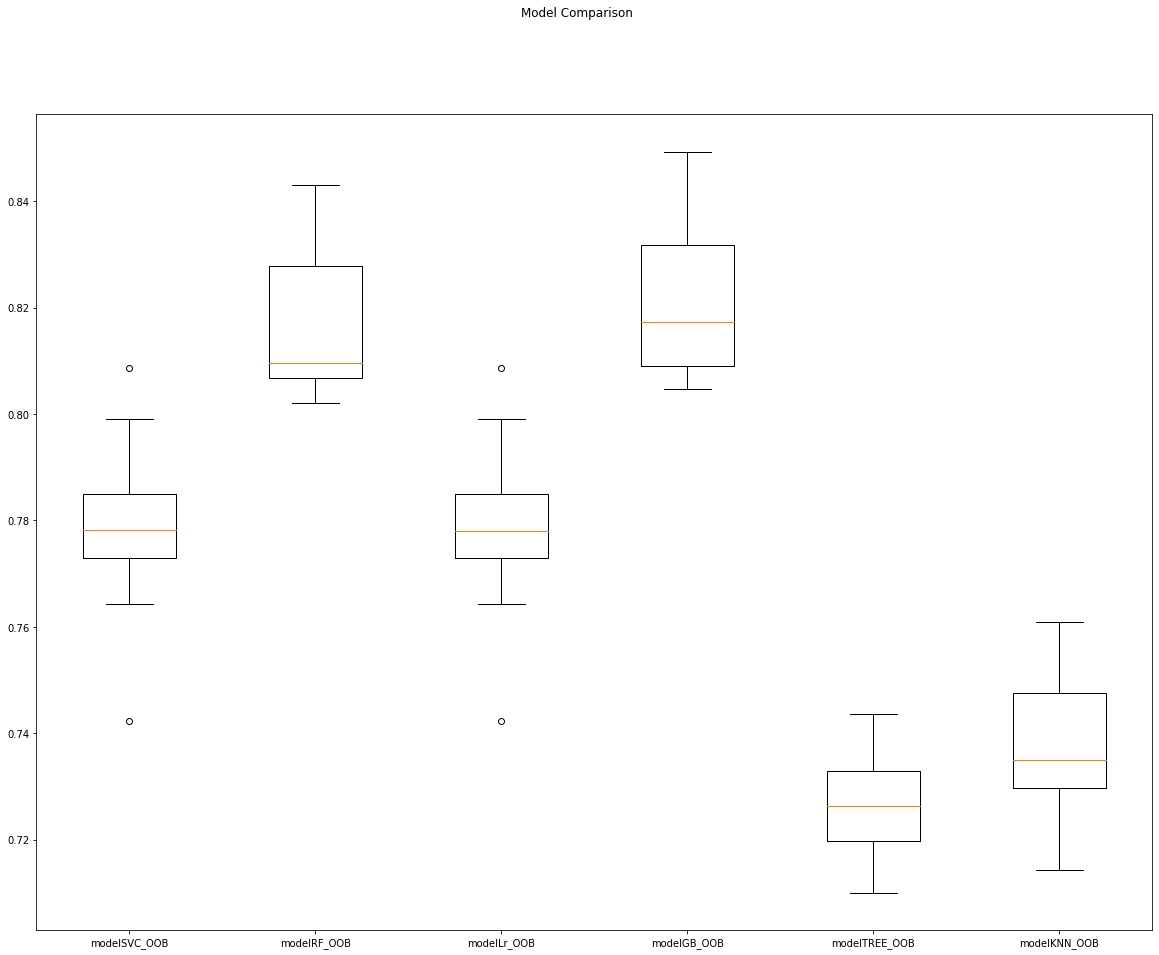

In [267]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_OOB)
ax.set_xticklabels(model_names_OOB)
plt.show()

In [ ]:
### Top Model Selected is modelGB_OOB

In [ ]:
####################################################################################
# Model development -- Out of Box Scaled
####################################################################################

In [364]:
#Models
modelSVC_OOB_S = SVC(gamma = 'scale')
modelRF_OOB_S = RandomForestClassifier(n_estimators = 100)
modelLR_OOB_S = LinearRegression()
modelLr_OOB_S = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_OOB_S = GradientBoostingClassifier()
modelTREE_OOB_S = tree.DecisionTreeClassifier()
modelKNN_OOB_S = KNeighborsClassifier(n_neighbors=3)

In [365]:
#SVR
modelSVC_OOB_S.fit(X_train_OOB_S,y_train_OOB_S)
print(cross_val_score(modelSVC_OOB_S, X_train_OOB_S, y_train_OOB_S)) 
modelSVC_OOB_S.score(X_train_OOB_S,y_train_OOB_S)

[0.81452381 0.81571429 0.82357143 0.82214286 0.81666667]


0.8230952380952381

In [366]:
#Random Forest
modelRF_OOB_S.fit(X_train_OOB_S,y_train_OOB_S)
print(cross_val_score(modelRF_OOB_S, X_train_OOB_S, y_train_OOB_S))
modelRF_OOB_S.score(X_train_OOB_S,y_train_OOB_S)

[0.80809524 0.81285714 0.82261905 0.8202381  0.81095238]


0.9992380952380953

In [368]:
#Logistic Regression
modelLr_OOB_S.fit(X_train_OOB_S,y_train_OOB_S)
print(cross_val_score(modelLr_OOB_S, X_train_OOB_S, y_train_OOB_S))
modelLr_OOB_S.score(X_train_OOB_S,y_train_OOB_S)

[0.80928571 0.80952381 0.81142857 0.81309524 0.80666667]


0.8104285714285714

In [369]:
#Gradient Boosting
modelGB_OOB_S.fit(X_train_OOB_S,y_train_OOB_S)
print(cross_val_score(modelGB_OOB_S, X_train_OOB_S, y_train_OOB_S))
modelGB_OOB_S.score(X_train_OOB_S,y_train_OOB_S)

[0.81238095 0.81809524 0.82238095 0.83       0.81833333]


0.8266190476190476

In [370]:
#Decision Tree
modelTREE_OOB_S.fit(X_train_OOB_S,y_train_OOB_S)
print(cross_val_score(modelTREE_OOB_S, X_train_OOB_S, y_train_OOB_S)) 
modelTREE_OOB_S.score(X_train_OOB_S,y_train_OOB_S)

[0.70761905 0.73738095 0.72761905 0.72619048 0.7202381 ]


0.9992857142857143

In [371]:
#KNN
modelKNN_OOB_S.fit(X_train_OOB_S,y_train_OOB_S)
print(cross_val_score(modelKNN_OOB_S, X_train_OOB_S, y_train_OOB_S)) 
modelKNN_OOB_S.score(X_train_OOB_S,y_train_OOB_S)

[0.77547619 0.77166667 0.78071429 0.77619048 0.77047619]


0.8675238095238095

In [372]:
####################################################################################
# Evaluating the Results -- Out of Box Scaled Dataframe
####################################################################################

In [486]:
#SVC
predictions_OOB_S_SVC = modelSVC_OOB_S.predict(X_test_OOB_S)
accy_OOB_S_SVC = accuracy_score(y_test_OOB_S,predictions_OOB_S_SVC)
KAPPA_OOB_S_SVC = cohen_kappa_score(y_test_OOB_S, predictions_OOB_S_SVC)
ROC_OOB_S_SVC = roc_auc_score(y_test_OOB,predictions_OOB_S_SVC)
prec_OOB_S_SVC = precision_score(y_test_OOB, predictions_OOB_S_SVC)
rec_OOB_S_SVC = recall_score(y_test_OOB,predictions_OOB_S_SVC)
f1_OOB_S_SVC = f1_score(y_test_OOB,predictions_OOB_S_SVC)

model =  pd.DataFrame([['SVC', 'OOB_S', accy_OOB_S_SVC, KAPPA_OOB_S_SVC, ROC_OOB_S_SVC, prec_OOB_S_SVC, rec_OOB_S_SVC, f1_OOB_S_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
1,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
2,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,Tree,OOB,0.725111,0.220008,0.614295,0.378128,0.418891,0.397467
5,KNN,OOB,0.735889,0.116099,0.551137,0.335884,0.225359,0.269739
6,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351


In [487]:
#Random Forest
predictions_OOB_S_RF = modelRF_OOB_S.predict(X_test_OOB_S)
accy_OOB_S_RF = accuracy_score(y_test_OOB_S,predictions_OOB_S_RF)
KAPPA_OOB_S_RF = cohen_kappa_score(y_test_OOB_S, predictions_OOB_S_RF)
ROC_OOB_S_RF = roc_auc_score(y_test_OOB,predictions_OOB_S_RF)
prec_OOB_S_RF = precision_score(y_test_OOB, predictions_OOB_S_RF)
rec_OOB_S_RF = recall_score(y_test_OOB,predictions_OOB_S_RF)
f1_OOB_S_RF = f1_score(y_test_OOB,predictions_OOB_S_RF)

model =  pd.DataFrame([['RF', 'OOB_S', accy_OOB_S_RF, KAPPA_OOB_S_RF, ROC_OOB_S_RF, prec_OOB_S_RF, rec_OOB_S_RF, f1_OOB_S_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
1,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
2,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,Tree,OOB,0.725111,0.220008,0.614295,0.378128,0.418891,0.397467
5,KNN,OOB,0.735889,0.116099,0.551137,0.335884,0.225359,0.269739
6,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
7,RF,OOB_S,0.814000,0.358994,0.653554,0.617094,0.370637,0.463117


In [488]:
#Logistic Regression
predictions_OOB_S_Lr = modelLr_OOB_S.predict(X_test_OOB_S)
accy_OOB_S_Lr = accuracy_score(y_test_OOB_S,predictions_OOB_S_Lr)
KAPPA_OOB_S_Lr = cohen_kappa_score(y_test_OOB_S, predictions_OOB_S_Lr)
ROC_OOB_S_Lr = roc_auc_score(y_test_OOB,predictions_OOB_S_Lr)
prec_OOB_S_Lr = precision_score(y_test_OOB, predictions_OOB_S_Lr)
rec_OOB_S_Lr = recall_score(y_test_OOB,predictions_OOB_S_Lr)
f1_OOB_S_Lr = f1_score(y_test_OOB,predictions_OOB_S_Lr)

model =  pd.DataFrame([['Lr', 'OOB_S', accy_OOB_S_Lr, KAPPA_OOB_S_Lr, ROC_OOB_S_Lr, prec_OOB_S_Lr, rec_OOB_S_Lr, f1_OOB_S_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
1,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
2,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,Tree,OOB,0.725111,0.220008,0.614295,0.378128,0.418891,0.397467
5,KNN,OOB,0.735889,0.116099,0.551137,0.335884,0.225359,0.269739
6,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
7,RF,OOB_S,0.814000,0.358994,0.653554,0.617094,0.370637,0.463117
8,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663


In [489]:
#Gradient Boosting
predictions_OOB_S_GB = modelGB_OOB_S.predict(X_test_OOB_S)
accy_OOB_S_GB = accuracy_score(y_test_OOB_S,predictions_OOB_S_GB)
KAPPA_OOB_S_GB = cohen_kappa_score(y_test_OOB_S, predictions_OOB_S_GB)
ROC_OOB_S_GB = roc_auc_score(y_test_OOB,predictions_OOB_S_GB)
prec_OOB_S_GB = precision_score(y_test_OOB, predictions_OOB_S_GB)
rec_OOB_S_GB = recall_score(y_test_OOB,predictions_OOB_S_GB)
f1_OOB_S_GB = f1_score(y_test_OOB,predictions_OOB_S_GB)

model =  pd.DataFrame([['GB', 'OOB_S', accy_OOB_S_GB, KAPPA_OOB_S_GB, ROC_OOB_S_GB, prec_OOB_S_GB, rec_OOB_S_GB, f1_OOB_S_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
1,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
2,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,Tree,OOB,0.725111,0.220008,0.614295,0.378128,0.418891,0.397467
5,KNN,OOB,0.735889,0.116099,0.551137,0.335884,0.225359,0.269739
6,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
7,RF,OOB_S,0.814000,0.358994,0.653554,0.617094,0.370637,0.463117
8,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663
9,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855


In [490]:
#Decision Tree
predictions_OOB_S_tree = modelTREE_OOB_S.predict(X_test_OOB_S)
accy_OOB_S_tree = accuracy_score(y_test_OOB_S,predictions_OOB_S_tree)
KAPPA_OOB_S_tree = cohen_kappa_score(y_test_OOB_S, predictions_OOB_S_tree)
ROC_OOB_S_tree = roc_auc_score(y_test_OOB,predictions_OOB_S_tree)
prec_OOB_S_tree = precision_score(y_test_OOB, predictions_OOB_S_tree)
rec_OOB_S_tree = recall_score(y_test_OOB,predictions_OOB_S_tree)
f1_OOB_S_tree = f1_score(y_test_OOB,predictions_OOB_S_tree)

model =  pd.DataFrame([['tree', 'OOB_S', accy_OOB_S_tree, KAPPA_OOB_S_tree, ROC_OOB_S_tree, prec_OOB_S_tree, rec_OOB_S_tree, f1_OOB_S_tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
1,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
2,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,Tree,OOB,0.725111,0.220008,0.614295,0.378128,0.418891,0.397467
5,KNN,OOB,0.735889,0.116099,0.551137,0.335884,0.225359,0.269739
6,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
7,RF,OOB_S,0.814000,0.358994,0.653554,0.617094,0.370637,0.463117
8,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663
9,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855


In [491]:
#KNN
predictions_OOB_S_KNN = modelKNN_OOB_S.predict(X_test_OOB_S)
accy_OOB_S_KNN = accuracy_score(y_test_OOB_S,predictions_OOB_S_KNN)
KAPPA_OOB_S_KNN = cohen_kappa_score(y_test_OOB_S, predictions_OOB_S_KNN)
ROC_OOB_S_KNN = roc_auc_score(y_test_OOB,predictions_OOB_S_KNN)
prec_OOB_S_KNN = precision_score(y_test_OOB, predictions_OOB_S_KNN)
rec_OOB_S_KNN = recall_score(y_test_OOB,predictions_OOB_S_KNN)
f1_OOB_S_KNN = f1_score(y_test_OOB,predictions_OOB_S_KNN)

model =  pd.DataFrame([['KNN', 'OOB_S', accy_OOB_S_KNN, KAPPA_OOB_S_KNN, ROC_OOB_S_KNN, prec_OOB_S_KNN, rec_OOB_S_KNN, f1_OOB_S_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
1,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
2,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,Tree,OOB,0.725111,0.220008,0.614295,0.378128,0.418891,0.397467
5,KNN,OOB,0.735889,0.116099,0.551137,0.335884,0.225359,0.269739
6,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
7,RF,OOB_S,0.814000,0.358994,0.653554,0.617094,0.370637,0.463117
8,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663
9,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855


In [498]:
model_results = model_results.sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
9,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
6,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
1,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
7,RF,OOB_S,0.814000,0.358994,0.653554,0.617094,0.370637,0.463117
8,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663
0,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
2,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000
11,KNN,OOB_S,0.775556,0.282300,0.630137,0.476440,0.373717,0.418872
5,KNN,OOB,0.735889,0.116099,0.551137,0.335884,0.225359,0.269739


In [380]:
outcome_OOB_S = []
model_names_OOB_S = []
models_OOB_S = [('modelSVC_OOB_S', SVC(gamma = 'scale')),
              ('modelRF_OOB_S', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_OOB_S', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_OOB_S', GradientBoostingClassifier()),
              ('modelTREE_OOB_S', tree.DecisionTreeClassifier()),
              ('modelKNN_OOB_S', KNeighborsClassifier(n_neighbors=3))]

In [381]:
for model_name_OOB_S, model_OOB_S in models_OOB_S:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_OOB_S = model_selection.cross_val_score(model_OOB_S, features_OOB_S, depVar_OOB_S, cv=k_fold_validation, scoring='accuracy')
    outcome_OOB_S.append(results_OOB_S)
    model_names_OOB_S.append(model_name_OOB_S)
    output_message_OOB_S = "%s| Mean=%f STD=%f" % (model_name_OOB_S, results_OOB_S.mean(), results_OOB_S.std())
    print(output_message_OOB_S)

modelSVC_OOB_S| Mean=0.819433 STD=0.013832
modelRF_OOB_S| Mean=0.816700 STD=0.012536
modelLr_OOB_S| Mean=0.809500 STD=0.012167
modelGB_OOB_S| Mean=0.821300 STD=0.014631
modelTREE_OOB_S| Mean=0.727200 STD=0.014261
modelKNN_OOB_S| Mean=0.776967 STD=0.014157


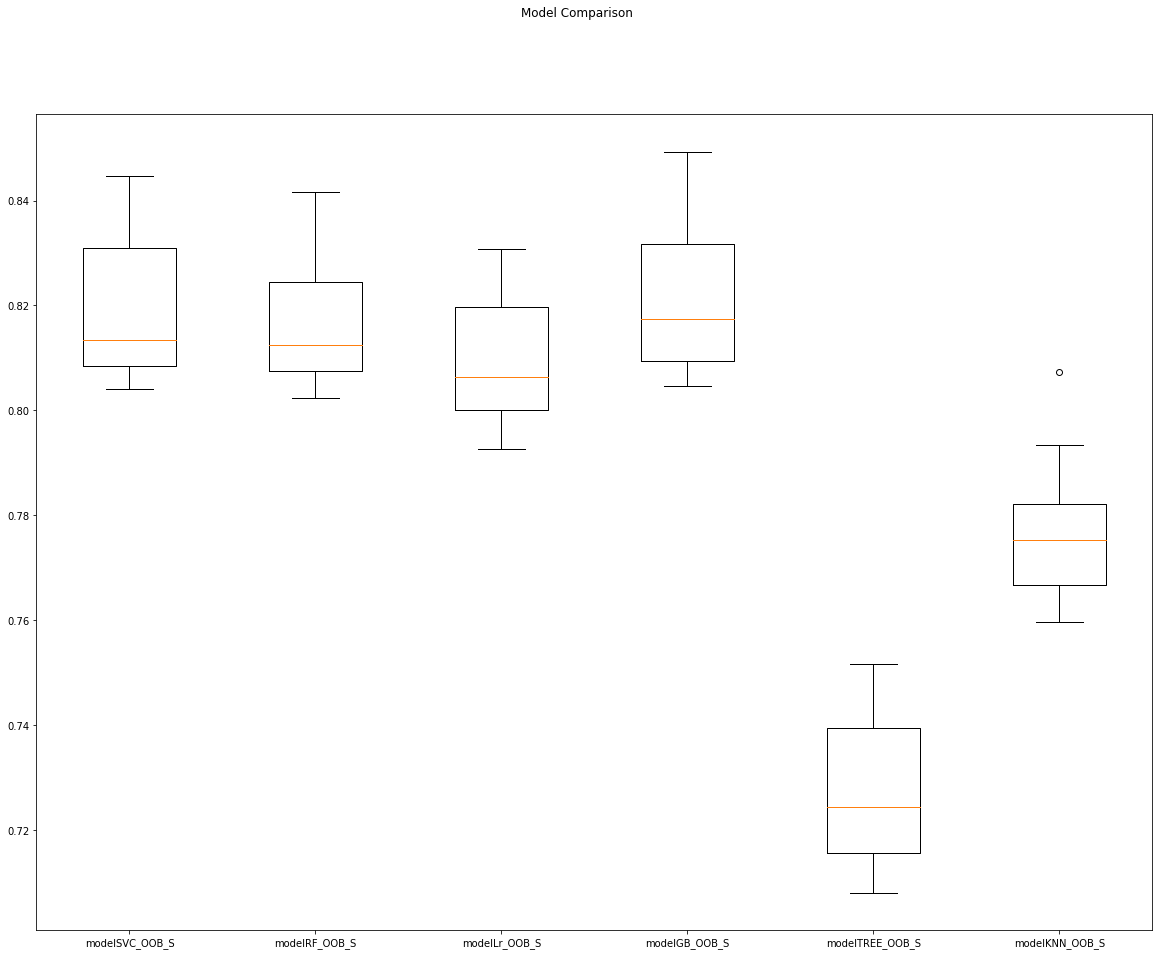

In [382]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_OOB_S)
ax.set_xticklabels(model_names_OOB_S)
plt.show()

In [287]:
#### Top model selected is modelGB_OOB_S

In [288]:
####################################################################################
# Model development -- Out of Box Feature Selection
####################################################################################

In [289]:
#Models
modelSVC_OOB_FS = SVC(gamma = 'scale')
modelRF_OOB_FS = RandomForestClassifier(n_estimators = 100)
modelLR_OOB_FS = LinearRegression()
modelLr_OOB_FS = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_OOB_FS = GradientBoostingClassifier()
modelTREE_OOB_FS = tree.DecisionTreeClassifier()
modelKNN_OOB_FS = KNeighborsClassifier(n_neighbors=3)

In [290]:
#SVR
modelSVC_OOB_FS.fit(X_train_OOB_FS,y_train_OOB_FS)
print(cross_val_score(modelSVC_OOB_FS, X_train_OOB_FS, y_train_OOB_FS)) 
modelSVC_OOB_FS.score(X_train_OOB_FS,y_train_OOB_FS)

[0.77690476 0.77690476 0.77666667 0.77666667 0.77666667]


0.7768095238095238

In [291]:
#Random Forest
modelRF_OOB_FS.fit(X_train_OOB_FS,y_train_OOB_FS)
print(cross_val_score(modelRF_OOB_FS, X_train_OOB_FS, y_train_OOB_FS))
modelRF_OOB_FS.score(X_train_OOB_FS,y_train_OOB_FS)

[0.81119048 0.81452381 0.82166667 0.82142857 0.8147619 ]


0.9992857142857143

In [293]:
#Logistic Regression
modelLr_OOB_FS.fit(X_train_OOB_FS,y_train_OOB_FS)
print(cross_val_score(modelLr_OOB_FS, X_train_OOB_FS, y_train_OOB_FS))
modelLr_OOB_FS.score(X_train_OOB_FS,y_train_OOB_FS)

[0.77690476 0.77666667 0.77666667 0.77642857 0.77666667]


0.7767142857142857

In [294]:
#Gradient Boosting
modelGB_OOB_FS.fit(X_train_OOB_FS,y_train_OOB_FS)
print(cross_val_score(modelGB_OOB_FS, X_train_OOB_FS, y_train_OOB_FS))
modelGB_OOB_FS.score(X_train_OOB_FS,y_train_OOB_FS)

[0.81357143 0.81738095 0.82333333 0.82714286 0.81880952]


0.8260952380952381

In [295]:
#Decision Tree
modelTREE_OOB_FS.fit(X_train_OOB_FS,y_train_OOB_FS)
print(cross_val_score(modelTREE_OOB_FS, X_train_OOB_FS, y_train_OOB_FS)) 
modelTREE_OOB_FS.score(X_train_OOB_FS,y_train_OOB_FS)

[0.71309524 0.73095238 0.72404762 0.72190476 0.72190476]


0.9992857142857143

In [296]:
#KNN
modelKNN_OOB_FS.fit(X_train_OOB_FS,y_train_OOB_FS)
print(cross_val_score(modelKNN_OOB_FS, X_train_OOB_FS, y_train_OOB_FS)) 
modelKNN_OOB_FS.score(X_train_OOB_FS,y_train_OOB_FS)

[0.73547619 0.73714286 0.73452381 0.73357143 0.72690476]


0.8455714285714285

In [297]:
####################################################################################
# Evaluating the Results -- Out of Box Feature Selection Dataframe
####################################################################################

In [499]:
#SVC
predictions_OOB_FS_SVC = modelSVC_OOB_FS.predict(X_test_OOB_FS)
accy_OOB_FS_SVC = accuracy_score(y_test_OOB_FS,predictions_OOB_FS_SVC)
KAPPA_OOB_FS_SVC = cohen_kappa_score(y_test_OOB_FS, predictions_OOB_FS_SVC)
ROC_OOB_FS_SVC = roc_auc_score(y_test_OOB,predictions_OOB_FS_SVC)
prec_OOB_FS_SVC = precision_score(y_test_OOB, predictions_OOB_FS_SVC)
rec_OOB_FS_SVC = recall_score(y_test_OOB,predictions_OOB_FS_SVC)
f1_OOB_FS_SVC = f1_score(y_test_OOB,predictions_OOB_FS_SVC)

model =  pd.DataFrame([['SVC', 'OOB_FS', accy_OOB_FS_SVC, KAPPA_OOB_FS_SVC, ROC_OOB_FS_SVC, prec_OOB_FS_SVC, rec_OOB_FS_SVC, f1_OOB_FS_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
1,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
2,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
3,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
4,RF,OOB_S,0.814000,0.358994,0.653554,0.617094,0.370637,0.463117
5,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663
6,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
12,SVC,OOB_FS,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
7,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000
8,KNN,OOB_S,0.775556,0.282300,0.630137,0.476440,0.373717,0.418872


In [500]:
#Random Forest
predictions_OOB_FS_RF = modelRF_OOB_FS.predict(X_test_OOB_FS)
accy_OOB_FS_RF = accuracy_score(y_test_OOB_FS,predictions_OOB_FS_RF)
KAPPA_OOB_FS_RF = cohen_kappa_score(y_test_OOB_FS, predictions_OOB_FS_RF)
ROC_OOB_FS_RF = roc_auc_score(y_test_OOB,predictions_OOB_FS_RF)
prec_OOB_FS_RF = precision_score(y_test_OOB, predictions_OOB_FS_RF)
rec_OOB_FS_RF = recall_score(y_test_OOB,predictions_OOB_FS_RF)
f1_OOB_FS_RF = f1_score(y_test_OOB,predictions_OOB_FS_RF)

model =  pd.DataFrame([['RF', 'OOB_FS', accy_OOB_FS_RF, KAPPA_OOB_FS_RF, ROC_OOB_FS_RF, prec_OOB_FS_RF, rec_OOB_FS_RF, f1_OOB_FS_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
1,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
2,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
3,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
13,RF,OOB_FS,0.815111,0.364479,0.656307,0.620135,0.376283,0.468371
4,RF,OOB_S,0.814000,0.358994,0.653554,0.617094,0.370637,0.463117
5,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663
6,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
7,SVC,OOB_FS,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
8,Lr,OOB,0.783444,-0.000222,0.499929,0.000000,0.000000,0.000000


In [501]:
#Logistic Regression
predictions_OOB_FS_Lr = modelLr_OOB_FS.predict(X_test_OOB_FS)
accy_OOB_FS_Lr = accuracy_score(y_test_OOB_FS,predictions_OOB_FS_Lr)
KAPPA_OOB_FS_Lr = cohen_kappa_score(y_test_OOB_FS, predictions_OOB_FS_Lr)
ROC_OOB_FS_Lr = roc_auc_score(y_test_OOB,predictions_OOB_FS_Lr)
prec_OOB_FS_Lr = precision_score(y_test_OOB, predictions_OOB_FS_Lr)
rec_OOB_FS_Lr = recall_score(y_test_OOB,predictions_OOB_FS_Lr)
f1_OOB_FS_Lr = f1_score(y_test_OOB,predictions_OOB_FS_Lr)

model =  pd.DataFrame([['Lr', 'OOB_FS', accy_OOB_FS_Lr, KAPPA_OOB_FS_Lr, ROC_OOB_FS_Lr, prec_OOB_FS_Lr, rec_OOB_FS_Lr, f1_OOB_FS_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
1,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
2,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
3,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
4,RF,OOB_FS,0.815111,0.364479,0.656307,0.620135,0.376283,0.468371
5,RF,OOB_S,0.814000,0.358994,0.653554,0.617094,0.370637,0.463117
6,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663
7,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
8,SVC,OOB_FS,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
14,Lr,OOB_FS,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000


In [502]:
#Gradient Boosting
predictions_OOB_FS_GB = modelGB_OOB_FS.predict(X_test_OOB_FS)
accy_OOB_FS_GB = accuracy_score(y_test_OOB_FS,predictions_OOB_FS_GB)
KAPPA_OOB_FS_GB = cohen_kappa_score(y_test_OOB_FS, predictions_OOB_FS_GB)
ROC_OOB_FS_GB = roc_auc_score(y_test_OOB,predictions_OOB_FS_GB)
prec_OOB_FS_GB = precision_score(y_test_OOB, predictions_OOB_FS_GB)
rec_OOB_FS_GB = recall_score(y_test_OOB,predictions_OOB_FS_GB)
f1_OOB_FS_GB = f1_score(y_test_OOB,predictions_OOB_FS_GB)

model =  pd.DataFrame([['GB', 'OOB_FS', accy_OOB_FS_GB, KAPPA_OOB_FS_GB, ROC_OOB_FS_GB, prec_OOB_FS_GB, rec_OOB_FS_GB, f1_OOB_FS_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
15,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
0,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
1,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
2,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
3,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
4,RF,OOB_FS,0.815111,0.364479,0.656307,0.620135,0.376283,0.468371
5,RF,OOB_S,0.814000,0.358994,0.653554,0.617094,0.370637,0.463117
6,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663
7,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
8,SVC,OOB_FS,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000


In [503]:
#Decision Tree
predictions_OOB_FS_tree = modelTREE_OOB_FS.predict(X_test_OOB_FS)
accy_OOB_FS_tree = accuracy_score(y_test_OOB_FS,predictions_OOB_FS_tree)
KAPPA_OOB_FS_tree = cohen_kappa_score(y_test_OOB_FS, predictions_OOB_FS_tree)
ROC_OOB_FS_tree = roc_auc_score(y_test_OOB,predictions_OOB_FS_tree)
prec_OOB_FS_tree = precision_score(y_test_OOB, predictions_OOB_FS_tree)
rec_OOB_FS_tree = recall_score(y_test_OOB,predictions_OOB_FS_tree)
f1_OOB_FS_tree = f1_score(y_test_OOB,predictions_OOB_FS_tree)

model =  pd.DataFrame([['Tree', 'OOB_FS', accy_OOB_FS_tree, KAPPA_OOB_FS_tree, ROC_OOB_FS_tree, prec_OOB_FS_tree, rec_OOB_FS_tree, f1_OOB_FS_tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
1,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
4,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
5,RF,OOB_FS,0.815111,0.364479,0.656307,0.620135,0.376283,0.468371
6,RF,OOB_S,0.814000,0.358994,0.653554,0.617094,0.370637,0.463117
7,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663
8,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
9,SVC,OOB_FS,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000


In [504]:
#KNN
predictions_OOB_FS_KNN = modelKNN_OOB_FS.predict(X_test_OOB_FS)
accy_OOB_FS_KNN = accuracy_score(y_test_OOB_FS,predictions_OOB_FS_KNN)
KAPPA_OOB_FS_KNN = cohen_kappa_score(y_test_OOB_FS, predictions_OOB_FS_KNN)
ROC_OOB_FS_KNN = roc_auc_score(y_test_OOB,predictions_OOB_FS_KNN)
prec_OOB_FS_KNN = precision_score(y_test_OOB, predictions_OOB_FS_KNN)
rec_OOB_FS_KNN = recall_score(y_test_OOB,predictions_OOB_FS_KNN)
f1_OOB_FS_KNN = f1_score(y_test_OOB,predictions_OOB_FS_KNN)

model =  pd.DataFrame([['KNN', 'OOB_FS', accy_OOB_FS_KNN, KAPPA_OOB_FS_KNN, ROC_OOB_FS_KNN, prec_OOB_FS_KNN, rec_OOB_FS_KNN, f1_OOB_FS_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
1,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
4,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
5,RF,OOB_FS,0.815111,0.364479,0.656307,0.620135,0.376283,0.468371
6,RF,OOB_S,0.814000,0.358994,0.653554,0.617094,0.370637,0.463117
7,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663
8,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000
9,SVC,OOB_FS,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000


In [305]:
outcome_OOB_FS = []
model_names_OOB_FS = []
models_OOB_FS = [('modelSVC_OOB_FS', SVC(gamma = 'scale')),
              ('modelRF_OOB_FS', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_OOB_FS', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_OOB_FS', GradientBoostingClassifier()),
              ('modelTREE_OOB_FS', tree.DecisionTreeClassifier()),
              ('modelKNN_OOB_FS', KNeighborsClassifier(n_neighbors=3))]

In [306]:
for model_name_OOB_FS, model_OOB_FS in models_OOB_FS:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_OOB_FS = model_selection.cross_val_score(model_OOB_FS, features_OOB_FS, depVar_OOB_FS, cv=k_fold_validation, scoring='accuracy')
    outcome_OOB_FS.append(results_OOB_FS)
    model_names_OOB_FS.append(model_name_OOB_FS)
    output_message_OOB_FS = "%s| Mean=%f STD=%f" % (model_name_OOB_FS, results_OOB_FS.mean(), results_OOB_FS.std())
    print(output_message_OOB_FS)

modelSVC_OOB_FS| Mean=0.778800 STD=0.017234
modelRF_OOB_FS| Mean=0.816667 STD=0.013252
modelLr_OOB_FS| Mean=0.778733 STD=0.017159
modelGB_OOB_FS| Mean=0.821467 STD=0.014595
modelTREE_OOB_FS| Mean=0.726567 STD=0.010928
modelKNN_OOB_FS| Mean=0.738767 STD=0.014621


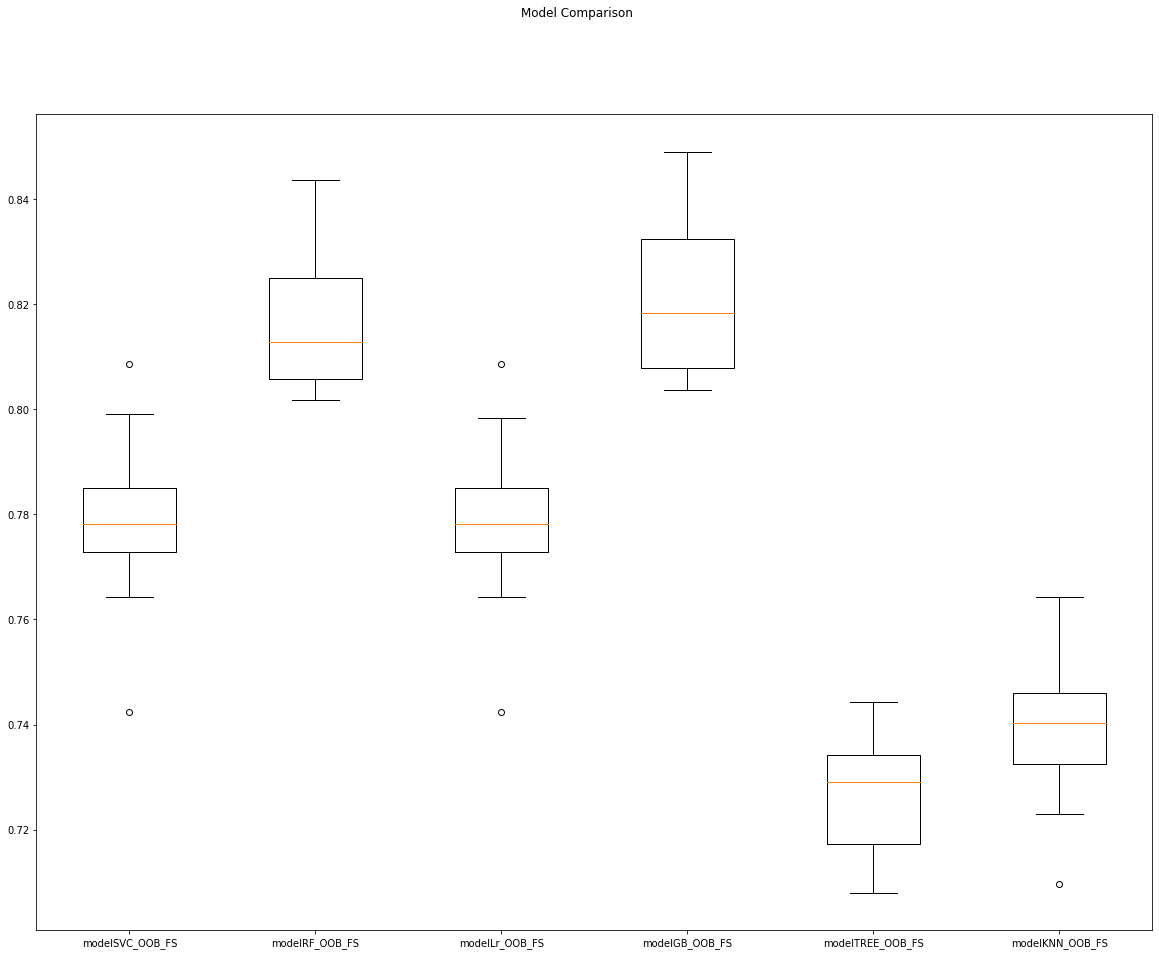

In [307]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_OOB_FS)
ax.set_xticklabels(model_names_OOB_FS)
plt.show()

In [308]:
#### Top Model selected is modelGB_OOB_FS

In [309]:
####################################################################################
# Model development -- Out of Box Feature Selection Scaled
####################################################################################

In [383]:
#Models
modelSVC_OOB_FS_S = SVC(gamma = 'scale')
modelRF_OOB_FS_S = RandomForestClassifier(n_estimators = 100)
modelLR_OOB_FS_S = LinearRegression()
modelLr_OOB_FS_S = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_OOB_FS_S = GradientBoostingClassifier()
modelTREE_OOB_FS_S = tree.DecisionTreeClassifier()
modelKNN_OOB_FS_S = KNeighborsClassifier(n_neighbors=3)

In [384]:
#SVR
modelSVC_OOB_FS_S.fit(X_train_OOB_FS_S,y_train_OOB_FS_S)
print(cross_val_score(modelSVC_OOB_FS_S, X_train_OOB_FS_S, y_train_OOB_FS_S)) 
modelSVC_OOB_FS_S.score(X_train_OOB_FS_S,y_train_OOB_FS_S)

[0.81404762 0.81714286 0.82238095 0.82333333 0.81833333]


0.822952380952381

In [385]:
#Random Forest
modelRF_OOB_FS_S.fit(X_train_OOB_FS_S,y_train_OOB_FS_S)
print(cross_val_score(modelRF_OOB_FS_S, X_train_OOB_FS_S, y_train_OOB_FS_S))
modelRF_OOB_FS_S.score(X_train_OOB_FS_S,y_train_OOB_FS_S)

[0.80857143 0.81166667 0.81928571 0.82071429 0.81428571]


0.9991428571428571

In [387]:
#Logistic Regression
modelLr_OOB_FS_S.fit(X_train_OOB_FS_S,y_train_OOB_FS_S)
print(cross_val_score(modelLr_OOB_FS_S, X_train_OOB_FS_S, y_train_OOB_FS_S))
modelLr_OOB_FS_S.score(X_train_OOB_FS_S,y_train_OOB_FS_S)

[0.80857143 0.80904762 0.81119048 0.81261905 0.80666667]


0.8102380952380952

In [388]:
#Gradient Boosting
modelGB_OOB_FS_S.fit(X_train_OOB_FS_S,y_train_OOB_FS_S)
print(cross_val_score(modelGB_OOB_FS_S, X_train_OOB_FS_S, y_train_OOB_FS_S))
modelGB_OOB_FS_S.score(X_train_OOB_FS_S,y_train_OOB_FS_S)

[0.81357143 0.81738095 0.82333333 0.82714286 0.81880952]


0.8260952380952381

In [389]:
#Decision Tree
modelTREE_OOB_FS_S.fit(X_train_OOB_FS_S,y_train_OOB_FS_S)
print(cross_val_score(modelTREE_OOB_FS_S, X_train_OOB_FS_S, y_train_OOB_FS_S)) 
modelTREE_OOB_FS_S.score(X_train_OOB_FS_S,y_train_OOB_FS_S)

[0.71857143 0.73428571 0.72357143 0.7302381  0.715     ]


0.9992857142857143

In [390]:
#KNN
modelKNN_OOB_FS_S.fit(X_train_OOB_FS_S,y_train_OOB_FS_S)
print(cross_val_score(modelKNN_OOB_FS_S, X_train_OOB_FS_S, y_train_OOB_FS_S)) 
modelKNN_OOB_FS_S.score(X_train_OOB_FS_S,y_train_OOB_FS_S)

[0.77285714 0.76857143 0.78357143 0.77833333 0.77714286]


0.8670476190476191

In [391]:
####################################################################################
# Evaluating the Results -- Out of Box Feature Selection Scaled Dataframe
####################################################################################

In [505]:
#SVC
predictions_OOB_FS_S_SVC = modelSVC_OOB_FS_S.predict(X_test_OOB_FS_S)
accy_OOB_FS_S_SVC = accuracy_score(y_test_OOB_FS_S,predictions_OOB_FS_S_SVC)
KAPPA_OOB_FS_S_SVC = cohen_kappa_score(y_test_OOB_FS_S, predictions_OOB_FS_S_SVC)
ROC_OOB_FS_S_SVC = roc_auc_score(y_test_OOB,predictions_OOB_FS_S_SVC)
prec_OOB_FS_S_SVC = precision_score(y_test_OOB, predictions_OOB_FS_S_SVC)
rec_OOB_FS_S_SVC = recall_score(y_test_OOB,predictions_OOB_FS_S_SVC)
f1_OOB_FS_S_SVC = f1_score(y_test_OOB,predictions_OOB_FS_S_SVC)

model =  pd.DataFrame([['SVC', 'OOB_FS_S', accy_OOB_FS_S_SVC, KAPPA_OOB_FS_S_SVC, ROC_OOB_FS_S_SVC, prec_OOB_FS_S_SVC, rec_OOB_FS_S_SVC, f1_OOB_FS_S_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
1,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
18,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
3,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
4,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
5,RF,OOB_FS,0.815111,0.364479,0.656307,0.620135,0.376283,0.468371
6,RF,OOB_S,0.814000,0.358994,0.653554,0.617094,0.370637,0.463117
7,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663
8,SVC,OOB,0.783556,0.000000,0.500000,0.000000,0.000000,0.000000


In [506]:
#Random Forest
predictions_OOB_FS_S_RF = modelRF_OOB_FS_S.predict(X_test_OOB_FS_S)
accy_OOB_FS_S_RF = accuracy_score(y_test_OOB_FS_S,predictions_OOB_FS_S_RF)
KAPPA_OOB_FS_S_RF = cohen_kappa_score(y_test_OOB_FS_S, predictions_OOB_FS_S_RF)
ROC_OOB_FS_S_RF = roc_auc_score(y_test_OOB,predictions_OOB_FS_S_RF)
prec_OOB_FS_S_RF = precision_score(y_test_OOB, predictions_OOB_FS_S_RF)
rec_OOB_FS_S_RF = recall_score(y_test_OOB,predictions_OOB_FS_S_RF)
f1_OOB_FS_S_RF = f1_score(y_test_OOB,predictions_OOB_FS_S_RF)

model =  pd.DataFrame([['RF', 'OOB_FS_S', accy_OOB_FS_S_RF, KAPPA_OOB_FS_S_RF, ROC_OOB_FS_S_RF, prec_OOB_FS_S_RF, rec_OOB_FS_S_RF, f1_OOB_FS_S_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
1,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
4,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
5,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
19,RF,OOB_FS_S,0.816444,0.370154,0.659015,0.624370,0.381417,0.473550
6,RF,OOB_FS,0.815111,0.364479,0.656307,0.620135,0.376283,0.468371
7,RF,OOB_S,0.814000,0.358994,0.653554,0.617094,0.370637,0.463117
8,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663


In [507]:
#Logistic Regression
predictions_OOB_FS_S_Lr = modelLr_OOB_FS_S.predict(X_test_OOB_FS_S)
accy_OOB_FS_S_Lr = accuracy_score(y_test_OOB_FS_S,predictions_OOB_FS_S_Lr)
KAPPA_OOB_FS_S_Lr = cohen_kappa_score(y_test_OOB_FS_S, predictions_OOB_FS_S_Lr)
ROC_OOB_FS_S_Lr = roc_auc_score(y_test_OOB,predictions_OOB_FS_S_Lr)
prec_OOB_FS_S_Lr = precision_score(y_test_OOB, predictions_OOB_FS_S_Lr)
rec_OOB_FS_S_Lr = recall_score(y_test_OOB,predictions_OOB_FS_S_Lr)
f1_OOB_FS_S_Lr = f1_score(y_test_OOB,predictions_OOB_FS_S_Lr)

model =  pd.DataFrame([['Lr', 'OOB_FS_S', accy_OOB_FS_S_Lr, KAPPA_OOB_FS_S_Lr, ROC_OOB_FS_S_Lr, prec_OOB_FS_S_Lr, rec_OOB_FS_S_Lr, f1_OOB_FS_S_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
1,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
4,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
5,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
6,RF,OOB_FS_S,0.816444,0.370154,0.659015,0.624370,0.381417,0.473550
7,RF,OOB_FS,0.815111,0.364479,0.656307,0.620135,0.376283,0.468371
8,RF,OOB_S,0.814000,0.358994,0.653554,0.617094,0.370637,0.463117
9,Lr,OOB_S,0.812444,0.277368,0.606119,0.690058,0.242300,0.358663


In [508]:
#Gradient Boosting
predictions_OOB_FS_S_GB = modelGB_OOB_FS_S.predict(X_test_OOB_FS_S)
accy_OOB_FS_S_GB = accuracy_score(y_test_OOB_FS_S,predictions_OOB_FS_S_GB)
KAPPA_OOB_FS_S_GB = cohen_kappa_score(y_test_OOB_FS_S, predictions_OOB_FS_S_GB)
ROC_OOB_FS_S_GB = roc_auc_score(y_test_OOB,predictions_OOB_FS_S_GB)
prec_OOB_FS_S_GB = precision_score(y_test_OOB, predictions_OOB_FS_S_GB)
rec_OOB_FS_S_GB = recall_score(y_test_OOB,predictions_OOB_FS_S_GB)
f1_OOB_FS_S_GB = f1_score(y_test_OOB,predictions_OOB_FS_S_GB)

model =  pd.DataFrame([['GB', 'OOB_FS_S', accy_OOB_FS_S_GB, KAPPA_OOB_FS_S_GB, ROC_OOB_FS_S_GB, prec_OOB_FS_S_GB, rec_OOB_FS_S_GB, f1_OOB_FS_S_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
21,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
0,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
1,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
2,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
3,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
4,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
5,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
6,RF,OOB_FS_S,0.816444,0.370154,0.659015,0.624370,0.381417,0.473550
7,RF,OOB_FS,0.815111,0.364479,0.656307,0.620135,0.376283,0.468371
8,RF,OOB_S,0.814000,0.358994,0.653554,0.617094,0.370637,0.463117


In [509]:
#Decision Tree
predictions_OOB_FS_S_tree = modelTREE_OOB_FS_S.predict(X_test_OOB_FS_S)
accy_OOB_FS_S_tree = accuracy_score(y_test_OOB_FS_S,predictions_OOB_FS_S_tree)
KAPPA_OOB_FS_S_tree = cohen_kappa_score(y_test_OOB_FS_S, predictions_OOB_FS_S_tree)
ROC_OOB_FS_S_tree = roc_auc_score(y_test_OOB,predictions_OOB_FS_S_tree)
prec_OOB_FS_S_tree = precision_score(y_test_OOB, predictions_OOB_FS_S_tree)
rec_OOB_FS_S_tree = recall_score(y_test_OOB,predictions_OOB_FS_S_tree)
f1_OOB_FS_S_tree = f1_score(y_test_OOB,predictions_OOB_FS_S_tree)

model =  pd.DataFrame([['Tree', 'OOB_FS_S', accy_OOB_FS_S_tree, KAPPA_OOB_FS_S_tree, ROC_OOB_FS_S_tree, prec_OOB_FS_S_tree, rec_OOB_FS_S_tree, f1_OOB_FS_S_tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
5,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
6,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
7,RF,OOB_FS_S,0.816444,0.370154,0.659015,0.624370,0.381417,0.473550
8,RF,OOB_FS,0.815111,0.364479,0.656307,0.620135,0.376283,0.468371
9,RF,OOB_S,0.814000,0.358994,0.653554,0.617094,0.370637,0.463117


In [510]:
#KNN
predictions_OOB_FS_S_KNN = modelKNN_OOB_FS_S.predict(X_test_OOB_FS_S)
accy_OOB_FS_S_KNN = accuracy_score(y_test_OOB_FS_S,predictions_OOB_FS_S_KNN)
KAPPA_OOB_FS_S_KNN = cohen_kappa_score(y_test_OOB_FS_S, predictions_OOB_FS_S_KNN)
ROC_OOB_FS_S_KNN = roc_auc_score(y_test_OOB,predictions_OOB_FS_S_KNN)
prec_OOB_FS_S_KNN = precision_score(y_test_OOB, predictions_OOB_FS_S_KNN)
rec_OOB_FS_S_KNN = recall_score(y_test_OOB,predictions_OOB_FS_S_KNN)
f1_OOB_FS_S_KNN = f1_score(y_test_OOB,predictions_OOB_FS_S_KNN)

model =  pd.DataFrame([['KNN', 'OOB_FS_S', accy_OOB_FS_S_KNN, KAPPA_OOB_FS_S_KNN, ROC_OOB_FS_S_KNN, prec_OOB_FS_S_KNN, rec_OOB_FS_S_KNN, f1_OOB_FS_S_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
5,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
6,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
7,RF,OOB_FS_S,0.816444,0.370154,0.659015,0.624370,0.381417,0.473550
8,RF,OOB_FS,0.815111,0.364479,0.656307,0.620135,0.376283,0.468371
9,RF,OOB_S,0.814000,0.358994,0.653554,0.617094,0.370637,0.463117


In [399]:
outcome_OOB_FS_S = []
model_names_OOB_FS_S = []
models_OOB_FS_S = [('modelSVC_OOB_FS_S', SVC(gamma = 'scale')),
              ('modelRF_OOB_FS_S', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_OOB_FS_S', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_OOB_FS_S', GradientBoostingClassifier()),
              ('modelTREE_OOB_FS_S', tree.DecisionTreeClassifier()),
              ('modelKNN_OOB_FS_S', KNeighborsClassifier(n_neighbors=3))]

In [400]:
for model_name_OOB_FS_S, model_OOB_FS_S in models_OOB_FS_S:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_OOB_FS_S = model_selection.cross_val_score(model_OOB_FS_S, features_OOB_FS_S, depVar_OOB_FS_S, cv=k_fold_validation, scoring='accuracy')
    outcome_OOB_FS_S.append(results_OOB_FS_S)
    model_names_OOB_FS_S.append(model_name_OOB_FS_S)
    output_message_OOB_FS_S = "%s| Mean=%f STD=%f" % (model_name_OOB_FS_S, results_OOB_FS_S.mean(), results_OOB_FS_S.std())
    print(output_message_OOB_FS_S)

modelSVC_OOB_FS_S| Mean=0.819567 STD=0.013872
modelRF_OOB_FS_S| Mean=0.816833 STD=0.013523
modelLr_OOB_FS_S| Mean=0.809467 STD=0.012215
modelGB_OOB_FS_S| Mean=0.821400 STD=0.014664
modelTREE_OOB_FS_S| Mean=0.722967 STD=0.011368
modelKNN_OOB_FS_S| Mean=0.777167 STD=0.013747


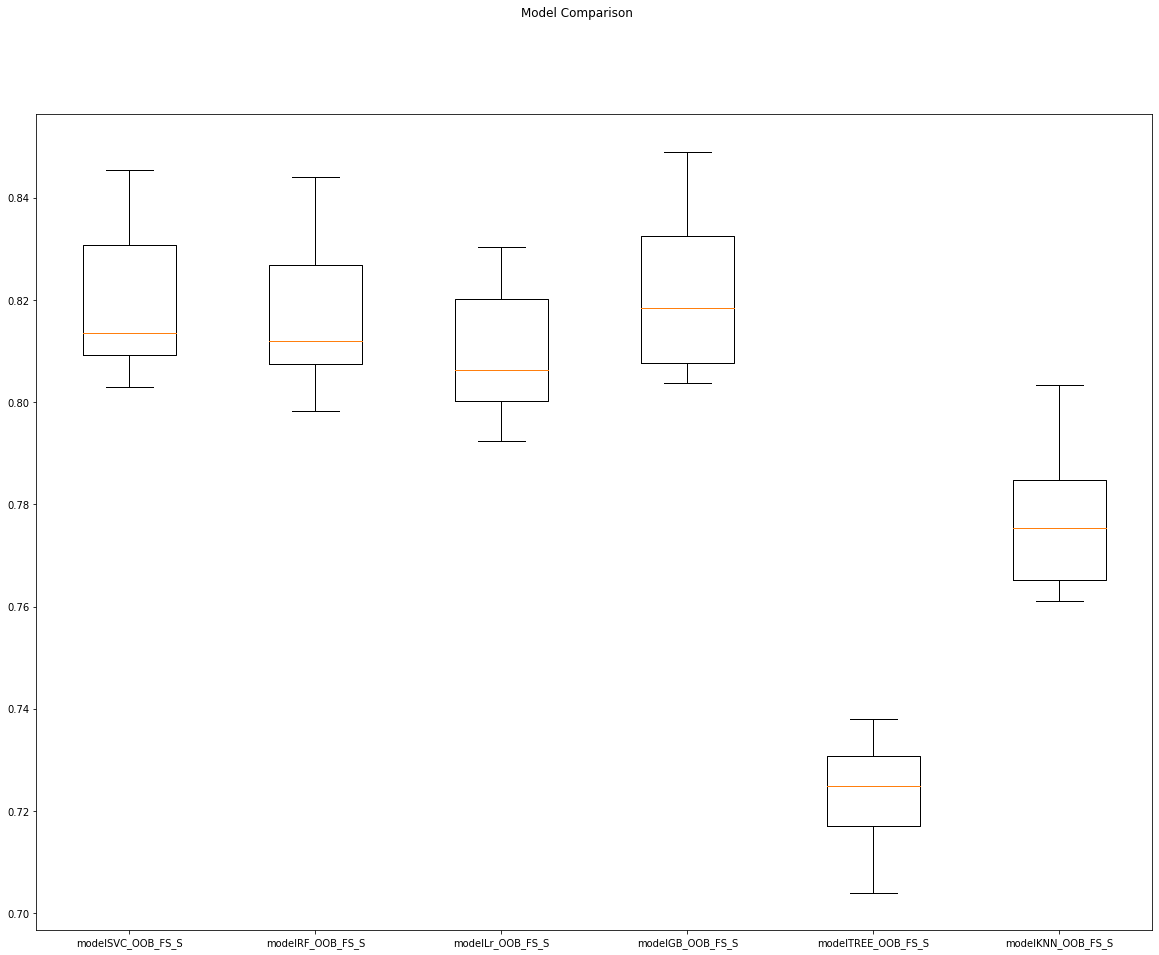

In [401]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_OOB_FS_S)
ax.set_xticklabels(model_names_OOB_FS_S)
plt.show()

In [ ]:
#### Top model selected is modelGBOOB_FS_S

In [ ]:
####################################################################################
# Model development -- Dummy Variable Dataframe
####################################################################################

In [402]:
#Models
modelSVC_DV = SVC(gamma = 'scale')
modelRF_DV = RandomForestClassifier(n_estimators = 100)
modelLR_DV = LinearRegression()
modelLr_DV = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_DV = GradientBoostingClassifier()
modelTREE_DV = tree.DecisionTreeClassifier()
modelKNN_DV = KNeighborsClassifier(n_neighbors=3)

In [403]:
#SVC
modelSVC_DV.fit(X_train_DV,y_train_DV)
print(cross_val_score(modelSVC_DV, X_train_DV, y_train_DV)) 
modelSVC_DV.score(X_train_DV,y_train_DV)

[0.77690476 0.77690476 0.77666667 0.77666667 0.77666667]


0.7769047619047619

In [404]:
#Random Forest
modelRF_DV.fit(X_train_DV,y_train_DV)
print(cross_val_score(modelRF_DV, X_train_DV, y_train_DV))
modelRF_DV.score(X_train_DV,y_train_DV)

[0.80833333 0.81380952 0.81833333 0.8152381  0.81166667]


0.9992857142857143

In [406]:
#Logistic Regression
modelLr_DV.fit(X_train_DV,y_train_DV)
print(cross_val_score(modelLr_DV, X_train_DV, y_train_DV))
modelLr_DV.score(X_train_DV,y_train_DV)

[0.77690476 0.77690476 0.77642857 0.77666667 0.77666667]


0.7767142857142857

In [407]:
#Gradient Boosting
modelGB_DV.fit(X_train_DV,y_train_DV)
print(cross_val_score(modelGB_DV, X_train_DV, y_train_DV))
modelGB_DV.score(X_train_DV,y_train_DV)

[0.81238095 0.81619048 0.81904762 0.82357143 0.81809524]


0.8266666666666667

In [408]:
#Decision Tree
modelTREE_DV.fit(X_train_DV,y_train_DV)
print(cross_val_score(modelTREE_DV, X_train_DV, y_train_DV)) 
modelTREE_DV.score(X_train_DV,y_train_DV)

[0.72452381 0.72380952 0.73833333 0.73357143 0.72928571]


0.9992857142857143

In [409]:
#KNN
modelKNN_DV.fit(X_train_DV,y_train_DV)
print(cross_val_score(modelKNN_DV, X_train_DV, y_train_DV)) 
modelKNN_DV.score(X_train_DV,y_train_DV)

[0.73857143 0.72833333 0.73404762 0.73928571 0.72619048]


0.844

In [410]:
####################################################################################
# Evaluating the Results -- Dummy Variables Dataframe
####################################################################################

In [511]:
#SVC
predictions_DV_SVC = modelSVC_DV.predict(X_test_DV)
accy_DV_SVC = accuracy_score(y_test_DV,predictions_DV_SVC)
KAPPA_DV_SVC = cohen_kappa_score(y_test_DV, predictions_DV_SVC)
ROC_DV_SVC = roc_auc_score(y_test_OOB,predictions_DV_SVC)
prec_DV_SVC = precision_score(y_test_OOB, predictions_DV_SVC)
rec_DV_SVC = recall_score(y_test_OOB,predictions_DV_SVC)
f1_DV_SVC = f1_score(y_test_OOB,predictions_DV_SVC)

model =  pd.DataFrame([['SVC', 'DV', accy_DV_SVC, KAPPA_DV_SVC, ROC_DV_SVC, prec_DV_SVC, rec_DV_SVC, f1_DV_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
5,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
6,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
7,RF,OOB_FS_S,0.816444,0.370154,0.659015,0.624370,0.381417,0.473550
8,RF,OOB_FS,0.815111,0.364479,0.656307,0.620135,0.376283,0.468371
9,RF,OOB_S,0.814000,0.358994,0.653554,0.617094,0.370637,0.463117


In [512]:
#Random Forest
predictions_DV_RF = modelRF_DV.predict(X_test_DV)
accy_DV_RF = accuracy_score(y_test_DV,predictions_DV_RF)
KAPPA_DV_RF = cohen_kappa_score(y_test_DV, predictions_DV_RF)
ROC_DV_RF = roc_auc_score(y_test_OOB,predictions_DV_RF)
prec_DV_RF = precision_score(y_test_OOB, predictions_DV_RF)
rec_DV_RF = recall_score(y_test_OOB,predictions_DV_RF)
f1_DV_RF = f1_score(y_test_OOB,predictions_DV_RF)

model =  pd.DataFrame([['RF', 'DV', accy_DV_RF, KAPPA_DV_RF, ROC_DV_RF, prec_DV_RF, rec_DV_RF, f1_DV_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
5,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
25,RF,DV,0.817667,0.370400,0.658123,0.632214,0.376797,0.472178
6,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
7,RF,OOB_FS_S,0.816444,0.370154,0.659015,0.624370,0.381417,0.473550
8,RF,OOB_FS,0.815111,0.364479,0.656307,0.620135,0.376283,0.468371


In [513]:
#Logistic Regression
predictions_DV_Lr = modelLr_DV.predict(X_test_DV)
accy_DV_Lr = accuracy_score(y_test_DV,predictions_DV_Lr)
KAPPA_DV_Lr = cohen_kappa_score(y_test_DV, predictions_DV_Lr)
ROC_DV_Lr = roc_auc_score(y_test_OOB,predictions_DV_Lr)
prec_DV_Lr = precision_score(y_test_OOB, predictions_DV_Lr)
rec_DV_Lr = recall_score(y_test_OOB,predictions_DV_Lr)
f1_DV_Lr = f1_score(y_test_OOB,predictions_DV_Lr)

model =  pd.DataFrame([['Lr', 'DV', accy_DV_Lr, KAPPA_DV_Lr, ROC_DV_Lr, prec_DV_Lr, rec_DV_Lr, f1_DV_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
5,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
6,RF,DV,0.817667,0.370400,0.658123,0.632214,0.376797,0.472178
7,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
8,RF,OOB_FS_S,0.816444,0.370154,0.659015,0.624370,0.381417,0.473550
9,RF,OOB_FS,0.815111,0.364479,0.656307,0.620135,0.376283,0.468371


In [514]:
#Gradient Boosting
predictions_DV_GB = modelGB_DV.predict(X_test_DV)
accy_DV_GB = accuracy_score(y_test_DV,predictions_DV_GB)
KAPPA_DV_GB = cohen_kappa_score(y_test_DV, predictions_DV_GB)
ROC_DV_GB = roc_auc_score(y_test_OOB,predictions_DV_GB)
prec_DV_GB = precision_score(y_test_OOB, predictions_DV_GB)
rec_DV_GB = recall_score(y_test_OOB,predictions_DV_GB)
f1_DV_GB = f1_score(y_test_OOB,predictions_DV_GB)

model =  pd.DataFrame([['GB', 'DV', accy_DV_GB, KAPPA_DV_GB, ROC_DV_GB, prec_DV_GB, rec_DV_GB, f1_DV_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
5,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
27,GB,DV,0.819556,0.367146,0.654313,0.648624,0.362936,0.465438
6,RF,DV,0.817667,0.370400,0.658123,0.632214,0.376797,0.472178
7,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
8,RF,OOB_FS_S,0.816444,0.370154,0.659015,0.624370,0.381417,0.473550


In [515]:
#Decision Tree
predictions_DV_tree = modelTREE_DV.predict(X_test_DV)
accy_DV_tree = accuracy_score(y_test_DV,predictions_DV_tree)
KAPPA_DV_tree = cohen_kappa_score(y_test_DV, predictions_DV_tree)
ROC_DV_tree = roc_auc_score(y_test_OOB,predictions_DV_tree)
prec_DV_tree = precision_score(y_test_OOB, predictions_DV_tree)
rec_DV_tree = recall_score(y_test_OOB,predictions_DV_tree)
f1_DV_tree = f1_score(y_test_OOB,predictions_DV_tree)

model =  pd.DataFrame([['Tree', 'DV', accy_DV_tree, KAPPA_DV_tree, ROC_DV_tree, prec_DV_tree, rec_DV_tree, f1_DV_tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
5,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
6,GB,DV,0.819556,0.367146,0.654313,0.648624,0.362936,0.465438
7,RF,DV,0.817667,0.370400,0.658123,0.632214,0.376797,0.472178
8,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
9,RF,OOB_FS_S,0.816444,0.370154,0.659015,0.624370,0.381417,0.473550


In [516]:
#KNN
predictions_DV_KNN = modelKNN_DV.predict(X_test_DV)
accy_DV_KNN = accuracy_score(y_test_DV,predictions_DV_KNN)
KAPPA_DV_KNN = cohen_kappa_score(y_test_DV, predictions_DV_KNN)
ROC_DV_KNN = roc_auc_score(y_test_OOB,predictions_DV_KNN)
prec_DV_KNN = precision_score(y_test_OOB, predictions_DV_KNN)
rec_DV_KNN = recall_score(y_test_OOB,predictions_DV_KNN)
f1_DV_KNN = f1_score(y_test_OOB,predictions_DV_KNN)

model =  pd.DataFrame([['KNN', 'DV', accy_DV_KNN, KAPPA_DV_KNN, ROC_DV_KNN, prec_DV_KNN, rec_DV_KNN, f1_DV_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
5,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
6,GB,DV,0.819556,0.367146,0.654313,0.648624,0.362936,0.465438
7,RF,DV,0.817667,0.370400,0.658123,0.632214,0.376797,0.472178
8,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365
9,RF,OOB_FS_S,0.816444,0.370154,0.659015,0.624370,0.381417,0.473550


In [418]:
outcome_DV = []
model_names_DV = []
models_DV = [('modelSVC_DV', SVC(gamma = 'scale')),
              ('modelRF_DV', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_DV', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_DV', GradientBoostingClassifier()),
              ('modelTREE_DV', tree.DecisionTreeClassifier()),
              ('modelKNN_DV', KNeighborsClassifier(n_neighbors=3))]

In [419]:
for model_name_DV, model_DV in models_DV:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_DV = model_selection.cross_val_score(model_DV, features_DV, depVar_DV, cv=k_fold_validation, scoring='accuracy')
    outcome_DV.append(results_DV)
    model_names_DV.append(model_name_DV)
    output_message_DV = "%s| Mean=%f STD=%f" % (model_name_DV, results_DV.mean(), results_DV.std())
    print(output_message_DV)

modelSVC_DV| Mean=0.778800 STD=0.017234
modelRF_DV| Mean=0.817500 STD=0.012999
modelLr_DV| Mean=0.778767 STD=0.017238
modelGB_DV| Mean=0.820600 STD=0.015119
modelTREE_DV| Mean=0.726667 STD=0.013515
modelKNN_DV| Mean=0.737367 STD=0.014049


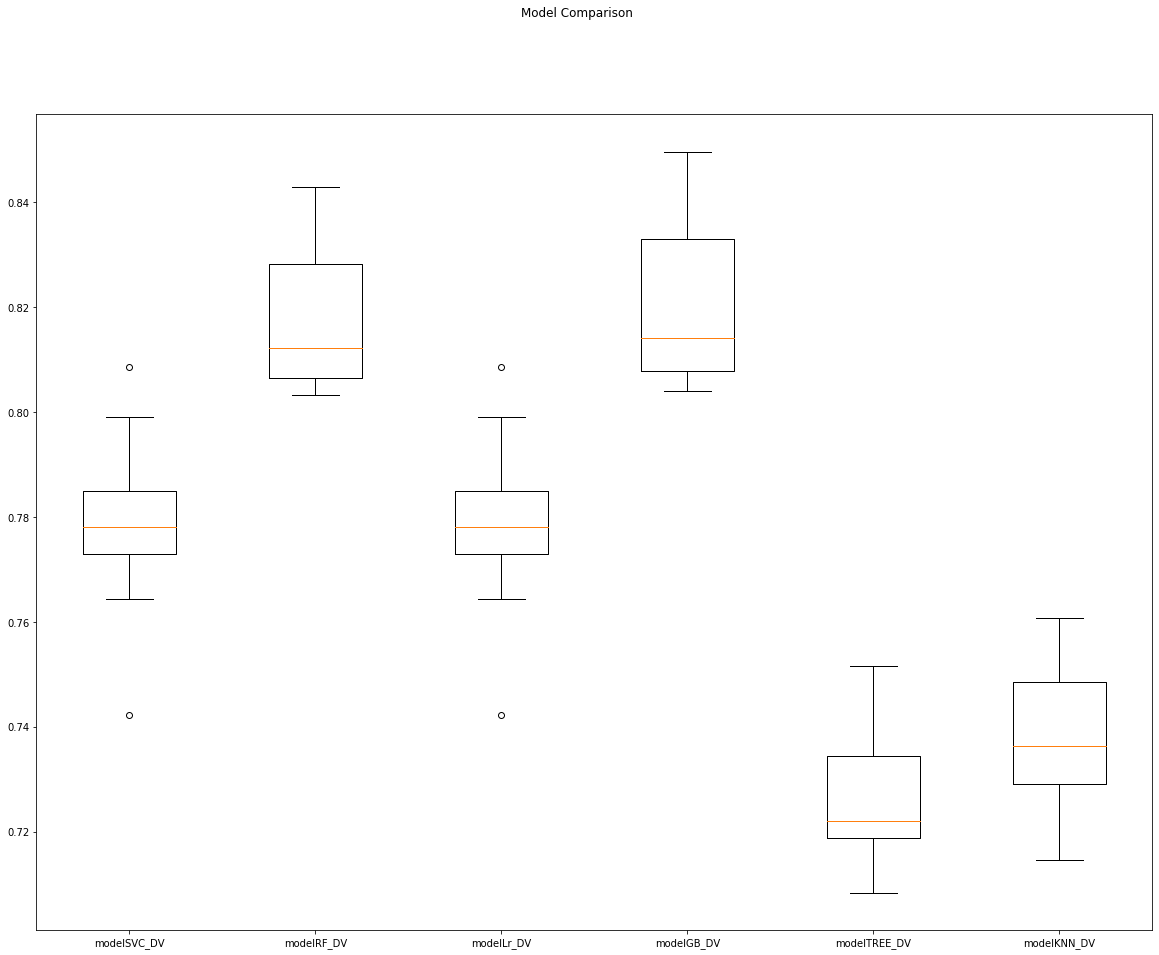

In [420]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_DV)
ax.set_xticklabels(model_names_DV)
plt.show()

In [ ]:
#### Top model is modelGB_DV

In [ ]:
####################################################################################
# Model development -- Dummy Variables Scaled
####################################################################################

In [421]:
#Models
modelSVC_DV_S = SVC(gamma = 'scale')
modelRF_DV_S = RandomForestClassifier(n_estimators = 100)
modelLR_DV_S = LinearRegression()
modelLr_DV_S = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_DV_S = GradientBoostingClassifier()
modelTREE_DV_S = tree.DecisionTreeClassifier()
modelKNN_DV_S = KNeighborsClassifier(n_neighbors=3)

In [422]:
#SVR
modelSVC_DV_S.fit(X_train_DV_S,y_train_DV_S)
print(cross_val_score(modelSVC_DV_S, X_train_DV_S, y_train_DV_S)) 
modelSVC_DV_S.score(X_train_DV_S,y_train_DV_S)

[0.81190476 0.81357143 0.82333333 0.82452381 0.815     ]


0.8226666666666667

In [423]:
#Random Forest
modelRF_DV_S.fit(X_train_DV_S,y_train_DV_S)
print(cross_val_score(modelRF_DV_S, X_train_DV_S, y_train_DV_S))
modelRF_DV_S.score(X_train_DV_S,y_train_DV_S)

[0.805      0.81333333 0.82119048 0.81857143 0.81333333]


0.9992380952380953

In [424]:
#Linear Regression
modelLR_DV_S.fit(X_train_DV_S,y_train_DV_S)
print(cross_val_score(modelLR_DV_S, X_train_DV_S, y_train_DV_S))
modelLR_DV_S.score(X_train_DV_S,y_train_DV_S)

[0.18675766 0.20102976 0.21638574 0.22647433 0.20072838]


0.21895297121906165

In [425]:
#Logistic Regression
modelLr_DV_S.fit(X_train_DV_S,y_train_DV_S)
print(cross_val_score(modelLr_DV_S, X_train_DV_S, y_train_DV_S))
modelLr_DV_S.score(X_train_DV_S,y_train_DV_S)

[0.815      0.81761905 0.82047619 0.825      0.81666667]


0.8210952380952381

In [426]:
#Gradient Boosting
modelGB_DV_S.fit(X_train_DV_S,y_train_DV_S)
print(cross_val_score(modelGB_DV_S, X_train_DV_S, y_train_DV_S))
modelGB_DV_S.score(X_train_DV_S,y_train_DV_S)

[0.81238095 0.81619048 0.81904762 0.82357143 0.81809524]


0.8266666666666667

In [427]:
#Decision Tree
modelTREE_DV_S.fit(X_train_DV_S,y_train_DV_S)
print(cross_val_score(modelTREE_DV_S, X_train_DV_S, y_train_DV_S)) 
modelTREE_DV_S.score(X_train_DV_S,y_train_DV_S)

[0.72619048 0.73190476 0.74214286 0.73857143 0.72928571]


0.9992857142857143

In [428]:
#KNN
modelKNN_DV_S.fit(X_train_DV_S,y_train_DV_S)
print(cross_val_score(modelKNN_DV_S, X_train_DV_S, y_train_DV_S)) 
modelKNN_DV_S.score(X_train_DV_S,y_train_DV_S)

[0.77642857 0.76952381 0.775      0.77904762 0.77357143]


0.8674761904761905

In [429]:
####################################################################################
# Evaluating the Results -- Dummy Variables Scaled Dataframe
####################################################################################

In [520]:
#SVC
predictions_DV_S_SVC = modelSVC_DV_S.predict(X_test_DV_S)
accy_DV_S_SVC = accuracy_score(y_test_DV_S,predictions_DV_S_SVC)
KAPPA_DV_S_SVC = cohen_kappa_score(y_test_DV_S, predictions_DV_S_SVC)
ROC_DV_S_SVC = roc_auc_score(y_test_OOB,predictions_DV_S_SVC)
prec_DV_S_SVC = precision_score(y_test_OOB, predictions_DV_S_SVC)
rec_DV_S_SVC = recall_score(y_test_OOB,predictions_DV_S_SVC)
f1_DV_S_SVC = f1_score(y_test_OOB,predictions_DV_S_SVC)

model =  pd.DataFrame([['SVC', 'DV_S', accy_DV_S_SVC, KAPPA_DV_S_SVC, ROC_DV_S_SVC, prec_DV_S_SVC, rec_DV_S_SVC, f1_DV_S_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
30,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
4,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
5,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
6,GB,DV,0.819556,0.367146,0.654313,0.648624,0.362936,0.465438
7,RF,DV,0.817667,0.370400,0.658123,0.632214,0.376797,0.472178
8,RF,OOB,0.816556,0.370126,0.658900,0.625105,0.380903,0.473365


In [521]:
#Random Forest
predictions_DV_S_RF = modelRF_DV_S.predict(X_test_DV_S)
accy_DV_S_RF = accuracy_score(y_test_DV_S,predictions_DV_S_RF)
KAPPA_DV_S_RF = cohen_kappa_score(y_test_DV_S, predictions_DV_S_RF)
ROC_DV_S_RF = roc_auc_score(y_test_OOB,predictions_DV_S_RF)
prec_DV_S_RF = precision_score(y_test_OOB, predictions_DV_S_RF)
rec_DV_S_RF = recall_score(y_test_OOB,predictions_DV_S_RF)
f1_DV_S_RF = f1_score(y_test_OOB,predictions_DV_S_RF)

model =  pd.DataFrame([['RF', 'DV_S', accy_DV_S_RF, KAPPA_DV_S_RF, ROC_DV_S_RF, prec_DV_S_RF, rec_DV_S_RF, f1_DV_S_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
5,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
6,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
7,GB,DV,0.819556,0.367146,0.654313,0.648624,0.362936,0.465438
8,RF,DV,0.817667,0.370400,0.658123,0.632214,0.376797,0.472178
31,RF,DV_S,0.817444,0.368258,0.656867,0.632493,0.373717,0.469829


In [522]:
#Logistic Regression
predictions_DV_S_Lr = modelLr_DV_S.predict(X_test_DV_S)
accy_DV_S_Lr = accuracy_score(y_test_DV_S,predictions_DV_S_Lr)
KAPPA_DV_S_Lr = cohen_kappa_score(y_test_DV_S, predictions_DV_S_Lr)
ROC_DV_S_Lr = roc_auc_score(y_test_OOB,predictions_DV_S_Lr)
prec_DV_S_Lr = precision_score(y_test_OOB, predictions_DV_S_Lr)
rec_DV_S_Lr = recall_score(y_test_OOB,predictions_DV_S_Lr)
f1_DV_S_Lr = f1_score(y_test_OOB,predictions_DV_S_Lr)

model =  pd.DataFrame([['Lr', 'DV_S', accy_DV_S_Lr, KAPPA_DV_S_Lr, ROC_DV_S_Lr, prec_DV_S_Lr, rec_DV_S_Lr, f1_DV_S_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
32,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
5,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
6,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
7,GB,DV,0.819556,0.367146,0.654313,0.648624,0.362936,0.465438
8,RF,DV,0.817667,0.370400,0.658123,0.632214,0.376797,0.472178


In [523]:
# Gradient Boosting
predictions_DV_S_GB = modelGB_DV_S.predict(X_test_DV_S)
accy_DV_S_GB = accuracy_score(y_test_DV_S,predictions_DV_S_GB)
KAPPA_DV_S_GB = cohen_kappa_score(y_test_DV_S, predictions_DV_S_GB)
ROC_DV_S_GB = roc_auc_score(y_test_OOB,predictions_DV_S_GB)
prec_DV_S_GB = precision_score(y_test_OOB, predictions_DV_S_GB)
rec_DV_S_GB = recall_score(y_test_OOB,predictions_DV_S_GB)
f1_DV_S_GB = f1_score(y_test_OOB,predictions_DV_S_GB)

model =  pd.DataFrame([['GB', 'DV_S', accy_DV_S_GB, KAPPA_DV_S_GB, ROC_DV_S_GB, prec_DV_S_GB, rec_DV_S_GB, f1_DV_S_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
5,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
6,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
7,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
8,GB,DV,0.819556,0.367146,0.654313,0.648624,0.362936,0.465438
33,GB,DV_S,0.819444,0.366896,0.654242,0.648029,0.362936,0.465285


In [524]:
# Decision Tree
predictions_DV_S_tree = modelTREE_DV_S.predict(X_test_DV_S)
accy_DV_S_tree = accuracy_score(y_test_DV_S,predictions_DV_S_tree)
KAPPA_DV_S_tree = cohen_kappa_score(y_test_DV_S, predictions_DV_S_tree)
ROC_DV_S_tree = roc_auc_score(y_test_OOB,predictions_DV_S_tree)
prec_DV_S_tree = precision_score(y_test_OOB, predictions_DV_S_tree)
rec_DV_S_tree = recall_score(y_test_OOB,predictions_DV_S_tree)
f1_DV_S_tree = f1_score(y_test_OOB,predictions_DV_S_tree)

model =  pd.DataFrame([['Tree', 'DV_S', accy_DV_S_tree, KAPPA_DV_S_tree, ROC_DV_S_tree, prec_DV_S_tree, rec_DV_S_tree, f1_DV_S_tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
5,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
6,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
7,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
8,GB,DV,0.819556,0.367146,0.654313,0.648624,0.362936,0.465438
9,GB,DV_S,0.819444,0.366896,0.654242,0.648029,0.362936,0.465285


In [525]:
#KNN
predictions_DV_S_KNN = modelKNN_DV_S.predict(X_test_DV_S)
accy_DV_S_KNN = accuracy_score(y_test_DV_S,predictions_DV_S_KNN)
KAPPA_DV_S_KNN = cohen_kappa_score(y_test_DV_S, predictions_DV_S_KNN)
ROC_DV_S_KNN = roc_auc_score(y_test_OOB,predictions_DV_S_KNN)
prec_DV_S_KNN = precision_score(y_test_OOB, predictions_DV_S_KNN)
rec_DV_S_KNN = recall_score(y_test_OOB,predictions_DV_S_KNN)
f1_DV_S_KNN = f1_score(y_test_OOB,predictions_DV_S_KNN)

model =  pd.DataFrame([['KNN', 'DV_S', accy_DV_S_KNN, KAPPA_DV_S_KNN, ROC_DV_S_KNN, prec_DV_S_KNN, rec_DV_S_KNN, f1_DV_S_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
5,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
6,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
7,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
8,GB,DV,0.819556,0.367146,0.654313,0.648624,0.362936,0.465438
9,GB,DV_S,0.819444,0.366896,0.654242,0.648029,0.362936,0.465285


In [450]:
outcome_DV_S = []
model_names_DV_S = []
models_DV_S = [('modelSVC_DV_S', SVC(gamma = 'scale')),
              ('modelRF_DV_S', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_DV_S', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_DV_S', GradientBoostingClassifier()),
              ('modelTREE_DV_S', tree.DecisionTreeClassifier()),
              ('modelKNN_DV_S', KNeighborsClassifier(n_neighbors=3))]

In [451]:
for model_name_DV_S, model_DV_S in models_DV_S:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_DV_S = model_selection.cross_val_score(model_DV_S, features_DV_S, depVar_DV_S, cv=k_fold_validation, scoring='accuracy')
    outcome_DV_S.append(results_DV_S)
    model_names_DV_S.append(model_name_DV_S)
    output_message_DV_S = "%s| Mean=%f STD=%f" % (model_name_DV_S, results_DV_S.mean(), results_DV_S.std())
    print(output_message_DV_S)

modelSVC_DV_S| Mean=0.819167 STD=0.013721
modelRF_DV_S| Mean=0.816200 STD=0.014123
modelLr_DV_S| Mean=0.820767 STD=0.014520
modelGB_DV_S| Mean=0.820600 STD=0.015119
modelTREE_DV_S| Mean=0.726633 STD=0.014661
modelKNN_DV_S| Mean=0.777333 STD=0.013848


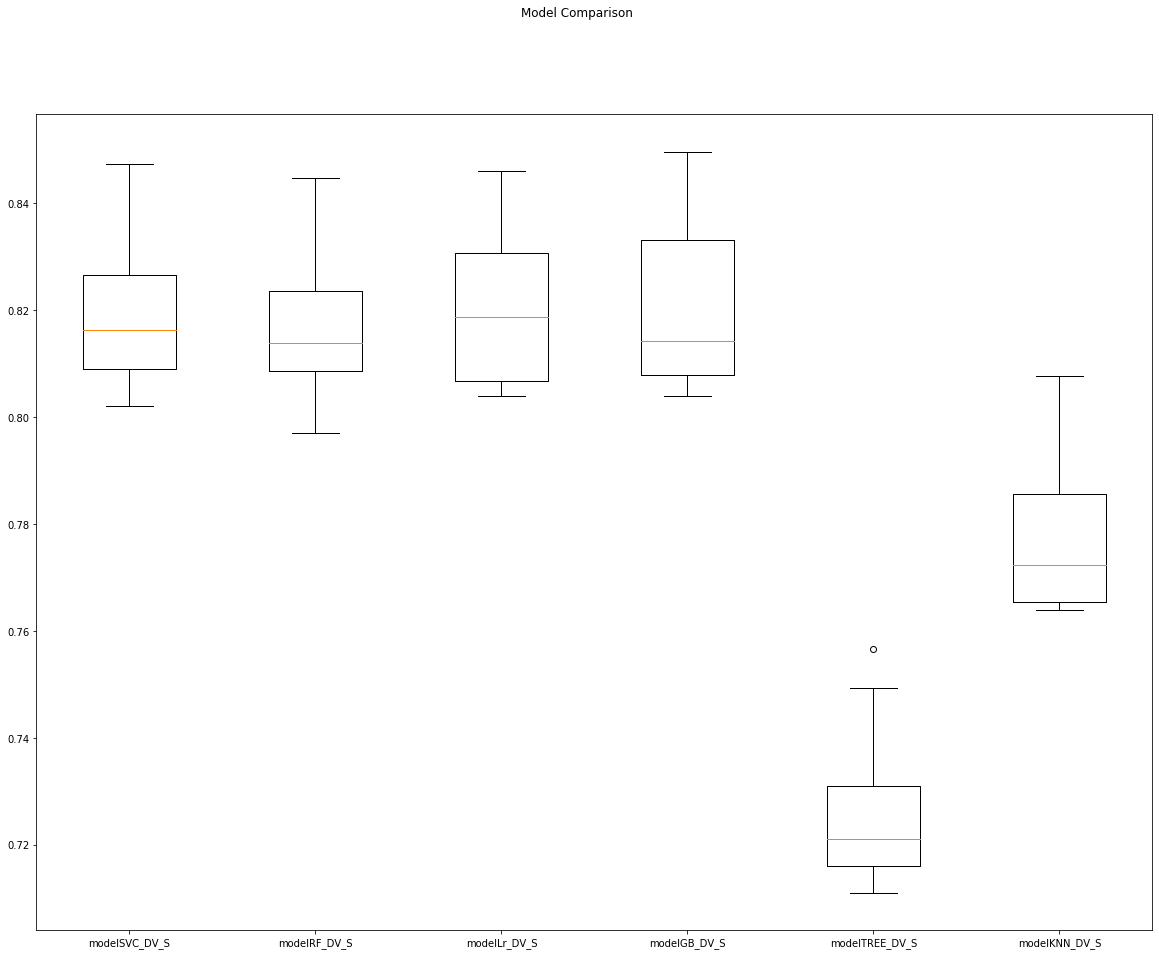

In [526]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_DV_S)
ax.set_xticklabels(model_names_DV_S)
plt.show()

In [ ]:
##### Top model is modelSVC_DV_S

In [ ]:
####################################################################################
# Model development -- Dummy Variables Feature Selection
####################################################################################

In [527]:
#Models
modelSVC_DV_FS = SVC(gamma = 'scale')
modelRF_DV_FS = RandomForestClassifier(n_estimators = 100)
modelLR_DV_FS = LinearRegression()
modelLr_DV_FS = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_DV_FS = GradientBoostingClassifier()
modelTREE_DV_FS = tree.DecisionTreeClassifier()
modelKNN_DV_FS = KNeighborsClassifier(n_neighbors=3)

In [528]:
#SVR
modelSVC_DV_FS.fit(X_train_DV_FS,y_train_DV_FS)
print(cross_val_score(modelSVC_DV_FS, X_train_DV_FS, y_train_DV_FS)) 
modelSVC_DV_FS.score(X_train_DV_FS,y_train_DV_FS)

[0.77690476 0.77690476 0.77666667 0.77666667 0.77666667]


0.7768095238095238

In [529]:
#Random Forest
modelRF_DV_FS.fit(X_train_DV_FS,y_train_DV_FS)
print(cross_val_score(modelRF_DV_FS, X_train_DV_FS, y_train_DV_FS))
modelRF_DV_FS.score(X_train_DV_FS,y_train_DV_FS)

[0.80928571 0.81238095 0.82       0.81642857 0.81642857]


0.9992857142857143

In [530]:
#Linear Regression
modelLR_DV_FS.fit(X_train_DV_FS,y_train_DV_FS)
print(cross_val_score(modelLR_DV_FS, X_train_DV_FS, y_train_DV_FS))
modelLR_DV_FS.score(X_train_DV_FS,y_train_DV_FS)

[0.18652613 0.20089832 0.22106267 0.22793751 0.20076023]


0.21878632764547468

In [531]:
#Logistic Regression
modelLr_DV_FS.fit(X_train_DV_FS,y_train_DV_FS)
print(cross_val_score(modelLr_DV_FS, X_train_DV_FS, y_train_DV_FS))
modelLr_DV_FS.score(X_train_DV_FS,y_train_DV_FS)

[0.77690476 0.77666667 0.77666667 0.77642857 0.77666667]


0.7767142857142857

In [532]:
#Gradient Boosting
modelGB_DV_FS.fit(X_train_DV_FS,y_train_DV_FS)
print(cross_val_score(modelGB_DV_FS, X_train_DV_FS, y_train_DV_FS))
modelGB_DV_FS.score(X_train_DV_FS,y_train_DV_FS)

[0.81380952 0.81690476 0.81928571 0.8252381  0.81785714]


0.8274761904761905

In [533]:
#Decision Tree
modelTREE_DV_FS.fit(X_train_DV_FS,y_train_DV_FS)
print(cross_val_score(modelTREE_DV_FS, X_train_DV_FS, y_train_DV_FS)) 
modelTREE_DV_FS.score(X_train_DV_FS,y_train_DV_FS)

[0.72404762 0.73071429 0.72857143 0.7202381  0.72952381]


0.9992857142857143

In [534]:
#KNN
modelKNN_DV_FS.fit(X_train_DV_FS,y_train_DV_FS)
print(cross_val_score(modelKNN_DV_FS, X_train_DV_FS, y_train_DV_FS)) 
modelKNN_DV_FS.score(X_train_DV_FS,y_train_DV_FS)

[0.73547619 0.73738095 0.7352381  0.73333333 0.72642857]


0.8458095238095238

In [535]:
####################################################################################
# Evaluating the Results -- Dummy Variables Feature Selection Dataframe
####################################################################################

In [538]:
#SVC
predictions_DV_FS_SVC = modelSVC_DV_FS.predict(X_test_DV_FS)
accy_DV_FS_SVC = accuracy_score(y_test_DV_FS,predictions_DV_FS_SVC)
KAPPA_DV_FS_SVC = cohen_kappa_score(y_test_DV_FS, predictions_DV_FS_SVC)
ROC_DV_FS_SVC = roc_auc_score(y_test_OOB,predictions_DV_FS_SVC)
prec_DV_FS_SVC = precision_score(y_test_OOB, predictions_DV_FS_SVC)
rec_DV_FS_SVC = recall_score(y_test_OOB,predictions_DV_FS_SVC)
f1_DV_FS_SVC = f1_score(y_test_OOB,predictions_DV_FS_SVC)

model =  pd.DataFrame([['SVC', 'DV_FS', accy_DV_FS_SVC, KAPPA_DV_FS_SVC, ROC_DV_FS_SVC, prec_DV_FS_SVC, rec_DV_FS_SVC, f1_DV_FS_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
5,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
6,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
7,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
8,GB,DV,0.819556,0.367146,0.654313,0.648624,0.362936,0.465438
9,GB,DV_S,0.819444,0.366896,0.654242,0.648029,0.362936,0.465285


In [539]:
#Random Forest
predictions_DV_FS_RF = modelRF_DV_FS.predict(X_test_DV_FS)
accy_DV_FS_RF = accuracy_score(y_test_DV_FS,predictions_DV_FS_RF)
KAPPA_DV_FS_RF = cohen_kappa_score(y_test_DV_FS, predictions_DV_FS_RF)
ROC_DV_FS_RF = roc_auc_score(y_test_OOB,predictions_DV_FS_RF)
prec_DV_FS_RF = precision_score(y_test_OOB, predictions_DV_FS_RF)
rec_DV_FS_RF = recall_score(y_test_OOB,predictions_DV_FS_RF)
f1_DV_FS_RF = f1_score(y_test_OOB,predictions_DV_FS_RF)

model =  pd.DataFrame([['RF', 'DV_FS', accy_DV_FS_RF, KAPPA_DV_FS_RF, ROC_DV_FS_RF, prec_DV_FS_RF, rec_DV_FS_RF, f1_DV_FS_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
5,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
6,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
7,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
8,GB,DV,0.819556,0.367146,0.654313,0.648624,0.362936,0.465438
9,GB,DV_S,0.819444,0.366896,0.654242,0.648029,0.362936,0.465285


In [540]:
#Logistic Regression
predictions_DV_FS_Lr = modelLr_DV_FS.predict(X_test_DV_FS)
accy_DV_FS_Lr = accuracy_score(y_test_DV_FS,predictions_DV_FS_Lr)
KAPPA_DV_FS_Lr = cohen_kappa_score(y_test_DV_FS, predictions_DV_FS_Lr)
ROC_DV_FS_Lr = roc_auc_score(y_test_OOB,predictions_DV_FS_Lr)
prec_DV_FS_Lr = precision_score(y_test_OOB, predictions_DV_FS_Lr)
rec_DV_FS_Lr = recall_score(y_test_OOB,predictions_DV_FS_Lr)
f1_DV_FS_Lr = f1_score(y_test_OOB,predictions_DV_FS_Lr)

model =  pd.DataFrame([['Lr', 'DV_FS', accy_DV_FS_Lr, KAPPA_DV_FS_Lr, ROC_DV_FS_Lr, prec_DV_FS_Lr, rec_DV_FS_Lr, f1_DV_FS_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
5,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
6,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
7,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
8,GB,DV,0.819556,0.367146,0.654313,0.648624,0.362936,0.465438
9,GB,DV_S,0.819444,0.366896,0.654242,0.648029,0.362936,0.465285


In [541]:
#Gradient Boosting
predictions_DV_FS_GB = modelGB_DV_FS.predict(X_test_DV_FS)
accy_DV_FS_GB = accuracy_score(y_test_DV_FS,predictions_DV_FS_GB)
KAPPA_DV_FS_GB = cohen_kappa_score(y_test_DV_FS, predictions_DV_FS_GB)
ROC_DV_FS_GB = roc_auc_score(y_test_OOB,predictions_DV_FS_GB)
prec_DV_FS_GB = precision_score(y_test_OOB, predictions_DV_FS_GB)
rec_DV_FS_GB = recall_score(y_test_OOB,predictions_DV_FS_GB)
f1_DV_FS_GB = f1_score(y_test_OOB,predictions_DV_FS_GB)

model =  pd.DataFrame([['GB', 'DV_FS', accy_DV_FS_GB, KAPPA_DV_FS_GB, ROC_DV_FS_GB, prec_DV_FS_GB, rec_DV_FS_GB, f1_DV_FS_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
39,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
4,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
5,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
6,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
7,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
8,GB,DV,0.819556,0.367146,0.654313,0.648624,0.362936,0.465438


In [542]:
#Decision Tree
predictions_DV_FS_tree = modelTREE_DV_FS.predict(X_test_DV_FS)
accy_DV_FS_tree = accuracy_score(y_test_DV_FS,predictions_DV_FS_tree)
KAPPA_DV_FS_tree = cohen_kappa_score(y_test_DV_FS, predictions_DV_FS_tree)
ROC_DV_FS_tree = roc_auc_score(y_test_OOB,predictions_DV_FS_tree)
prec_DV_FS_tree = precision_score(y_test_OOB, predictions_DV_FS_tree)
rec_DV_FS_tree = recall_score(y_test_OOB,predictions_DV_FS_tree)
f1_DV_FS_tree = f1_score(y_test_OOB,predictions_DV_FS_tree)

model =  pd.DataFrame([['Tree', 'DV_FS', accy_DV_FS_tree, KAPPA_DV_FS_tree, ROC_DV_FS_tree, prec_DV_FS_tree, rec_DV_FS_tree, f1_DV_FS_tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
5,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
6,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
7,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
8,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
9,GB,DV,0.819556,0.367146,0.654313,0.648624,0.362936,0.465438


In [543]:
#KNN
predictions_DV_FS_KNN = modelKNN_DV_FS.predict(X_test_DV_FS)
accy_DV_FS_KNN = accuracy_score(y_test_DV_FS,predictions_DV_FS_KNN)
KAPPA_DV_FS_KNN = cohen_kappa_score(y_test_DV_FS, predictions_DV_FS_KNN)
ROC_DV_FS_KNN = roc_auc_score(y_test_OOB,predictions_DV_FS_KNN)
prec_DV_FS_KNN = precision_score(y_test_OOB, predictions_DV_FS_KNN)
rec_DV_FS_KNN = recall_score(y_test_OOB,predictions_DV_FS_KNN)
f1_DV_FS_KNN = f1_score(y_test_OOB,predictions_DV_FS_KNN)

model =  pd.DataFrame([['KNN', 'DV_FS', accy_DV_FS_KNN, KAPPA_DV_FS_KNN, ROC_DV_FS_KNN, prec_DV_FS_KNN, rec_DV_FS_KNN, f1_DV_FS_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
5,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
6,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
7,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
8,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351
9,GB,DV,0.819556,0.367146,0.654313,0.648624,0.362936,0.465438


In [544]:
outcome_DV_FS = []
model_names_DV_FS = []
models_DV_FS = [('modelSVC_DV_FS', SVC(gamma = 'scale')),
              ('modelRF_DV_FS', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_DV_FS', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_DV_FS', GradientBoostingClassifier()),
              ('modelTREE_DV_FS', tree.DecisionTreeClassifier()),
              ('modelKNN_DV_FS', KNeighborsClassifier(n_neighbors=3))]

In [545]:
for model_name_DV_FS, model_DV_FS in models_DV_FS:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_DV_FS = model_selection.cross_val_score(model_DV_FS, features_DV_FS, depVar_DV_FS, cv=k_fold_validation, scoring='accuracy')
    outcome_DV_FS.append(results_DV_FS)
    model_names_DV_FS.append(model_name_DV_FS)
    output_message_DV_FS = "%s| Mean=%f STD=%f" % (model_name_DV_FS, results_DV_FS.mean(), results_DV_FS.std())
    print(output_message_DV_FS)

modelSVC_DV_FS| Mean=0.778800 STD=0.017234
modelRF_DV_FS| Mean=0.815733 STD=0.013617
modelLr_DV_FS| Mean=0.778733 STD=0.017159
modelGB_DV_FS| Mean=0.820600 STD=0.015097
modelTREE_DV_FS| Mean=0.728233 STD=0.011021
modelKNN_DV_FS| Mean=0.739067 STD=0.014470


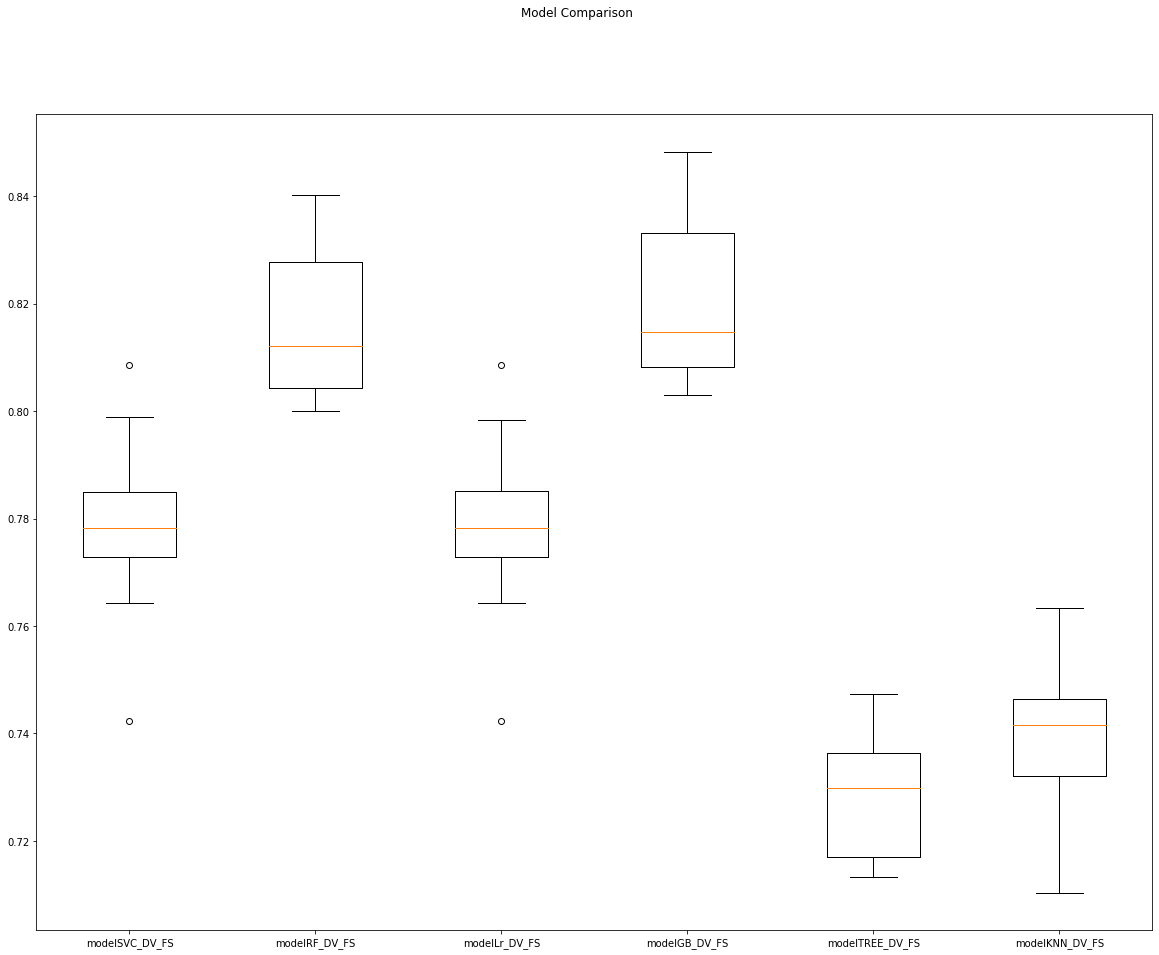

In [546]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_DV_FS)
ax.set_xticklabels(model_names_DV_FS)
plt.show()

In [ ]:
#### Top model for DV_FS is modelGB_DV_FS

In [ ]:
####################################################################################
# Model development -- Dummy Variables Feature Selection Scaled
####################################################################################

In [547]:
#Models
modelSVC_DV_FS_S = SVC(gamma = 'scale')
modelRF_DV_FS_S = RandomForestClassifier(n_estimators = 100)
modelLR_DV_FS_S = LinearRegression()
modelLr_DV_FS_S = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_DV_FS_S = GradientBoostingClassifier()
modelTREE_DV_FS_S = tree.DecisionTreeClassifier()
modelKNN_DV_FS_S = KNeighborsClassifier(n_neighbors=3)

In [548]:
#SVR
modelSVC_DV_FS_S.fit(X_train_DV_FS_S,y_train_DV_FS_S)
print(cross_val_score(modelSVC_DV_FS_S, X_train_DV_FS_S, y_train_DV_FS_S)) 
modelSVC_DV_FS_S.score(X_train_DV_FS_S,y_train_DV_FS_S)

[0.81238095 0.81380952 0.82380952 0.8247619  0.81595238]


0.8234761904761905

In [549]:
#Random Forest
modelRF_DV_FS_S.fit(X_train_DV_FS_S,y_train_DV_FS_S)
print(cross_val_score(modelRF_DV_FS_S, X_train_DV_FS_S, y_train_DV_FS_S))
modelRF_DV_FS_S.score(X_train_DV_FS_S,y_train_DV_FS_S)

[0.80928571 0.81357143 0.81761905 0.8197619  0.8152381 ]


0.9992857142857143

In [550]:
#Linear Regression
modelLR_DV_FS_S.fit(X_train_DV_FS_S,y_train_DV_FS_S)
print(cross_val_score(modelLR_DV_FS_S, X_train_DV_FS_S, y_train_DV_FS_S))
modelLR_DV_FS_S.score(X_train_DV_FS_S,y_train_DV_FS_S)

[0.18652613 0.20089832 0.22106267 0.22793751 0.20076023]


0.21878632764547457

In [551]:
#Logistic Regression
modelLr_DV_FS_S.fit(X_train_DV_FS_S,y_train_DV_FS_S)
print(cross_val_score(modelLr_DV_FS_S, X_train_DV_FS_S, y_train_DV_FS_S))
modelLr_DV_FS_S.score(X_train_DV_FS_S,y_train_DV_FS_S)

[0.81571429 0.81785714 0.82047619 0.8247619  0.81714286]


0.8211904761904761

In [552]:
#Gradient Boosting
modelGB_DV_FS_S.fit(X_train_DV_FS_S,y_train_DV_FS_S)
print(cross_val_score(modelGB_DV_FS_S, X_train_DV_FS_S, y_train_DV_FS_S))
modelGB_DV_FS_S.score(X_train_DV_FS_S,y_train_DV_FS_S)

[0.81380952 0.81690476 0.81952381 0.8252381  0.81785714]


0.8274761904761905

In [553]:
#Decision Tree
modelTREE_DV_FS_S.fit(X_train_DV_FS_S,y_train_DV_FS_S)
print(cross_val_score(modelTREE_DV_FS_S, X_train_DV_FS_S, y_train_DV_FS_S)) 
modelTREE_DV_FS_S.score(X_train_DV_FS_S,y_train_DV_FS_S)

[0.72142857 0.73       0.72690476 0.71761905 0.7297619 ]


0.9992857142857143

In [554]:
#KNN
modelKNN_DV_FS_S.fit(X_train_DV_FS_S,y_train_DV_FS_S)
print(cross_val_score(modelKNN_DV_FS_S, X_train_DV_FS_S, y_train_DV_FS_S)) 
modelKNN_DV_FS_S.score(X_train_DV_FS_S,y_train_DV_FS_S)

[0.77428571 0.76809524 0.77928571 0.77785714 0.77309524]


0.867904761904762

In [555]:
####################################################################################
# Evaluating the Results -- Dummy Variables Feature Selection Scaled Dataframe
####################################################################################

In [556]:
#SVC
predictions_DV_FS_S_SVC = modelSVC_DV_FS_S.predict(X_test_DV_FS_S)
accy_DV_FS_S_SVC = accuracy_score(y_test_DV_FS_S,predictions_DV_FS_S_SVC)
KAPPA_DV_FS_S_SVC = cohen_kappa_score(y_test_DV_FS_S, predictions_DV_FS_S_SVC)
ROC_DV_FS_S_SVC = roc_auc_score(y_test_OOB,predictions_DV_FS_S_SVC)
prec_DV_FS_S_SVC = precision_score(y_test_OOB, predictions_DV_FS_S_SVC)
rec_DV_FS_S_SVC = recall_score(y_test_OOB,predictions_DV_FS_S_SVC)
f1_DV_FS_S_SVC = f1_score(y_test_OOB,predictions_DV_FS_S_SVC)

model =  pd.DataFrame([['SVC', 'DV_S_FS', accy_DV_FS_S_SVC, KAPPA_DV_FS_S_SVC, ROC_DV_FS_S_SVC, prec_DV_FS_S_SVC, rec_DV_FS_S_SVC, f1_DV_FS_S_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
42,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
5,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
6,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
7,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
8,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351


In [557]:
#Random Forest
predictions_DV_FS_S_RF = modelRF_DV_FS_S.predict(X_test_DV_FS_S)
accy_DV_FS_S_RF = accuracy_score(y_test_DV_FS_S,predictions_DV_FS_S_RF)
KAPPA_DV_FS_S_RF = cohen_kappa_score(y_test_DV_FS_S, predictions_DV_FS_S_RF)
ROC_DV_FS_S_RF = roc_auc_score(y_test_OOB,predictions_DV_FS_S_RF)
prec_DV_FS_S_RF = precision_score(y_test_OOB, predictions_DV_FS_S_RF)
rec_DV_FS_S_RF = recall_score(y_test_OOB,predictions_DV_FS_S_RF)
f1_DV_FS_S_RF = f1_score(y_test_OOB,predictions_DV_FS_S_RF)

model =  pd.DataFrame([['RF', 'DV_S_FS', accy_DV_FS_S_RF, KAPPA_DV_FS_S_RF, ROC_DV_FS_S_RF, prec_DV_FS_S_RF, rec_DV_FS_S_RF, f1_DV_FS_S_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
5,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
6,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
7,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
8,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913
9,SVC,OOB_S,0.819667,0.357742,0.648067,0.659158,0.345483,0.453351


In [558]:
#Logistic Regression
predictions_DV_FS_S_Lr = modelLr_DV_FS_S.predict(X_test_DV_FS_S)
accy_DV_FS_S_Lr = accuracy_score(y_test_DV_FS_S,predictions_DV_FS_S_Lr)
KAPPA_DV_FS_S_Lr = cohen_kappa_score(y_test_DV_FS_S, predictions_DV_FS_S_Lr)
ROC_DV_FS_S_Lr = roc_auc_score(y_test_OOB,predictions_DV_FS_S_Lr)
prec_DV_FS_S_Lr = precision_score(y_test_OOB, predictions_DV_FS_S_Lr)
rec_DV_FS_S_Lr = recall_score(y_test_OOB,predictions_DV_FS_S_Lr)
f1_DV_FS_S_Lr = f1_score(y_test_OOB,predictions_DV_FS_S_Lr)

model =  pd.DataFrame([['Lr', 'DV_S_FS', accy_DV_FS_S_Lr, KAPPA_DV_FS_S_Lr, ROC_DV_FS_S_Lr, prec_DV_FS_S_Lr, rec_DV_FS_S_Lr, f1_DV_FS_S_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
5,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
6,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
7,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
44,Lr,DV_S_FS,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
8,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913


In [559]:
#Gradient Boosting
predictions_DV_FS_S_GB = modelGB_DV_FS_S.predict(X_test_DV_FS_S)
accy_DV_FS_S_GB = accuracy_score(y_test_DV_FS_S,predictions_DV_FS_S_GB)
KAPPA_DV_FS_S_GB = cohen_kappa_score(y_test_DV_FS_S, predictions_DV_FS_S_GB)
ROC_DV_FS_S_GB = roc_auc_score(y_test_OOB,predictions_DV_FS_S_GB)
prec_DV_FS_S_GB = precision_score(y_test_OOB, predictions_DV_FS_S_GB)
rec_DV_FS_S_GB = recall_score(y_test_OOB,predictions_DV_FS_S_GB)
f1_DV_FS_S_GB = f1_score(y_test_OOB,predictions_DV_FS_S_GB)

model =  pd.DataFrame([['GB', 'DV_S_FS', accy_DV_FS_S_GB, KAPPA_DV_FS_S_GB, ROC_DV_FS_S_GB, prec_DV_FS_S_GB, rec_DV_FS_S_GB, f1_DV_FS_S_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
45,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
5,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
6,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
7,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
8,Lr,DV_S_FS,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717


In [560]:
#Decision Tree
predictions_DV_FS_S_tree = modelTREE_DV_FS_S.predict(X_test_DV_FS_S)
accy_DV_FS_S_tree = accuracy_score(y_test_DV_FS_S,predictions_DV_FS_S_tree)
KAPPA_DV_FS_S_tree = cohen_kappa_score(y_test_DV_FS_S, predictions_DV_FS_S_tree)
ROC_DV_FS_S_tree = roc_auc_score(y_test_OOB,predictions_DV_FS_S_tree)
prec_DV_FS_S_tree = precision_score(y_test_OOB, predictions_DV_FS_S_tree)
rec_DV_FS_S_tree = recall_score(y_test_OOB,predictions_DV_FS_S_tree)
f1_DV_FS_S_tree = f1_score(y_test_OOB,predictions_DV_FS_S_tree)

model =  pd.DataFrame([['Tree', 'DV_S_FS', accy_DV_FS_S_tree, KAPPA_DV_FS_S_tree, ROC_DV_FS_S_tree, prec_DV_FS_S_tree, rec_DV_FS_S_tree, f1_DV_FS_S_tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
5,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
6,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
7,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
8,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
9,Lr,DV_S_FS,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717


In [561]:
#KNN
predictions_DV_FS_S_KNN = modelKNN_DV_FS_S.predict(X_test_DV_FS_S)
accy_DV_FS_S_KNN = accuracy_score(y_test_DV_FS_S,predictions_DV_FS_S_KNN)
KAPPA_DV_FS_S_KNN = cohen_kappa_score(y_test_DV_FS_S, predictions_DV_FS_S_KNN)
ROC_DV_FS_S_KNN = roc_auc_score(y_test_OOB,predictions_DV_FS_S_KNN)
prec_DV_FS_S_KNN = precision_score(y_test_OOB, predictions_DV_FS_S_KNN)
rec_DV_FS_S_KNN = recall_score(y_test_OOB,predictions_DV_FS_S_KNN)
f1_DV_FS_S_KNN = f1_score(y_test_OOB,predictions_DV_FS_S_KNN)

model =  pd.DataFrame([['KNN', 'DV_S_FS', accy_DV_FS_S_KNN, KAPPA_DV_FS_S_KNN, ROC_DV_FS_S_KNN, prec_DV_FS_S_KNN, rec_DV_FS_S_KNN, f1_DV_FS_S_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
5,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
6,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
7,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
8,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
9,Lr,DV_S_FS,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717


In [562]:
outcome_DV_FS_S = []
model_names_DV_FS_S = []
models_DV_FS_S = [('modelSVC_DV_FS_S', SVC(gamma = 'scale')),
              ('modelRF_DV_FS_S', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_DV_FS_S', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_DV_FS_S', GradientBoostingClassifier()),
              ('modelTREE_DV_FS_S', tree.DecisionTreeClassifier()),
              ('modelKNN_DV_FS_S', KNeighborsClassifier(n_neighbors=3))]

In [563]:
for model_name_DV_FS_S, model_DV_FS_S in models_DV_FS_S:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_DV_FS_S = model_selection.cross_val_score(model_DV_FS_S, features_DV_FS_S, depVar_DV_FS_S, cv=k_fold_validation, scoring='accuracy')
    outcome_DV_FS_S.append(results_DV_FS_S)
    model_names_DV_FS_S.append(model_name_DV_FS_S)
    output_message_DV_FS_S = "%s| Mean=%f STD=%f" % (model_name_DV_FS_S, results_DV_FS_S.mean(), results_DV_FS_S.std())
    print(output_message_DV_FS_S)

modelSVC_DV_FS_S| Mean=0.818833 STD=0.013911
modelRF_DV_FS_S| Mean=0.815800 STD=0.013678
modelLr_DV_FS_S| Mean=0.820967 STD=0.014504
modelGB_DV_FS_S| Mean=0.820533 STD=0.015117
modelTREE_DV_FS_S| Mean=0.725967 STD=0.011725
modelKNN_DV_FS_S| Mean=0.778133 STD=0.013374


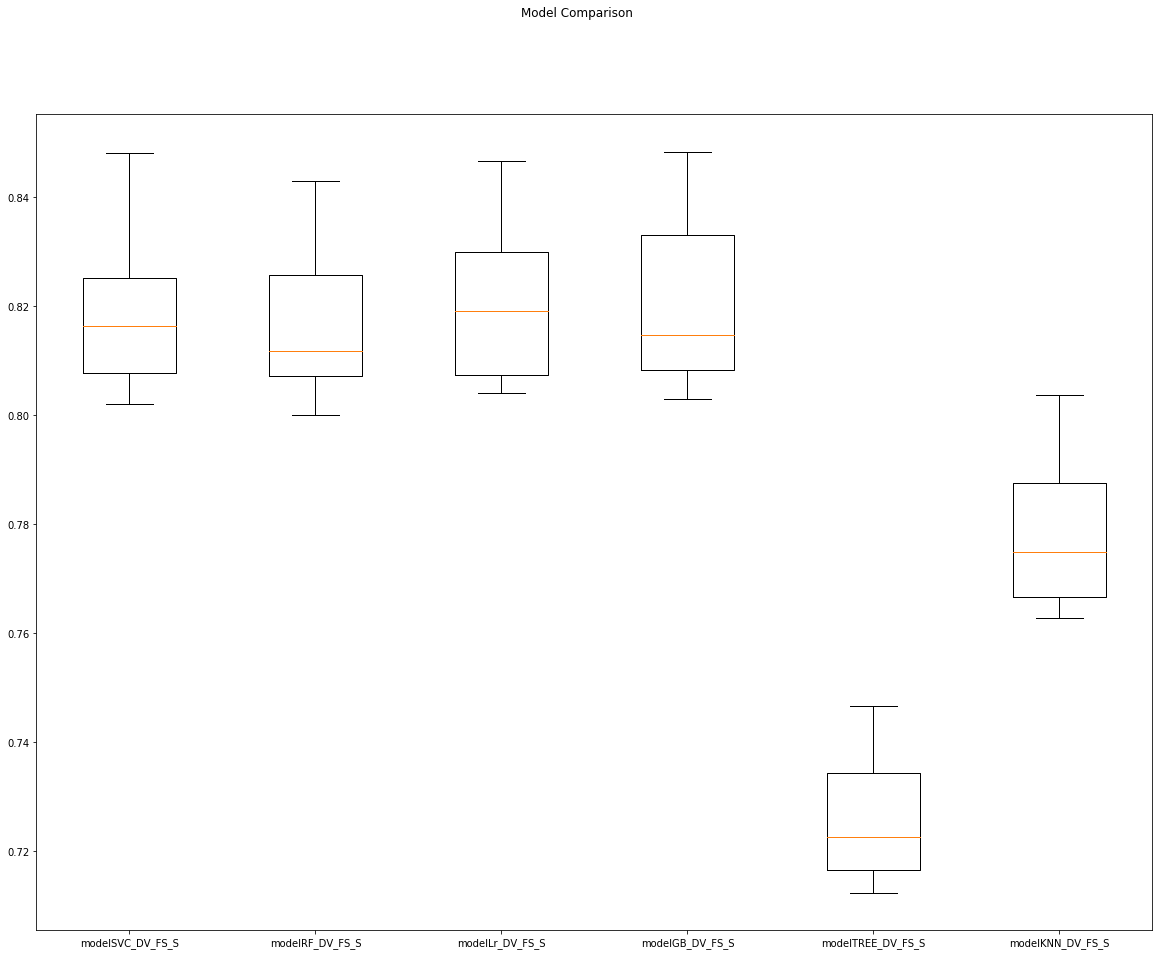

In [564]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_DV_FS_S)
ax.set_xticklabels(model_names_DV_FS_S)
plt.show()

In [ ]:
### Top model is modelGB_DV_FS_S

In [ ]:
####################################################################################
# Model development -- OOB RFE
####################################################################################

In [611]:
#Models
modelSVC_OOB_RFE = SVC(gamma = 'scale')
modelRF_OOB_RFE = RandomForestClassifier(n_estimators = 100)
modelLR_OOB_RFE = LinearRegression()
modelLr_OOB_RFE = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_OOB_RFE = GradientBoostingClassifier()
modelTREE_OOB_RFE = tree.DecisionTreeClassifier()
modelKNN_OOB_RFE = KNeighborsClassifier(n_neighbors=3)

In [612]:
#SVR
modelSVC_OOB_RFE.fit(X_train_OOB_RFE,y_train_OOB_RFE)
print(cross_val_score(modelSVC_OOB_RFE, X_train_OOB_RFE, y_train_OOB_RFE)) 
modelSVC_OOB_RFE.score(X_train_OOB_RFE,y_train_OOB_RFE)

[0.77690476 0.77690476 0.77666667 0.77666667 0.77666667]


0.7767619047619048

In [613]:
#Random Forest
modelRF_OOB_RFE.fit(X_train_OOB_RFE,y_train_OOB_RFE)
print(cross_val_score(modelRF_OOB_RFE, X_train_OOB_RFE, y_train_OOB_RFE))
modelRF_OOB_RFE.score(X_train_OOB_RFE,y_train_OOB_RFE)

[0.80166667 0.80952381 0.81142857 0.81357143 0.80833333]


0.9882857142857143

In [614]:
#Linear Regression
modelLR_OOB_RFE.fit(X_train_OOB_RFE,y_train_OOB_RFE)
print(cross_val_score(modelLR_OOB_RFE, X_train_OOB_RFE, y_train_OOB_RFE))
modelLR_OOB_RFE.score(X_train_OOB_RFE,y_train_OOB_RFE)

[0.10691735 0.11602757 0.12788786 0.1331549  0.11899215]


0.12180443452463419

In [615]:
#Logistic Regression
modelLr_OOB_RFE.fit(X_train_OOB_RFE,y_train_OOB_RFE)
print(cross_val_score(modelLr_OOB_RFE, X_train_OOB_RFE, y_train_OOB_RFE))
modelLr_OOB_RFE.score(X_train_OOB_RFE,y_train_OOB_RFE)

[0.77690476 0.77690476 0.77666667 0.77666667 0.77666667]


0.7767619047619048

In [616]:
#Gradient Boosting
modelGB_OOB_RFE.fit(X_train_OOB_RFE,y_train_OOB_RFE)
print(cross_val_score(modelGB_OOB_RFE, X_train_OOB_RFE, y_train_OOB_RFE))
modelGB_OOB_RFE.score(X_train_OOB_RFE,y_train_OOB_RFE)

[0.81428571 0.81547619 0.82190476 0.82714286 0.82095238]


0.8249047619047619

In [617]:
#Decision Tree
modelTREE_OOB_RFE.fit(X_train_OOB_RFE,y_train_OOB_RFE)
print(cross_val_score(modelTREE_OOB_RFE, X_train_OOB_RFE, y_train_OOB_RFE)) 
modelTREE_OOB_RFE.score(X_train_OOB_RFE,y_train_OOB_RFE)

[0.73166667 0.73761905 0.72690476 0.73261905 0.72952381]


0.9883333333333333

In [618]:
#KNN
modelKNN_OOB_RFE.fit(X_train_OOB_RFE,y_train_OOB_RFE)
print(cross_val_score(modelKNN_OOB_RFE, X_train_OOB_RFE, y_train_OOB_RFE)) 
modelKNN_OOB_RFE.score(X_train_OOB_RFE,y_train_OOB_RFE)

[0.73357143 0.73261905 0.73738095 0.7347619  0.73      ]


0.8392380952380952

In [555]:
####################################################################################
# Evaluating the Results -- OOB RFE
####################################################################################

In [619]:
#SVC
predictions_OOB_RFE_SVC = modelSVC_OOB_RFE.predict(X_test_OOB_RFE)
accy_OOB_RFE_SVC = accuracy_score(y_test_OOB_RFE,predictions_OOB_RFE_SVC)
KAPPA_OOB_RFE_SVC = cohen_kappa_score(y_test_OOB_RFE, predictions_OOB_RFE_SVC)
ROC_OOB_RFE_SVC = roc_auc_score(y_test_OOB,predictions_OOB_RFE_SVC)
prec_OOB_RFE_SVC = precision_score(y_test_OOB, predictions_OOB_RFE_SVC)
rec_OOB_RFE_SVC = recall_score(y_test_OOB,predictions_OOB_RFE_SVC)
f1_OOB_RFE_SVC = f1_score(y_test_OOB,predictions_OOB_RFE_SVC)

model =  pd.DataFrame([['SVC', 'OOB_RFE', accy_OOB_RFE_SVC, KAPPA_OOB_RFE_SVC, ROC_OOB_RFE_SVC, prec_OOB_RFE_SVC, rec_OOB_RFE_SVC, f1_OOB_RFE_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
5,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
6,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
7,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
8,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
9,Lr,DV_S_FS,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717


In [620]:
#Random Forest
predictions_OOB_RFE_RF = modelRF_OOB_RFE.predict(X_test_OOB_RFE)
accy_OOB_RFE_RF = accuracy_score(y_test_OOB_RFE,predictions_OOB_RFE_RF)
KAPPA_OOB_RFE_RF = cohen_kappa_score(y_test_OOB_RFE, predictions_OOB_RFE_RF)
ROC_OOB_RFE_RF = roc_auc_score(y_test_OOB,predictions_OOB_RFE_RF)
prec_OOB_RFE_RF = precision_score(y_test_OOB, predictions_OOB_RFE_RF)
rec_OOB_RFE_RF = recall_score(y_test_OOB,predictions_OOB_RFE_RF)
f1_OOB_RFE_RF = f1_score(y_test_OOB,predictions_OOB_RFE_RF)

model =  pd.DataFrame([['RF', 'OOB_RFE', accy_OOB_RFE_RF, KAPPA_OOB_RFE_RF, ROC_OOB_RFE_RF, prec_OOB_RFE_RF, rec_OOB_RFE_RF, f1_OOB_RFE_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
5,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
6,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
7,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
8,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
9,Lr,DV_S_FS,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717


In [558]:
#Logistic Regression
predictions_OOB_RFE_Lr = modelLr_OOB_RFE.predict(X_test_OOB_RFE)
accy_OOB_RFE_Lr = accuracy_score(y_test_OOB_RFE,predictions_OOB_RFE_Lr)
KAPPA_OOB_RFE_Lr = cohen_kappa_score(y_test_OOB_RFE, predictions_OOB_RFE_Lr)
ROC_OOB_RFE_Lr = roc_auc_score(y_test_OOB,predictions_OOB_RFE_Lr)
prec_OOB_RFE_Lr = precision_score(y_test_OOB, predictions_OOB_RFE_Lr)
rec_OOB_RFE_Lr = recall_score(y_test_OOB,predictions_OOB_RFE_Lr)
f1_OOB_RFE_Lr = f1_score(y_test_OOB,predictions_OOB_RFE_Lr)

model =  pd.DataFrame([['Lr', 'OOB_RFE', accy_OOB_RFE_Lr, KAPPA_OOB_RFE_Lr, ROC_OOB_RFE_Lr, prec_OOB_RFE_Lr, rec_OOB_RFE_Lr, f1_OOB_RFE_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
5,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
6,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
7,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
44,Lr,DV_S_FS,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717
8,SVC,OOB_FS_S,0.820000,0.359360,0.648837,0.660156,0.347023,0.454913


In [621]:
#Gradient Boosting
predictions_OOB_RFE_GB = modelGB_OOB_RFE.predict(X_test_OOB_RFE)
accy_OOB_RFE_GB = accuracy_score(y_test_OOB_RFE,predictions_OOB_RFE_GB)
KAPPA_OOB_RFE_GB = cohen_kappa_score(y_test_OOB_RFE, predictions_OOB_RFE_GB)
ROC_OOB_RFE_GB = roc_auc_score(y_test_OOB,predictions_OOB_RFE_GB)
prec_OOB_RFE_GB = precision_score(y_test_OOB, predictions_OOB_RFE_GB)
rec_OOB_RFE_GB = recall_score(y_test_OOB,predictions_OOB_RFE_GB)
f1_OOB_RFE_GB = f1_score(y_test_OOB,predictions_OOB_RFE_GB)

model =  pd.DataFrame([['GB', 'OOB_RFE', accy_OOB_RFE_GB, KAPPA_OOB_RFE_GB, ROC_OOB_RFE_GB, prec_OOB_RFE_GB, rec_OOB_RFE_GB, f1_OOB_RFE_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
50,GB,OOB_RFE,0.821222,0.376984,0.659463,0.651475,0.374230,0.475383
4,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
5,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
6,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
7,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
8,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717


In [623]:
#Decision Tree
predictions_OOB_RFE_tree = modelTREE_OOB_RFE.predict(X_test_OOB_RFE)
accy_OOB_RFE_tree = accuracy_score(y_test_OOB_RFE,predictions_OOB_RFE_tree)
KAPPA_OOB_RFE_tree = cohen_kappa_score(y_test_OOB_RFE, predictions_OOB_RFE_tree)
ROC_OOB_RFE_tree = roc_auc_score(y_test_OOB,predictions_OOB_RFE_tree)
prec_OOB_RFE_tree = precision_score(y_test_OOB, predictions_OOB_RFE_tree)
rec_OOB_RFE_tree = recall_score(y_test_OOB,predictions_OOB_RFE_tree)
f1_OOB_RFE_tree = f1_score(y_test_OOB,predictions_OOB_RFE_tree)

model =  pd.DataFrame([['Tree', 'OOB_RFE', accy_OOB_RFE_tree, KAPPA_OOB_RFE_tree, ROC_OOB_RFE_tree, prec_OOB_RFE_tree, rec_OOB_RFE_tree, f1_OOB_RFE_tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE,0.821222,0.376984,0.659463,0.651475,0.374230,0.475383
5,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
6,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
7,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
8,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
9,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717


In [622]:
#KNN
predictions_OOB_RFE_KNN = modelKNN_OOB_RFE.predict(X_test_OOB_RFE)
accy_OOB_RFE_KNN = accuracy_score(y_test_OOB_RFE,predictions_OOB_RFE_KNN)
KAPPA_OOB_RFE_KNN = cohen_kappa_score(y_test_OOB_RFE, predictions_OOB_RFE_KNN)
ROC_OOB_RFE_KNN = roc_auc_score(y_test_OOB,predictions_OOB_RFE_KNN)
prec_OOB_RFE_KNN = precision_score(y_test_OOB, predictions_OOB_RFE_KNN)
rec_OOB_RFE_KNN = recall_score(y_test_OOB,predictions_OOB_RFE_KNN)
f1_OOB_RFE_KNN = f1_score(y_test_OOB,predictions_OOB_RFE_KNN)

model =  pd.DataFrame([['KNN', 'OOB_RFE', accy_OOB_RFE_KNN, KAPPA_OOB_RFE_KNN, ROC_OOB_RFE_KNN, prec_OOB_RFE_KNN, rec_OOB_RFE_KNN, f1_OOB_RFE_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE,0.821222,0.376984,0.659463,0.651475,0.374230,0.475383
5,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
6,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
7,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
8,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151
9,Lr,DV_S,0.820778,0.368782,0.654350,0.656396,0.360883,0.465717


In [624]:
outcome_OOB_RFE = []
model_names_OOB_RFE = []
models_OOB_RFE = [('modelSVC_OOB_RFE', SVC(gamma = 'scale')),
              ('modelRF_OOB_RFE', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_OOB_RFE', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_OOB_RFE', GradientBoostingClassifier()),
              ('modelTREE_OOB_RFE', tree.DecisionTreeClassifier()),
              ('modelKNN_OOB_RFE', KNeighborsClassifier(n_neighbors=3))]

In [625]:
for model_name_OOB_RFE, model_OOB_RFE in models_OOB_RFE:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_OOB_RFE = model_selection.cross_val_score(model_OOB_RFE, features_OOB_RFE, depVar_OOB_RFE, cv=k_fold_validation, scoring='accuracy')
    outcome_OOB_RFE.append(results_OOB_RFE)
    model_names_OOB_RFE.append(model_name_OOB_RFE)
    output_message_OOB_RFE = "%s| Mean=%f STD=%f" % (model_name_OOB_RFE, results_OOB_RFE.mean(), results_OOB_RFE.std())
    print(output_message_OOB_RFE)

modelSVC_OOB_RFE| Mean=0.778800 STD=0.017234
modelRF_OOB_RFE| Mean=0.808733 STD=0.014601
modelLr_OOB_RFE| Mean=0.780867 STD=0.017532
modelGB_OOB_RFE| Mean=0.821367 STD=0.013787
modelTREE_OOB_RFE| Mean=0.727400 STD=0.018429
modelKNN_OOB_RFE| Mean=0.735833 STD=0.015771


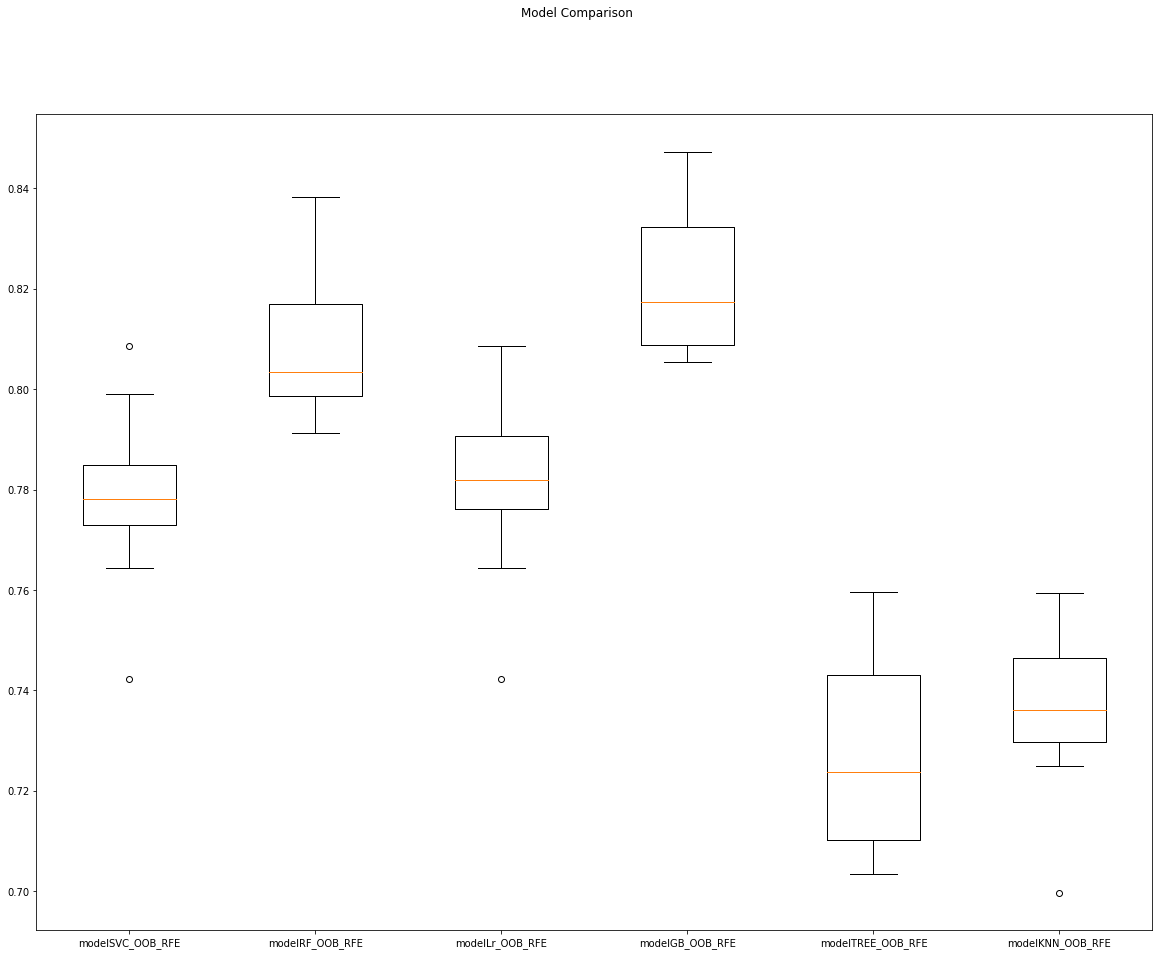

In [626]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_OOB_RFE)
ax.set_xticklabels(model_names_OOB_RFE)
plt.show()

In [ ]:
# Top Model overall is modelGB_OOB_RFE

In [ ]:
####################################################################################
# Model development -- OOB RFE Scaled
####################################################################################

In [627]:
#Models
modelSVC_OOB_RFE_S = SVC(gamma = 'scale')
modelRF_OOB_RFE_S = RandomForestClassifier(n_estimators = 100)
modelLR_OOB_RFE_S = LinearRegression()
modelLr_OOB_RFE_S = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_OOB_RFE_S = GradientBoostingClassifier()
modelTREE_OOB_RFE_S = tree.DecisionTreeClassifier()
modelKNN_OOB_RFE_S = KNeighborsClassifier(n_neighbors=3)

In [628]:
#SVR
modelSVC_OOB_RFE_S.fit(X_train_OOB_RFE_S,y_train_OOB_RFE_S)
print(cross_val_score(modelSVC_OOB_RFE_S, X_train_OOB_RFE_S, y_train_OOB_RFE_S)) 
modelSVC_OOB_RFE_S.score(X_train_OOB_RFE_S,y_train_OOB_RFE_S)

[0.81190476 0.81809524 0.82428571 0.82571429 0.82047619]


0.8236190476190476

In [629]:
#Random Forest
modelRF_OOB_RFE_S.fit(X_train_OOB_RFE_S,y_train_OOB_RFE_S)
print(cross_val_score(modelRF_OOB_RFE_S, X_train_OOB_RFE_S, y_train_OOB_RFE_S))
modelRF_OOB_RFE_S.score(X_train_OOB_RFE_S,y_train_OOB_RFE_S)

[0.80214286 0.81166667 0.8097619  0.81261905 0.80404762]


0.9882857142857143

In [630]:
#Linear Regression
modelLR_OOB_RFE_S.fit(X_train_OOB_RFE_S,y_train_OOB_RFE_S)
print(cross_val_score(modelLR_OOB_RFE_S, X_train_OOB_RFE_S, y_train_OOB_RFE_S))
modelLR_OOB_RFE_S.score(X_train_OOB_RFE_S,y_train_OOB_RFE_S)

[0.10691735 0.11602757 0.12788786 0.1331549  0.11899215]


0.12180443452463419

In [631]:
#Logistic Regression
modelLr_OOB_RFE_S.fit(X_train_OOB_RFE_S,y_train_OOB_RFE_S)
print(cross_val_score(modelLr_OOB_RFE_S, X_train_OOB_RFE_S, y_train_OOB_RFE_S))
modelLr_OOB_RFE_S.score(X_train_OOB_RFE_S,y_train_OOB_RFE_S)

[0.80714286 0.80619048 0.8097619  0.81       0.80547619]


0.8082857142857143

In [632]:
#Gradient Boosting
modelGB_OOB_RFE_S.fit(X_train_OOB_RFE_S,y_train_OOB_RFE_S)
print(cross_val_score(modelGB_OOB_RFE_S, X_train_OOB_RFE_S, y_train_OOB_RFE_S))
modelGB_OOB_RFE_S.score(X_train_OOB_RFE_S,y_train_OOB_RFE_S)

[0.81428571 0.81547619 0.82190476 0.82690476 0.82095238]


0.8249047619047619

In [633]:
#Decision Tree
modelTREE_OOB_RFE_S.fit(X_train_OOB_RFE_S,y_train_OOB_RFE_S)
print(cross_val_score(modelTREE_OOB_RFE_S, X_train_OOB_RFE_S, y_train_OOB_RFE_S)) 
modelTREE_OOB_RFE_S.score(X_train_OOB_RFE_S,y_train_OOB_RFE_S)

[0.73071429 0.73333333 0.72952381 0.73452381 0.72666667]


0.9883333333333333

In [634]:
#KNN
modelKNN_OOB_RFE_S.fit(X_train_OOB_RFE_S,y_train_OOB_RFE_S)
print(cross_val_score(modelKNN_OOB_RFE_S, X_train_OOB_RFE_S, y_train_OOB_RFE_S)) 
modelKNN_OOB_RFE_S.score(X_train_OOB_RFE_S,y_train_OOB_RFE_S)

[0.7702381  0.77214286 0.79142857 0.77547619 0.77714286]


0.86

In [635]:
####################################################################################
# Evaluating the Results -- OOB RFE Scaled
####################################################################################

In [639]:
#SVC
predictions_OOB_RFE_S_SVC = modelSVC_OOB_RFE_S.predict(X_test_OOB_RFE_S)
accy_OOB_RFE_S_SVC = accuracy_score(y_test_OOB_RFE_S,predictions_OOB_RFE_S_SVC)
KAPPA_OOB_RFE_S_SVC = cohen_kappa_score(y_test_OOB_RFE_S, predictions_OOB_RFE_S_SVC)
ROC_OOB_RFE_S_SVC = roc_auc_score(y_test_OOB,predictions_OOB_RFE_S_SVC)
prec_OOB_RFE_S_SVC = precision_score(y_test_OOB, predictions_OOB_RFE_S_SVC)
rec_OOB_RFE_S_SVC = recall_score(y_test_OOB,predictions_OOB_RFE_S_SVC)
f1_OOB_RFE_S_SVC = f1_score(y_test_OOB,predictions_OOB_RFE_S_SVC)

model =  pd.DataFrame([['SVC', 'OOB_RFE_S', accy_OOB_RFE_S_SVC, KAPPA_OOB_RFE_S_SVC, ROC_OOB_RFE_S_SVC, prec_OOB_RFE_S_SVC, rec_OOB_RFE_S_SVC, f1_OOB_RFE_S_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE,0.821222,0.376984,0.659463,0.651475,0.374230,0.475383
5,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
6,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
53,SVC,OOB_RFE_S,0.821000,0.367036,0.653005,0.660019,0.356776,0.463179
7,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
8,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151


In [640]:
#Random Forest
predictions_OOB_RFE_S_RF = modelRF_OOB_RFE_S.predict(X_test_OOB_RFE_S)
accy_OOB_RFE_S_RF = accuracy_score(y_test_OOB_RFE_S,predictions_OOB_RFE_S_RF)
KAPPA_OOB_RFE_S_RF = cohen_kappa_score(y_test_OOB_RFE_S, predictions_OOB_RFE_S_RF)
ROC_OOB_RFE_S_RF = roc_auc_score(y_test_OOB,predictions_OOB_RFE_S_RF)
prec_OOB_RFE_S_RF = precision_score(y_test_OOB, predictions_OOB_RFE_S_RF)
rec_OOB_RFE_S_RF = recall_score(y_test_OOB,predictions_OOB_RFE_S_RF)
f1_OOB_RFE_S_RF = f1_score(y_test_OOB,predictions_OOB_RFE_S_RF)

model =  pd.DataFrame([['RF', 'OOB_RFE_S', accy_OOB_RFE_S_RF, KAPPA_OOB_RFE_S_RF, ROC_OOB_RFE_S_RF, prec_OOB_RFE_S_RF, rec_OOB_RFE_S_RF, f1_OOB_RFE_S_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE,0.821222,0.376984,0.659463,0.651475,0.374230,0.475383
5,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
6,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
7,SVC,OOB_RFE_S,0.821000,0.367036,0.653005,0.660019,0.356776,0.463179
8,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
9,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151


In [641]:
#Logistic Regression
predictions_OOB_RFE_S_Lr = modelLr_OOB_RFE_S.predict(X_test_OOB_RFE_S)
accy_OOB_RFE_S_Lr = accuracy_score(y_test_OOB_RFE_S,predictions_OOB_RFE_S_Lr)
KAPPA_OOB_RFE_S_Lr = cohen_kappa_score(y_test_OOB_RFE_S, predictions_OOB_RFE_S_Lr)
ROC_OOB_RFE_S_Lr = roc_auc_score(y_test_OOB,predictions_OOB_RFE_S_Lr)
prec_OOB_RFE_S_Lr = precision_score(y_test_OOB, predictions_OOB_RFE_S_Lr)
rec_OOB_RFE_S_Lr = recall_score(y_test_OOB,predictions_OOB_RFE_S_Lr)
f1_OOB_RFE_S_Lr = f1_score(y_test_OOB,predictions_OOB_RFE_S_Lr)

model =  pd.DataFrame([['Lr', 'OOB_RFE_S', accy_OOB_RFE_S_Lr, KAPPA_OOB_RFE_S_Lr, ROC_OOB_RFE_S_Lr, prec_OOB_RFE_S_Lr, rec_OOB_RFE_S_Lr, f1_OOB_RFE_S_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE,0.821222,0.376984,0.659463,0.651475,0.374230,0.475383
5,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
6,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
7,SVC,OOB_RFE_S,0.821000,0.367036,0.653005,0.660019,0.356776,0.463179
8,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477
9,SVC,DV_S,0.820889,0.346700,0.640116,0.683406,0.321355,0.437151


In [642]:
#Gradient Boosting
predictions_OOB_RFE_S_GB = modelGB_OOB_RFE_S.predict(X_test_OOB_RFE_S)
accy_OOB_RFE_S_GB = accuracy_score(y_test_OOB_RFE_S,predictions_OOB_RFE_S_GB)
KAPPA_OOB_RFE_S_GB = cohen_kappa_score(y_test_OOB_RFE_S, predictions_OOB_RFE_S_GB)
ROC_OOB_RFE_S_GB = roc_auc_score(y_test_OOB,predictions_OOB_RFE_S_GB)
prec_OOB_RFE_S_GB = precision_score(y_test_OOB, predictions_OOB_RFE_S_GB)
rec_OOB_RFE_S_GB = recall_score(y_test_OOB,predictions_OOB_RFE_S_GB)
f1_OOB_RFE_S_GB = f1_score(y_test_OOB,predictions_OOB_RFE_S_GB)

model =  pd.DataFrame([['GB', 'OOB_RFE_S', accy_OOB_RFE_S_GB, KAPPA_OOB_RFE_S_GB, ROC_OOB_RFE_S_GB, prec_OOB_RFE_S_GB, rec_OOB_RFE_S_GB, f1_OOB_RFE_S_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
56,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
4,GB,OOB_RFE,0.821222,0.376984,0.659463,0.651475,0.374230,0.475383
5,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
6,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
7,SVC,OOB_RFE_S,0.821000,0.367036,0.653005,0.660019,0.356776,0.463179
8,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477


In [643]:
#Decision Tree
predictions_OOB_RFE_S_tree = modelTREE_OOB_RFE_S.predict(X_test_OOB_RFE_S)
accy_OOB_RFE_S_tree = accuracy_score(y_test_OOB_RFE_S,predictions_OOB_RFE_S_tree)
KAPPA_OOB_RFE_S_tree = cohen_kappa_score(y_test_OOB_RFE_S, predictions_OOB_RFE_S_tree)
ROC_OOB_RFE_S_tree = roc_auc_score(y_test_OOB,predictions_OOB_RFE_S_tree)
prec_OOB_RFE_S_tree = precision_score(y_test_OOB, predictions_OOB_RFE_S_tree)
rec_OOB_RFE_S_tree = recall_score(y_test_OOB,predictions_OOB_RFE_S_tree)
f1_OOB_RFE_S_tree = f1_score(y_test_OOB,predictions_OOB_RFE_S_tree)

model =  pd.DataFrame([['Tree', 'OOB_RFE_S', accy_OOB_RFE_S_tree, KAPPA_OOB_RFE_S_tree, ROC_OOB_RFE_S_tree, prec_OOB_RFE_S_tree, rec_OOB_RFE_S_tree, f1_OOB_RFE_S_tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
5,GB,OOB_RFE,0.821222,0.376984,0.659463,0.651475,0.374230,0.475383
6,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
7,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
8,SVC,OOB_RFE_S,0.821000,0.367036,0.653005,0.660019,0.356776,0.463179
9,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477


In [644]:
#KNN
predictions_OOB_RFE_S_KNN = modelKNN_OOB_RFE_S.predict(X_test_OOB_RFE_S)
accy_OOB_RFE_S_KNN = accuracy_score(y_test_OOB_RFE_S,predictions_OOB_RFE_S_KNN)
KAPPA_OOB_RFE_S_KNN = cohen_kappa_score(y_test_OOB_RFE_S, predictions_OOB_RFE_S_KNN)
ROC_OOB_RFE_S_KNN = roc_auc_score(y_test_OOB,predictions_OOB_RFE_S_KNN)
prec_OOB_RFE_S_KNN = precision_score(y_test_OOB, predictions_OOB_RFE_S_KNN)
rec_OOB_RFE_S_KNN = recall_score(y_test_OOB,predictions_OOB_RFE_S_KNN)
f1_OOB_RFE_S_KNN = f1_score(y_test_OOB,predictions_OOB_RFE_S_KNN)

model =  pd.DataFrame([['KNN', 'OOB_RFE_S', accy_OOB_RFE_S_KNN, KAPPA_OOB_RFE_S_KNN, ROC_OOB_RFE_S_KNN, prec_OOB_RFE_S_KNN, rec_OOB_RFE_S_KNN, f1_OOB_RFE_S_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
5,GB,OOB_RFE,0.821222,0.376984,0.659463,0.651475,0.374230,0.475383
6,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
7,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
8,SVC,OOB_RFE_S,0.821000,0.367036,0.653005,0.660019,0.356776,0.463179
9,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477


In [645]:
outcome_OOB_RFE_S = []
model_names_OOB_RFE_S = []
models_OOB_RFE_S = [('modelSVC_OOB_RFE_S', SVC(gamma = 'scale')),
              ('modelRF_OOB_RFE_S', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_OOB_RFE_S', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_OOB_RFE_S', GradientBoostingClassifier()),
              ('modelTREE_OOB_RFE_S', tree.DecisionTreeClassifier()),
              ('modelKNN_OOB_RFE_S', KNeighborsClassifier(n_neighbors=3))]

In [646]:
for model_name_OOB_RFE_S, model_OOB_RFE_S in models_OOB_RFE_S:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_OOB_RFE_S = model_selection.cross_val_score(model_OOB_RFE_S, features_OOB_RFE_S, depVar_OOB_RFE_S, cv=k_fold_validation, scoring='accuracy')
    outcome_OOB_RFE_S.append(results_OOB_RFE_S)
    model_names_OOB_RFE_S.append(model_name_OOB_RFE_S)
    output_message_OOB_RFE_S = "%s| Mean=%f STD=%f" % (model_name_OOB_RFE_S, results_OOB_RFE_S.mean(), results_OOB_RFE_S.std())
    print(output_message_OOB_RFE_S)

modelSVC_OOB_RFE_S| Mean=0.820833 STD=0.013912
modelRF_OOB_RFE_S| Mean=0.808933 STD=0.014056
modelLr_OOB_RFE_S| Mean=0.808633 STD=0.013121
modelGB_OOB_RFE_S| Mean=0.821333 STD=0.013821
modelTREE_OOB_RFE_S| Mean=0.729233 STD=0.019062
modelKNN_OOB_RFE_S| Mean=0.779133 STD=0.012807


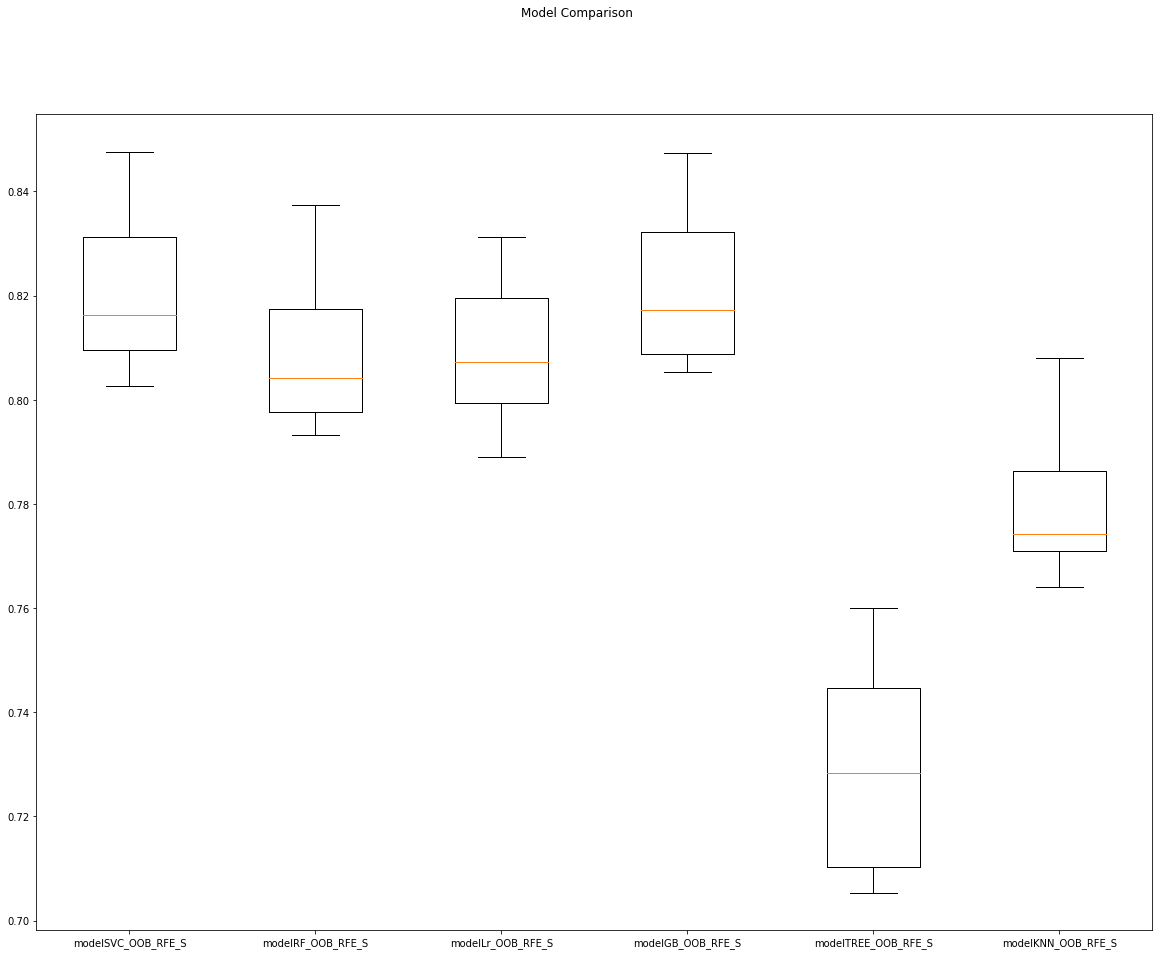

In [647]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_OOB_RFE_S)
ax.set_xticklabels(model_names_OOB_RFE_S)
plt.show()

In [ ]:
# Top model is modelGB_OOB_RFE_S

In [ ]:
####################################################################################
# Model development -- DV RFE
####################################################################################

In [648]:
#Models
modelSVC_DV_RFE = SVC(gamma = 'scale')
modelRF_DV_RFE = RandomForestClassifier(n_estimators = 100)
modelLR_DV_RFE = LinearRegression()
modelLr_DV_RFE = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_DV_RFE = GradientBoostingClassifier()
modelTREE_DV_RFE = tree.DecisionTreeClassifier()
modelKNN_DV_RFE = KNeighborsClassifier(n_neighbors=3)

In [649]:
#SVR
modelSVC_DV_RFE.fit(X_train_DV_RFE,y_train_DV_RFE)
print(cross_val_score(modelSVC_DV_RFE, X_train_DV_RFE, y_train_DV_RFE)) 
modelSVC_DV_RFE.score(X_train_DV_RFE,y_train_DV_RFE)

[0.77690476 0.77690476 0.77666667 0.77666667 0.77666667]


0.7767619047619048

In [650]:
#Random Forest
modelRF_DV_RFE.fit(X_train_DV_RFE,y_train_DV_RFE)
print(cross_val_score(modelRF_DV_RFE, X_train_DV_RFE, y_train_DV_RFE))
modelRF_DV_RFE.score(X_train_DV_RFE,y_train_DV_RFE)

[0.80095238 0.79880952 0.81095238 0.80666667 0.80142857]


0.9842380952380952

In [651]:
#Linear Regression
modelLR_DV_RFE.fit(X_train_DV_RFE,y_train_DV_RFE)
print(cross_val_score(modelLR_DV_RFE, X_train_DV_RFE, y_train_DV_RFE))
modelLR_DV_RFE.score(X_train_DV_RFE,y_train_DV_RFE)

[0.172717   0.17989272 0.20328127 0.21338843 0.18291357]


0.19204396497832799

In [652]:
#Logistic Regression
modelLr_DV_RFE.fit(X_train_DV_RFE,y_train_DV_RFE)
print(cross_val_score(modelLr_DV_RFE, X_train_DV_RFE, y_train_DV_RFE))
modelLr_DV_RFE.score(X_train_DV_RFE,y_train_DV_RFE)

[0.77690476 0.77690476 0.77666667 0.77666667 0.77666667]


0.7767619047619048

In [653]:
#Gradient Boosting
modelGB_DV_RFE.fit(X_train_DV_RFE,y_train_DV_RFE)
print(cross_val_score(modelGB_DV_RFE, X_train_DV_RFE, y_train_DV_RFE))
modelGB_DV_RFE.score(X_train_DV_RFE,y_train_DV_RFE)

[0.81428571 0.81309524 0.82047619 0.82380952 0.81904762]


0.822952380952381

In [654]:
#Decision Tree
modelTREE_DV_RFE.fit(X_train_DV_RFE,y_train_DV_RFE)
print(cross_val_score(modelTREE_DV_RFE, X_train_DV_RFE, y_train_DV_RFE)) 
modelTREE_DV_RFE.score(X_train_DV_RFE,y_train_DV_RFE)

[0.72452381 0.72428571 0.72666667 0.72595238 0.7247619 ]


0.9843809523809524

In [655]:
#KNN
modelKNN_DV_RFE.fit(X_train_DV_RFE,y_train_DV_RFE)
print(cross_val_score(modelKNN_DV_RFE, X_train_DV_RFE, y_train_DV_RFE)) 
modelKNN_DV_RFE.score(X_train_DV_RFE,y_train_DV_RFE)

[0.73619048 0.73142857 0.73404762 0.74333333 0.72785714]


0.8354761904761905

In [555]:
####################################################################################
# Evaluating the Results -- DV RFE
####################################################################################

In [656]:
#SVC
predictions_DV_RFE_SVC = modelSVC_DV_RFE.predict(X_test_DV_RFE)
accy_DV_RFE_SVC = accuracy_score(y_test_DV_RFE,predictions_DV_RFE_SVC)
KAPPA_DV_RFE_SVC = cohen_kappa_score(y_test_DV_RFE, predictions_DV_RFE_SVC)
ROC_DV_RFE_SVC = roc_auc_score(y_test_DV,predictions_DV_RFE_SVC)
prec_DV_RFE_SVC = precision_score(y_test_DV, predictions_DV_RFE_SVC)
rec_DV_RFE_SVC = recall_score(y_test_DV,predictions_DV_RFE_SVC)
f1_DV_RFE_SVC = f1_score(y_test_DV,predictions_DV_RFE_SVC)

model =  pd.DataFrame([['SVC', 'DV_RFE', accy_DV_RFE_SVC, KAPPA_DV_RFE_SVC, ROC_DV_RFE_SVC, prec_DV_RFE_SVC, rec_DV_RFE_SVC, f1_DV_RFE_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
5,GB,OOB_RFE,0.821222,0.376984,0.659463,0.651475,0.374230,0.475383
6,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
7,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
8,SVC,OOB_RFE_S,0.821000,0.367036,0.653005,0.660019,0.356776,0.463179
9,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477


In [657]:
#Random Forest
predictions_DV_RFE_RF = modelRF_DV_RFE.predict(X_test_DV_RFE)
accy_DV_RFE_RF = accuracy_score(y_test_DV_RFE,predictions_DV_RFE_RF)
KAPPA_DV_RFE_RF = cohen_kappa_score(y_test_DV_RFE, predictions_DV_RFE_RF)
ROC_DV_RFE_RF = roc_auc_score(y_test_DV,predictions_DV_RFE_RF)
prec_DV_RFE_RF = precision_score(y_test_DV, predictions_DV_RFE_RF)
rec_DV_RFE_RF = recall_score(y_test_DV,predictions_DV_RFE_RF)
f1_DV_RFE_RF = f1_score(y_test_DV,predictions_DV_RFE_RF)

model =  pd.DataFrame([['RF', 'DV_RFE', accy_DV_RFE_RF, KAPPA_DV_RFE_RF, ROC_DV_RFE_RF, prec_DV_RFE_RF, rec_DV_RFE_RF, f1_DV_RFE_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
...,...,...,...,...,...,...,...,...
55,Tree,OOB,0.725111,0.220008,0.614295,0.378128,0.418891,0.397467
56,Tree,DV_S_FS,0.724889,0.213471,0.610066,0.375236,0.407598,0.390748
57,Tree,OOB_FS,0.723889,0.215558,0.611843,0.375174,0.414271,0.393755
58,Tree,DV_S,0.723889,0.209330,0.607756,0.372568,0.402977,0.387176


In [658]:
#Logistic Regression
predictions_DV_RFE_Lr = modelLr_DV_RFE.predict(X_test_DV_RFE)
accy_DV_RFE_Lr = accuracy_score(y_test_DV_RFE,predictions_DV_RFE_Lr)
KAPPA_DV_RFE_Lr = cohen_kappa_score(y_test_DV_RFE, predictions_DV_RFE_Lr)
ROC_DV_RFE_Lr = roc_auc_score(y_test_DV,predictions_DV_RFE_Lr)
prec_DV_RFE_Lr = precision_score(y_test_DV, predictions_DV_RFE_Lr)
rec_DV_RFE_Lr = recall_score(y_test_DV,predictions_DV_RFE_Lr)
f1_DV_RFE_Lr = f1_score(y_test_DV,predictions_DV_RFE_Lr)

model =  pd.DataFrame([['Lr', 'DV_RFE', accy_DV_RFE_Lr, KAPPA_DV_RFE_Lr, ROC_DV_RFE_Lr, prec_DV_RFE_Lr, rec_DV_RFE_Lr, f1_DV_RFE_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
...,...,...,...,...,...,...,...,...
56,Tree,OOB,0.725111,0.220008,0.614295,0.378128,0.418891,0.397467
57,Tree,DV_S_FS,0.724889,0.213471,0.610066,0.375236,0.407598,0.390748
58,Tree,OOB_FS,0.723889,0.215558,0.611843,0.375174,0.414271,0.393755
59,Tree,DV_S,0.723889,0.209330,0.607756,0.372568,0.402977,0.387176


In [659]:
#Gradient Boosting
predictions_DV_RFE_GB = modelGB_DV_RFE.predict(X_test_DV_RFE)
accy_DV_RFE_GB = accuracy_score(y_test_DV_RFE,predictions_DV_RFE_GB)
KAPPA_DV_RFE_GB = cohen_kappa_score(y_test_DV_RFE, predictions_DV_RFE_GB)
ROC_DV_RFE_GB = roc_auc_score(y_test_DV,predictions_DV_RFE_GB)
prec_DV_RFE_GB = precision_score(y_test_DV, predictions_DV_RFE_GB)
rec_DV_RFE_GB = recall_score(y_test_DV,predictions_DV_RFE_GB)
f1_DV_RFE_GB = f1_score(y_test_DV,predictions_DV_RFE_GB)

model =  pd.DataFrame([['GB', 'DV_RFE', accy_DV_RFE_GB, KAPPA_DV_RFE_GB, ROC_DV_RFE_GB, prec_DV_RFE_GB, rec_DV_RFE_GB, f1_DV_RFE_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
...,...,...,...,...,...,...,...,...
57,Tree,OOB,0.725111,0.220008,0.614295,0.378128,0.418891,0.397467
58,Tree,DV_S_FS,0.724889,0.213471,0.610066,0.375236,0.407598,0.390748
59,Tree,OOB_FS,0.723889,0.215558,0.611843,0.375174,0.414271,0.393755
60,Tree,DV_S,0.723889,0.209330,0.607756,0.372568,0.402977,0.387176


In [660]:
#Decision Tree
predictions_DV_RFE_tree = modelTREE_DV_RFE.predict(X_test_DV_RFE)
accy_DV_RFE_tree = accuracy_score(y_test_DV_RFE,predictions_DV_RFE_tree)
KAPPA_DV_RFE_tree = cohen_kappa_score(y_test_DV_RFE, predictions_DV_RFE_tree)
ROC_DV_RFE_tree = roc_auc_score(y_test_DV,predictions_DV_RFE_tree)
prec_DV_RFE_tree = precision_score(y_test_DV, predictions_DV_RFE_tree)
rec_DV_RFE_tree = recall_score(y_test_DV,predictions_DV_RFE_tree)
f1_DV_RFE_tree = f1_score(y_test_DV,predictions_DV_RFE_tree)

model =  pd.DataFrame([['Tree', 'DV_RFE', accy_DV_RFE_tree, KAPPA_DV_RFE_tree, ROC_DV_RFE_tree, prec_DV_RFE_tree, rec_DV_RFE_tree, f1_DV_RFE_tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
...,...,...,...,...,...,...,...,...
58,Tree,OOB,0.725111,0.220008,0.614295,0.378128,0.418891,0.397467
59,Tree,DV_S_FS,0.724889,0.213471,0.610066,0.375236,0.407598,0.390748
60,Tree,OOB_FS,0.723889,0.215558,0.611843,0.375174,0.414271,0.393755
61,Tree,DV_S,0.723889,0.209330,0.607756,0.372568,0.402977,0.387176


In [661]:
#KNN
predictions_DV_RFE_KNN = modelKNN_DV_RFE.predict(X_test_DV_RFE)
accy_DV_RFE_KNN = accuracy_score(y_test_DV_RFE,predictions_DV_RFE_KNN)
KAPPA_DV_RFE_KNN = cohen_kappa_score(y_test_DV_RFE, predictions_DV_RFE_KNN)
ROC_DV_RFE_KNN = roc_auc_score(y_test_DV,predictions_DV_RFE_KNN)
prec_DV_RFE_KNN = precision_score(y_test_DV, predictions_DV_RFE_KNN)
rec_DV_RFE_KNN = recall_score(y_test_DV,predictions_DV_RFE_KNN)
f1_DV_RFE_KNN = f1_score(y_test_DV,predictions_DV_RFE_KNN)

model =  pd.DataFrame([['KNN', 'DV_RFE', accy_DV_RFE_KNN, KAPPA_DV_RFE_KNN, ROC_DV_RFE_KNN, prec_DV_RFE_KNN, rec_DV_RFE_KNN, f1_DV_RFE_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
...,...,...,...,...,...,...,...,...
59,Tree,OOB,0.725111,0.220008,0.614295,0.378128,0.418891,0.397467
60,Tree,DV_S_FS,0.724889,0.213471,0.610066,0.375236,0.407598,0.390748
61,Tree,OOB_FS,0.723889,0.215558,0.611843,0.375174,0.414271,0.393755
62,Tree,DV_S,0.723889,0.209330,0.607756,0.372568,0.402977,0.387176


In [662]:
outcome_DV_RFE = []
model_names_DV_RFE = []
models_DV_RFE = [('modelSVC_DV_RFE', SVC(gamma = 'scale')),
              ('modelRF_DV_RFE', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_DV_RFE', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_DV_RFE', GradientBoostingClassifier()),
              ('modelTREE_DV_RFE', tree.DecisionTreeClassifier()),
              ('modelKNN_DV_RFE', KNeighborsClassifier(n_neighbors=3))]

In [663]:
for model_name_DV_RFE, model_DV_RFE in models_DV_RFE:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_DV_RFE = model_selection.cross_val_score(model_DV_RFE, features_DV_RFE, depVar_DV_RFE, cv=k_fold_validation, scoring='accuracy')
    outcome_DV_RFE.append(results_DV_RFE)
    model_names_DV_RFE.append(model_name_DV_RFE)
    output_message_DV_RFE = "%s| Mean=%f STD=%f" % (model_name_DV_RFE, results_DV_RFE.mean(), results_DV_RFE.std())
    print(output_message_DV_RFE)

modelSVC_DV_RFE| Mean=0.778800 STD=0.017234
modelRF_DV_RFE| Mean=0.803467 STD=0.016426
modelLr_DV_RFE| Mean=0.781100 STD=0.021955
modelGB_DV_RFE| Mean=0.819767 STD=0.014434
modelTREE_DV_RFE| Mean=0.731767 STD=0.016623
modelKNN_DV_RFE| Mean=0.733267 STD=0.015619


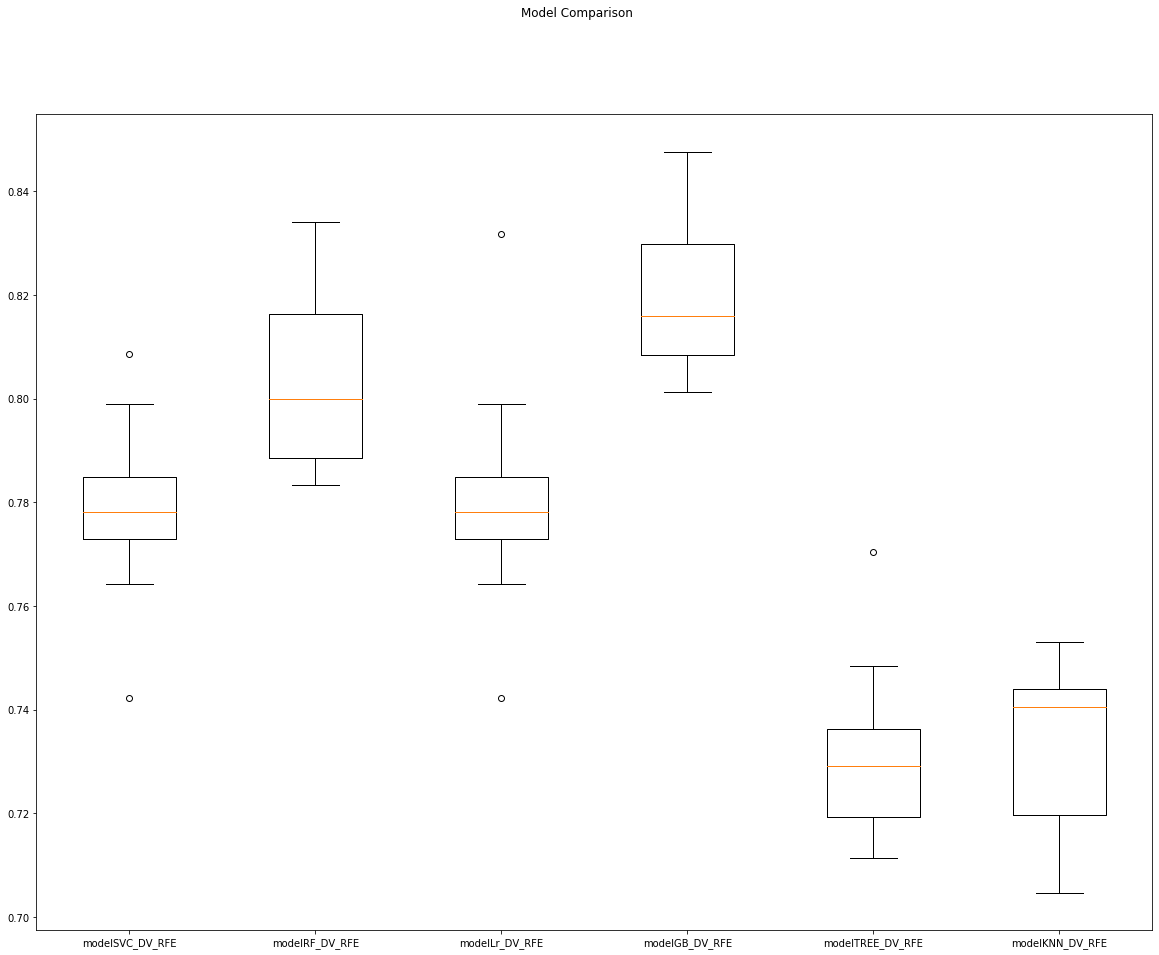

In [664]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_DV_RFE)
ax.set_xticklabels(model_names_DV_RFE)
plt.show()

In [ ]:
# Top Model overall is modelGB_DV_RFE

In [ ]:
####################################################################################
# Model development -- DV RFE Scaled
####################################################################################

In [665]:
#Models
modelSVC_DV_RFE_S = SVC(gamma = 'scale')
modelRF_DV_RFE_S = RandomForestClassifier(n_estimators = 100)
modelLR_DV_RFE_S = LinearRegression()
modelLr_DV_RFE_S = LogisticRegression(solver='lbfgs', max_iter = 4000)
modelGB_DV_RFE_S = GradientBoostingClassifier()
modelTREE_DV_RFE_S = tree.DecisionTreeClassifier()
modelKNN_DV_RFE_S = KNeighborsClassifier(n_neighbors=3)

In [666]:
#SVR
modelSVC_DV_RFE_S.fit(X_train_DV_RFE_S,y_train_DV_RFE_S)
print(cross_val_score(modelSVC_DV_RFE_S, X_train_DV_RFE_S, y_train_DV_RFE_S)) 
modelSVC_DV_RFE_S.score(X_train_DV_RFE_S,y_train_DV_RFE_S)

[0.81166667 0.8147619  0.82047619 0.82428571 0.81547619]


0.8187619047619048

In [667]:
#Random Forest
modelRF_DV_RFE_S.fit(X_train_DV_RFE_S,y_train_DV_RFE_S)
print(cross_val_score(modelRF_DV_RFE_S, X_train_DV_RFE_S, y_train_DV_RFE_S))
modelRF_DV_RFE_S.score(X_train_DV_RFE_S,y_train_DV_RFE_S)

[0.79761905 0.79666667 0.80571429 0.80452381 0.8002381 ]


0.9842857142857143

In [668]:
#Linear Regression
modelLR_DV_RFE_S.fit(X_train_DV_RFE_S,y_train_DV_RFE_S)
print(cross_val_score(modelLR_DV_RFE_S, X_train_DV_RFE_S, y_train_DV_RFE_S))
modelLR_DV_RFE_S.score(X_train_DV_RFE_S,y_train_DV_RFE_S)

[0.172717   0.17989272 0.20328127 0.21338843 0.18291357]


0.19204396497832799

In [669]:
#Logistic Regression
modelLr_DV_RFE_S.fit(X_train_DV_RFE_S,y_train_DV_RFE_S)
print(cross_val_score(modelLr_DV_RFE_S, X_train_DV_RFE_S, y_train_DV_RFE_S))
modelLr_DV_RFE_S.score(X_train_DV_RFE_S,y_train_DV_RFE_S)

[0.8147619  0.81428571 0.82047619 0.82119048 0.81380952]


0.8167619047619048

In [670]:
#Gradient Boosting
modelGB_DV_RFE_S.fit(X_train_DV_RFE_S,y_train_DV_RFE_S)
print(cross_val_score(modelGB_DV_RFE_S, X_train_DV_RFE_S, y_train_DV_RFE_S))
modelGB_DV_RFE_S.score(X_train_DV_RFE_S,y_train_DV_RFE_S)

[0.81452381 0.81309524 0.82047619 0.82380952 0.81928571]


0.822952380952381

In [671]:
#Decision Tree
modelTREE_DV_RFE_S.fit(X_train_DV_RFE_S,y_train_DV_RFE_S)
print(cross_val_score(modelTREE_DV_RFE_S, X_train_DV_RFE_S, y_train_DV_RFE_S)) 
modelTREE_DV_RFE_S.score(X_train_DV_RFE_S,y_train_DV_RFE_S)

[0.72452381 0.72190476 0.72595238 0.73190476 0.72404762]


0.9843809523809524

In [672]:
#KNN
modelKNN_DV_RFE_S.fit(X_train_DV_RFE_S,y_train_DV_RFE_S)
print(cross_val_score(modelKNN_DV_RFE_S, X_train_DV_RFE_S, y_train_DV_RFE_S)) 
modelKNN_DV_RFE_S.score(X_train_DV_RFE_S,y_train_DV_RFE_S)

[0.7797619  0.78119048 0.78309524 0.77785714 0.77142857]


0.8615714285714285

In [673]:
####################################################################################
# Evaluating the Results -- DV RFE Scaled
####################################################################################

In [674]:
#SVC
predictions_DV_RFE_S_SVC = modelSVC_DV_RFE_S.predict(X_test_DV_RFE_S)
accy_DV_RFE_S_SVC = accuracy_score(y_test_DV_RFE_S,predictions_DV_RFE_S_SVC)
KAPPA_DV_RFE_S_SVC = cohen_kappa_score(y_test_DV_RFE_S, predictions_DV_RFE_S_SVC)
ROC_DV_RFE_S_SVC = roc_auc_score(y_test_DV,predictions_DV_RFE_S_SVC)
prec_DV_RFE_S_SVC = precision_score(y_test_DV, predictions_DV_RFE_S_SVC)
rec_DV_RFE_S_SVC = recall_score(y_test_DV,predictions_DV_RFE_S_SVC)
f1_DV_RFE_S_SVC = f1_score(y_test_DV,predictions_DV_RFE_S_SVC)

model =  pd.DataFrame([['SVC', 'DV_RFE_S', accy_DV_RFE_S_SVC, KAPPA_DV_RFE_S_SVC, ROC_DV_RFE_S_SVC, prec_DV_RFE_S_SVC, rec_DV_RFE_S_SVC, f1_DV_RFE_S_SVC]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
...,...,...,...,...,...,...,...,...
60,Tree,OOB,0.725111,0.220008,0.614295,0.378128,0.418891,0.397467
61,Tree,DV_S_FS,0.724889,0.213471,0.610066,0.375236,0.407598,0.390748
62,Tree,OOB_FS,0.723889,0.215558,0.611843,0.375174,0.414271,0.393755
63,Tree,DV_S,0.723889,0.209330,0.607756,0.372568,0.402977,0.387176


In [675]:
#Random Forest
predictions_DV_RFE_S_RF = modelRF_DV_RFE_S.predict(X_test_DV_RFE_S)
accy_DV_RFE_S_RF = accuracy_score(y_test_DV_RFE_S,predictions_DV_RFE_S_RF)
KAPPA_DV_RFE_S_RF = cohen_kappa_score(y_test_DV_RFE_S, predictions_DV_RFE_S_RF)
ROC_DV_RFE_S_RF = roc_auc_score(y_test_DV,predictions_DV_RFE_S_RF)
prec_DV_RFE_S_RF = precision_score(y_test_DV, predictions_DV_RFE_S_RF)
rec_DV_RFE_S_RF = recall_score(y_test_DV,predictions_DV_RFE_S_RF)
f1_DV_RFE_S_RF = f1_score(y_test_DV,predictions_DV_RFE_S_RF)

model =  pd.DataFrame([['RF', 'DV_RFE_S', accy_DV_RFE_S_RF, KAPPA_DV_RFE_S_RF, ROC_DV_RFE_S_RF, prec_DV_RFE_S_RF, rec_DV_RFE_S_RF, f1_DV_RFE_S_RF]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
...,...,...,...,...,...,...,...,...
61,Tree,OOB,0.725111,0.220008,0.614295,0.378128,0.418891,0.397467
62,Tree,DV_S_FS,0.724889,0.213471,0.610066,0.375236,0.407598,0.390748
63,Tree,OOB_FS,0.723889,0.215558,0.611843,0.375174,0.414271,0.393755
64,Tree,DV_S,0.723889,0.209330,0.607756,0.372568,0.402977,0.387176


In [676]:
#Logistic Regression
predictions_DV_RFE_S_Lr = modelLr_DV_RFE_S.predict(X_test_DV_RFE_S)
accy_DV_RFE_S_Lr = accuracy_score(y_test_DV_RFE_S,predictions_DV_RFE_S_Lr)
KAPPA_DV_RFE_S_Lr = cohen_kappa_score(y_test_DV_RFE_S, predictions_DV_RFE_S_Lr)
ROC_DV_RFE_S_Lr = roc_auc_score(y_test_DV,predictions_DV_RFE_S_Lr)
prec_DV_RFE_S_Lr = precision_score(y_test_DV, predictions_DV_RFE_S_Lr)
rec_DV_RFE_S_Lr = recall_score(y_test_DV,predictions_DV_RFE_S_Lr)
f1_DV_RFE_S_Lr = f1_score(y_test_DV,predictions_DV_RFE_S_Lr)

model =  pd.DataFrame([['Lr', 'DV_RFE_S', accy_DV_RFE_S_Lr, KAPPA_DV_RFE_S_Lr, ROC_DV_RFE_S_Lr, prec_DV_RFE_S_Lr, rec_DV_RFE_S_Lr, f1_DV_RFE_S_Lr]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
...,...,...,...,...,...,...,...,...
62,Tree,OOB,0.725111,0.220008,0.614295,0.378128,0.418891,0.397467
63,Tree,DV_S_FS,0.724889,0.213471,0.610066,0.375236,0.407598,0.390748
64,Tree,OOB_FS,0.723889,0.215558,0.611843,0.375174,0.414271,0.393755
65,Tree,DV_S,0.723889,0.209330,0.607756,0.372568,0.402977,0.387176


In [677]:
#Gradient Boosting
predictions_DV_RFE_S_GB = modelGB_DV_RFE_S.predict(X_test_DV_RFE_S)
accy_DV_RFE_S_GB = accuracy_score(y_test_DV_RFE_S,predictions_DV_RFE_S_GB)
KAPPA_DV_RFE_S_GB = cohen_kappa_score(y_test_DV_RFE_S, predictions_DV_RFE_S_GB)
ROC_DV_RFE_S_GB = roc_auc_score(y_test_DV,predictions_DV_RFE_S_GB)
prec_DV_RFE_S_GB = precision_score(y_test_DV, predictions_DV_RFE_S_GB)
rec_DV_RFE_S_GB = recall_score(y_test_DV,predictions_DV_RFE_S_GB)
f1_DV_RFE_S_GB = f1_score(y_test_DV,predictions_DV_RFE_S_GB)

model =  pd.DataFrame([['GB', 'DV_RFE_S', accy_DV_RFE_S_GB, KAPPA_DV_RFE_S_GB, ROC_DV_RFE_S_GB, prec_DV_RFE_S_GB, rec_DV_RFE_S_GB, f1_DV_RFE_S_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
...,...,...,...,...,...,...,...,...
63,Tree,OOB,0.725111,0.220008,0.614295,0.378128,0.418891,0.397467
64,Tree,DV_S_FS,0.724889,0.213471,0.610066,0.375236,0.407598,0.390748
65,Tree,OOB_FS,0.723889,0.215558,0.611843,0.375174,0.414271,0.393755
66,Tree,DV_S,0.723889,0.209330,0.607756,0.372568,0.402977,0.387176


In [678]:
#Decision Tree
predictions_DV_RFE_S_tree = modelTREE_DV_RFE_S.predict(X_test_DV_RFE_S)
accy_DV_RFE_S_tree = accuracy_score(y_test_DV_RFE_S,predictions_DV_RFE_S_tree)
KAPPA_DV_RFE_S_tree = cohen_kappa_score(y_test_DV_RFE_S, predictions_DV_RFE_S_tree)
ROC_DV_RFE_S_tree = roc_auc_score(y_test_DV,predictions_DV_RFE_S_tree)
prec_DV_RFE_S_tree = precision_score(y_test_DV, predictions_DV_RFE_S_tree)
rec_DV_RFE_S_tree = recall_score(y_test_DV,predictions_DV_RFE_S_tree)
f1_DV_RFE_S_tree = f1_score(y_test_DV,predictions_DV_RFE_S_tree)

model =  pd.DataFrame([['Tree', 'DV_RFE_S', accy_DV_RFE_S_tree, KAPPA_DV_RFE_S_tree, ROC_DV_RFE_S_tree, prec_DV_RFE_S_tree, rec_DV_RFE_S_tree, f1_DV_RFE_S_tree]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
...,...,...,...,...,...,...,...,...
64,Tree,OOB,0.725111,0.220008,0.614295,0.378128,0.418891,0.397467
65,Tree,DV_S_FS,0.724889,0.213471,0.610066,0.375236,0.407598,0.390748
66,Tree,OOB_FS,0.723889,0.215558,0.611843,0.375174,0.414271,0.393755
67,Tree,DV_S,0.723889,0.209330,0.607756,0.372568,0.402977,0.387176


In [679]:
#KNN
predictions_DV_RFE_S_KNN = modelKNN_DV_RFE_S.predict(X_test_DV_RFE_S)
accy_DV_RFE_S_KNN = accuracy_score(y_test_DV_RFE_S,predictions_DV_RFE_S_KNN)
KAPPA_DV_RFE_S_KNN = cohen_kappa_score(y_test_DV_RFE_S, predictions_DV_RFE_S_KNN)
ROC_DV_RFE_S_KNN = roc_auc_score(y_test_DV,predictions_DV_RFE_S_KNN)
prec_DV_RFE_S_KNN = precision_score(y_test_DV, predictions_DV_RFE_S_KNN)
rec_DV_RFE_S_KNN = recall_score(y_test_DV,predictions_DV_RFE_S_KNN)
f1_DV_RFE_S_KNN = f1_score(y_test_DV,predictions_DV_RFE_S_KNN)

model =  pd.DataFrame([['KNN', 'DV_RFE_S', accy_DV_RFE_S_KNN, KAPPA_DV_RFE_S_KNN, ROC_DV_RFE_S_KNN, prec_DV_RFE_S_KNN, rec_DV_RFE_S_KNN, f1_DV_RFE_S_KNN]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy', 'KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
...,...,...,...,...,...,...,...,...
65,Tree,OOB,0.725111,0.220008,0.614295,0.378128,0.418891,0.397467
66,Tree,DV_S_FS,0.724889,0.213471,0.610066,0.375236,0.407598,0.390748
67,Tree,OOB_FS,0.723889,0.215558,0.611843,0.375174,0.414271,0.393755
68,Tree,DV_S,0.723889,0.209330,0.607756,0.372568,0.402977,0.387176


In [680]:
outcome_DV_RFE_S = []
model_names_DV_RFE_S = []
models_DV_RFE_S = [('modelSVC_DV_RFE_S', SVC(gamma = 'scale')),
              ('modelRF_DV_RFE_S', RandomForestClassifier(n_estimators = 100)),
              ('modelLr_DV_RFE_S', LogisticRegression(solver='lbfgs', max_iter = 4000)),
              ('modelGB_DV_RFE_S', GradientBoostingClassifier()),
              ('modelTREE_DV_RFE_S', tree.DecisionTreeClassifier()),
              ('modelKNN_DV_RFE_S', KNeighborsClassifier(n_neighbors=3))]

In [681]:
for model_name_DV_RFE_S, model_DV_RFE_S in models_DV_RFE_S:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results_DV_RFE_S = model_selection.cross_val_score(model_DV_RFE_S, features_DV_RFE_S, depVar_DV_RFE_S, cv=k_fold_validation, scoring='accuracy')
    outcome_DV_RFE_S.append(results_DV_RFE_S)
    model_names_DV_RFE_S.append(model_name_DV_RFE_S)
    output_message_DV_RFE_S = "%s| Mean=%f STD=%f" % (model_name_DV_RFE_S, results_DV_RFE_S.mean(), results_DV_RFE_S.std())
    print(output_message_DV_RFE_S)

modelSVC_DV_RFE_S| Mean=0.817967 STD=0.013949
modelRF_DV_RFE_S| Mean=0.802767 STD=0.016889
modelLr_DV_RFE_S| Mean=0.816933 STD=0.014681
modelGB_DV_RFE_S| Mean=0.819800 STD=0.014428
modelTREE_DV_RFE_S| Mean=0.732033 STD=0.015410
modelKNN_DV_RFE_S| Mean=0.779400 STD=0.014850


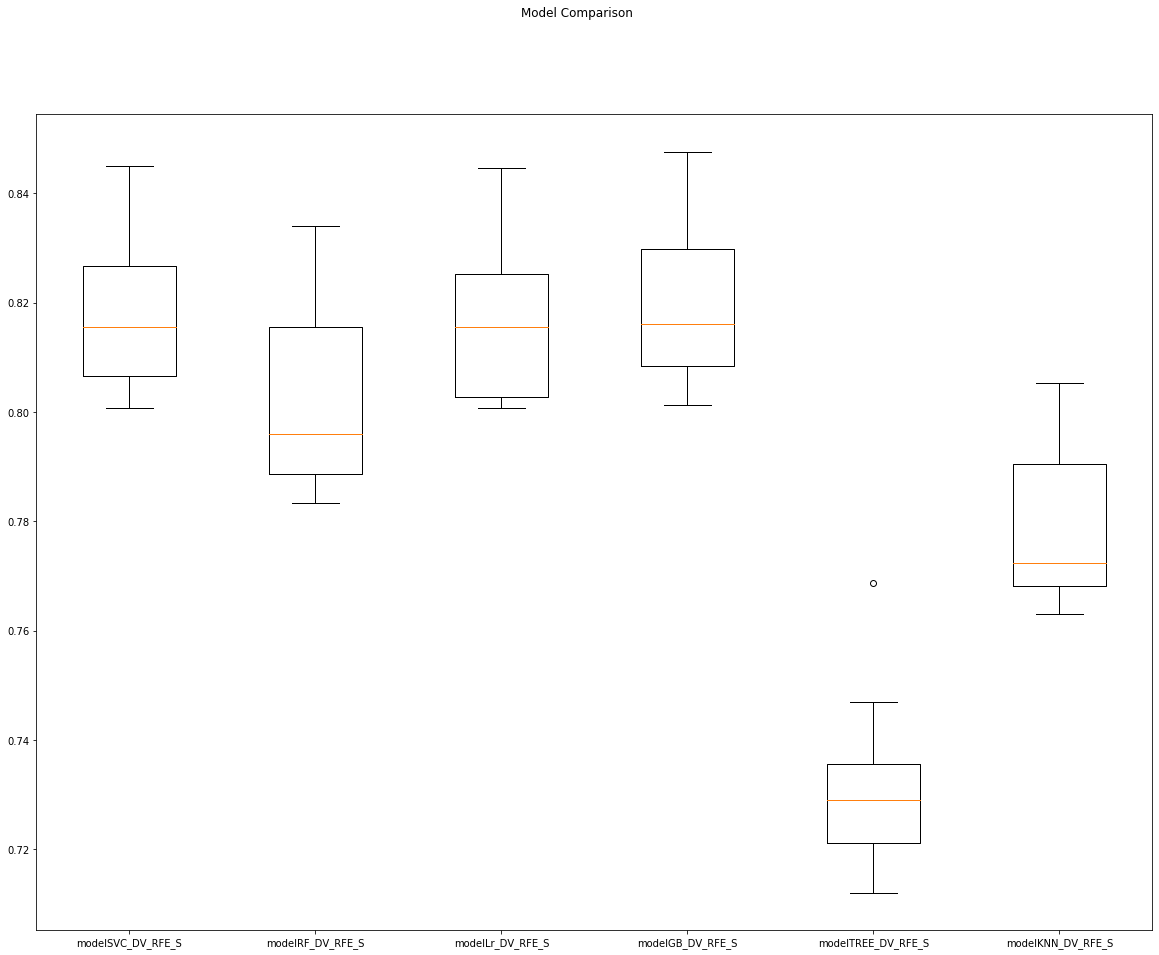

In [682]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome_DV_RFE_S)
ax.set_xticklabels(model_names_DV_RFE_S)
plt.show()

In [ ]:
# Top model is modelGB_DV_RFE_S

In [ ]:
######################################
# Top Model overall is GB_OOB_FS_S
######################################

In [683]:
#Variable Importance
modelGB_OOB_FS_S.feature_importances_

array([0.02061453, 0.00289689, 0.00522836, 0.00374977, 0.00784409,
       0.62530009, 0.07525862, 0.04426897, 0.01919029, 0.01724251,
       0.0257564 , 0.03121521, 0.01473018, 0.0084898 , 0.02315608,
       0.02076862, 0.02104733, 0.01702519, 0.00931781, 0.00689928])

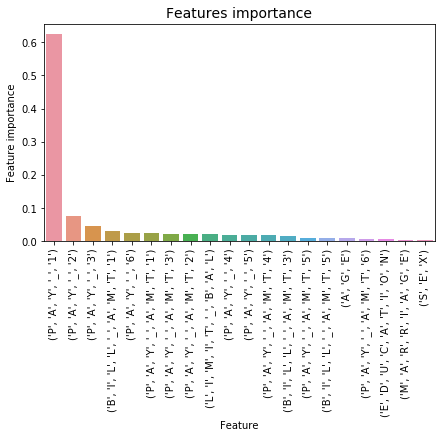

In [684]:
tmp = pd.DataFrame({'Feature': features_OOB_FS_S, 'Feature importance': modelGB_OOB_FS_S.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [685]:
#Confusion Matrix
confusion_matrix(y_test_OOB_FS_S, predictions_OOB_FS_S_GB)

array([[6666,  386],
       [1212,  736]])

In [694]:
######################################
# Try to Improve GradientBoosting Algorithm
######################################

In [699]:
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,
                                                               min_samples_leaf=50,max_depth=8,max_features='sqrt',
                                                               subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train_OOB_FS_S, y_train_OOB_FS_S)

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=8,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
    

In [701]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 50}, 0.7835508118460458)

In [702]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, 
                                                               max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train_OOB_FS_S, y_train_OOB_FS_S)

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=50,
                                                  n_iter_no_change=None,
        

In [704]:
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([1.01791048, 0.99673271, 0.92158384, 0.82696929, 0.78655477,
         1.14471087, 1.13746262, 1.06989827, 0.98375492, 0.97937427,
         1.39583111, 1.44708109, 1.25533762, 1.21760764, 1.16898999,
         1.60262003, 1.47554479, 1.39517937, 1.32983909, 1.46915708,
         1.98235655, 1.72172408, 1.92208123, 1.53311977, 1.42303867,
         1.96181278, 1.73640027, 1.6741065 , 1.83789177, 1.67608852]),
  'std_fit_time': array([0.02979182, 0.07775901, 0.04584707, 0.05728093, 0.02680081,
         0.03383156, 0.09663586, 0.07010426, 0.00602676, 0.01878526,
         0.11253719, 0.12449589, 0.05871482, 0.03694559, 0.01981018,
         0.02726399, 0.02458641, 0.0176609 , 0.06361364, 0.17102727,
         0.197272  , 0.07296313, 0.11868952, 0.09445072, 0.05455295,
         0.0625419 , 0.02000606, 0.04880339, 0.13926076, 0.13863423]),
  'mean_score_time': array([0.01555324, 0.01041622, 0.00882611, 0.00806842, 0.00844307,
         0.01061792, 0.01053185, 0.00992661, 0.

In [705]:
gsearch2.best_params_

{'max_depth': 9, 'min_samples_split': 1000}

In [707]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50,
                                                               max_depth=9,max_features='sqrt', subsample=0.8, 
                                                               random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train_OOB_FS_S, y_train_OOB_FS_S)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([1.0341701 , 1.0789238 , 1.09903622, 0.95132456, 0.92964063,
         0.89637647, 1.04466209, 1.1055573 , 0.95348668, 0.94471922,
         0.92058492, 0.89655852, 1.01669087, 0.99651618, 0.97442689,
         0.9289506 , 0.9180696 , 0.9082974 , 1.01647072, 0.98401136,
         0.95850844, 1.03194523, 1.14532561, 1.06867123, 1.31253252,
         1.06398153, 0.96055355, 0.98422527, 0.95188932, 0.89618664]),
  'std_fit_time': array([0.0068501 , 0.08737882, 0.06795186, 0.01040515, 0.00990629,
         0.01044734, 0.01957922, 0.05960833, 0.02155647, 0.02277668,
         0.01028032, 0.01310879, 0.01345854, 0.01553724, 0.01846409,
         0.00960392, 0.00828114, 0.01621128, 0.00754777, 0.01417546,
         0.01983369, 0.01476878, 0.07427728, 0.04895065, 0.09442869,
         0.04556694, 0.04174856, 0.03515684, 0.02409737, 0.05555946]),
  'mean_score_time': array([0.01155615, 0.0110188 , 0.01078358, 0.00960846, 0.00969086,
         0.00959525, 0.01139436, 0.01173248, 0.

In [717]:
modelfit(gsearch3.best_estimator_, y_train_OOB_FS_S, X_train_OOB_FS_S)

AttributeError: 'DataFrame' object has no attribute 'fit'

In [796]:

modelGB_OOB_FS_S_tuned = GradientBoostingClassifier(learning_rate=0.25, n_estimators=50, min_samples_leaf = 50, 
                                                               max_depth=9,max_features='sqrt', subsample=0.8, 
                                                               random_state=10, min_samples_split=500)

In [797]:
#Gradient Boosting
modelGB_OOB_FS_S_tuned.fit(X_train_OOB_FS_S,y_train_OOB_FS_S)
print(cross_val_score(modelGB_OOB_FS_S_tuned, X_train_OOB_FS_S, y_train_OOB_FS_S))
modelGB_OOB_FS_S_tuned.score(X_train_OOB_FS_S,y_train_OOB_FS_S)

[0.81       0.81642857 0.82142857 0.81880952 0.81595238]


0.8412380952380952

In [798]:
#Gradient Boosting
predictions_OOB_FS_St_GB = modelGB_OOB_FS_S_tuned.predict(X_test_OOB_FS_S)
accy_OOB_FS_St_GB = accuracy_score(y_test_OOB_FS_S,predictions_OOB_FS_St_GB)
KAPPA_OOB_FS_St_GB = cohen_kappa_score(y_test_OOB_FS_S, predictions_OOB_FS_St_GB)
ROC_OOB_FS_St_GB = roc_auc_score(y_test_OOB_FS_S,predictions_OOB_FS_St_GB)
prec_OOB_FS_St_GB = precision_score(y_test_OOB_FS_S, predictions_OOB_FS_St_GB)
rec_OOB_FS_St_GB = recall_score(y_test_OOB_FS_S,predictions_OOB_FS_St_GB)
f1_OOB_FS_St_GB = f1_score(y_test_OOB_FS_S,predictions_OOB_FS_St_GB)

model =  pd.DataFrame([['GB_Tuned', 'OOB_FS_S', accy_OOB_FS_St_GB, KAPPA_OOB_FS_St_GB, ROC_OOB_FS_St_GB, 
                        prec_OOB_FS_St_GB, rec_OOB_FS_St_GB, f1_OOB_FS_St_GB]],
               columns = ['Model', 'Type', 'Accuracy', 'KAPPA', 'ROC', 'Precision', 'Recall', 'F1 Score'])
model_results = model_results.append(model, ignore_index = True).sort_values(by = ['Accuracy','KAPPA', 'ROC'], ascending = False)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
5,GB,OOB_RFE,0.821222,0.376984,0.659463,0.651475,0.374230,0.475383
6,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
7,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
8,SVC,OOB_RFE_S,0.821000,0.367036,0.653005,0.660019,0.356776,0.463179
9,SVC,DV_S_FS,0.821000,0.355548,0.645574,0.673176,0.336242,0.448477


In [790]:
accy_OOB_FS_St_GB

0.817

In [759]:
KAPPA_OOB_FS_St_GB

0.3815717276755406

In [762]:
pd.set_option('display.max_rows', None)
model_results

,Model,Type,Accuracy,KAPPA,ROC,Precision,Recall,F1 Score
0,GB,OOB_FS_S,0.822444,0.381650,0.661544,0.655971,0.377823,0.479479
1,GB,OOB_FS,0.822333,0.381399,0.661473,0.655387,0.377823,0.479323
2,GB,OOB_S,0.822000,0.380646,0.661260,0.653641,0.377823,0.478855
3,GB,OOB,0.821667,0.379622,0.660861,0.652174,0.377310,0.478049
4,GB,OOB_RFE_S,0.821333,0.377234,0.659534,0.652057,0.374230,0.475538
5,GB,OOB_RFE,0.821222,0.376984,0.659463,0.651475,0.374230,0.475383
6,GB,DV_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
7,GB,DV_S_FS,0.821222,0.374511,0.657791,0.653951,0.369610,0.472286
8,RF,DV,0.817667,0.370400,0.658123,0.632214,0.376797,0.472178
9,RF,OOB_FS_S,0.816444,0.370154,0.659015,0.624370,0.381417,0.473550
